## DSA4262 Individual Assignment 2 (Data Visualization + Predictive Modelling)

### **Importing Relevant Modules**
1. **Pandas** - For data cleaning and transformation
2. **Numpy** - For data manipulation
3. **Matplotlib** - For data visualization
4. **scikit-learn** - For Machine Learning
5. **Seaborn** - For data visualization
6. TBC

In [513]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **Importing The Given Datasets**

There are two datasets that will used in this Predictive Modelling project. These include:

1. **dreaddit-train.csv**
2. **dreaddit-test.csv**

**NOTE:** These two files are in csv format and we will import the csv files directly (without chnaging to other possible formats such as excel(.xlsx)). We can directly import these two csv files using pandas `pd.read_csv` method.

#### **Importing Dataset 1 - Dreaddit Train (CSV File)**

In [516]:
dreaddit_train = pd.read_csv('dreaddit-train.csv')
dreaddit_train.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


#### **Importing Dataset 2 - Dreaddit Test (CSV File)**

In [518]:
dreaddit_test = pd.read_csv('dreaddit-test.csv')
dreaddit_test.head()

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,896,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.8,1514980773,22,-1.238793,...,1.0000,1.2000,1.0,1.65864,1.32245,1.80264,0.63,62,-0.148707,0.000000
1,19059,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.0,1493348050,5,7.684583,...,1.4000,1.1250,1.0,1.69133,1.69180,1.97249,1.00,2,7.398222,-0.065909
2,7977,ptsd,8eeu1t,"(5, 10)",We'd be saving so much money with this new hou...,1,1.0,1524516630,10,2.360408,...,1.1429,1.0000,1.0,1.70974,1.52985,1.86108,1.00,8,3.149288,-0.036818
3,1214,ptsd,8d28vu,"[2, 7]","My ex used to shoot back with ""Do you want me ...",1,0.5,1524018289,5,5.997000,...,1.0000,1.3000,1.0,1.72615,1.52000,1.84909,1.00,7,6.606000,-0.066667
4,1965,relationships,7r1e85,"[23, 28]",I haven’t said anything to him yet because I’m...,0,0.8,1516200171,138,4.649418,...,1.1250,1.1429,1.0,1.75642,1.43582,1.91725,0.84,70,4.801869,0.141667


------------------------------------------------------------------------------------------------------------------------------------

### **Data Cleaning**

We will need to perform data cleaning from the raw data above (for both the training and test sets). The data cleaning methods will include (not exhaustive).

1) Removing unnecessary and irrelevant columns
2) Renaming columns to a more readable format
3) Standardizing the sentence range values (like removing inconsistencies [] vs (), number range)

#### **Data Cleaning Process (Train + Test Sets)**

Data Cleaning Step Required For Dataset 1:

*   Removing unnecessary columns
*   Renaming useful columns to more readable formats
*   Standardizing sentence range to fixed intervals

##### **Step 1: Removing Unnecessary Columns**

Before proceeding with the visualizations, it is important to note that the Dreaddit training and test datasets contain a large number of features (116 columns). Many of these variables are not directly relevant to our analysis. Including an excessive number of features in subsequent predictive modelling may increase model complexity, raise the risk of overfitting, and ultimately lead to poorer generalisation performance on the test set. Therefore, we perform a feature selection step to retain only the columns that are most relevant for exploratory analysis and model development.

However, a question that we should ask is which columns are considered important and which columns should we remove in order to reduce the number of columns as much as possible but still retain most of the important data for consideration? This is when we should explore each column one-by-one and determine whether the column is important.

**Important Columns Include:**

**Category 1: Core Metadata And Annotation Columns**

<table border="1" cellpadding="8" cellspacing="0" style="border-collapse: collapse; width: 100%; text-align: left;">
  <thead style="background-color: #f2f2f2;">
    <tr>
      <th>Column Name In Dataset</th>
      <th>Revised Name</th>
      <th>Why Important?</th>
    </tr>
  </thead>
  <tbody>
      <tr>
        <td>subreddit</td>
        <td>Subcategory</td>
        <td>Identifies the community context in which a post is written, enabling analysis of how stress expression varies across different social environments. It is essential for subgroup performance analysis and domain-specific interpretation</td>
      </tr>
      <tr>
        <td>sentence_range</td>
        <td>Sentence Range</td>
        <td>Provides a coarse measure of post length and verbosity, which can reflect cognitive load or narrative stress. It is useful for analysing how stress correlates with the amount of text produced</td>
      </tr>
      <tr>
        <td>text</td>
        <td>Text</td>
        <td>Contains the raw linguistic content of each post, which is necessary for qualitative inspection, error analysis, and feature extraction. It enables direct interpretation of model predictions and failure cases</td>
      </tr>
      <tr>
        <td>label</td>
        <td>Label</td>
        <td>Represents the ground-truth stress annotation and serves as the target variable for supervised learning. It is required for both model training and performance evaluation</td>
      </tr>
      <tr>
        <td>confidence</td>
        <td>Confidence Level</td>
        <td>Indicates the annotators confidence in the assigned label, reflecting annotation reliability. This feature is useful for analysing ambiguous cases and understanding disagreement in stress perception</td>
      </tr>
  </tbody>
</table>

**Category 2: Sentiment And Social Context Features**

<table border="1" cellpadding="8" cellspacing="0" style="border-collapse: collapse; width: 100%; text-align: left;">
  <thead style="background-color: #f2f2f2;">
    <tr>
      <th>Column Name In Dataset</th>
      <th>Revised Name</th>
      <th>Why Important?</th>
    </tr>
  </thead>
  <tbody>
      <tr>
        <td>sentiment</td>
        <td>Sentiment</td>
        <td>Captures the overall emotional polarity of a post, providing a high-level affective signal. It allows comparison between emotional tone and stress labels, highlighting cases where stress is expressed without overt negativity</td>
      </tr>
      <tr>
        <td>social_upvote_ratio</td>
        <td>Upvote Proportion</td>
        <td>Measures the proportion of positive community feedback received by a post, serving as a proxy for social approval. It helps analyse how stressed versus non-stressed posts are received by the community</td>
      </tr>
      <tr>
        <td>social_num_comments</td>
        <td>Number Of Comments</td>
        <td>Reflects the level of engagement a post generates, indicating social attention or concern. This feature provides contextual insight into how stress-related content elicits discussion</td>
      </tr>
  </tbody>
</table>

**Category 3: LIWC Affective Features**

<table border="1" cellpadding="8" cellspacing="0" style="border-collapse: collapse; width: 100%; text-align: left;">
  <thead style="background-color: #f2f2f2;">
    <tr>
      <th>Column Name In Dataset</th>
      <th>Revised Name</th>
      <th>Why Important?</th>
    </tr>
  </thead>
  <tbody>
      <tr>
        <td>lex_liwc_negemo</td>
        <td>Negative Emotional Language</td>
        <td>Measures the proportion of negative emotional language in a post. It is a strong and interpretable indicator of affective distress commonly associated with stress</td>
      </tr>
      <tr>
        <td>lex_liwc_anx</td>
        <td>Anxiety</td>
        <td>Captures anxiety-related language, which is closely linked to psychological stress. This feature is particularly relevant for detecting anticipatory worry and tension</td>
      </tr>
      <tr>
        <td>lex_liwc_sad</td>
        <td>Sadness</td>
        <td>Represents expressions of sadness, a frequent component of distress-related narratives. It helps distinguish emotionally heavy content from neutral discourse</td>
      </tr>
      <tr>
        <td>lex_liwc_anger</td>
        <td>Anger</td>
        <td>Measures expressions of frustration and anger, which often co-occur with stress. It is useful for identifying stress manifested through irritability rather than sadness</td>
      </tr>
  </tbody>
</table>

**Category 4: LIWC Cognitive Processing Features**

<table border="1" cellpadding="8" cellspacing="0" style="border-collapse: collapse; width: 100%; text-align: left;">
  <thead style="background-color: #f2f2f2;">
    <tr>
      <th>Column Name In Dataset</th>
      <th>Revised Name</th>
      <th>Why Important?</th>
    </tr>
  </thead>
  <tbody>
      <tr>
        <td>lex_liwc_cogproc</td>
        <td>Cognitive Processing</td>
        <td>Captures cognitive processing language associated with thinking, reasoning, and mental effort. Stress is often linked to rumination and overthinking, making this feature highly informative</td>
      </tr>
      <tr>
        <td>lex_liwc_insight</td>
        <td>Introspective Language</td>
        <td>Reflects introspective and self-reflective language. It is useful for identifying posts involving personal reflection, which often accompany stress narratives</td>
      </tr>
      <tr>
        <td>lex_liwc_cause</td>
        <td>Casual Reasoning Language</td>
        <td>Measures causal reasoning language, indicating attempts to explain or rationalise situations. Such reasoning is common in stressed individuals trying to make sense of difficulties</td>
      </tr>
      <tr>
        <td>lex_liwc_tentat</td>
        <td>Tentative Language</td>
        <td>Measures tentative language, signalling uncertainty and lack of confidence. Stress frequently manifests as hesitation or indecision in language use</td>
      </tr>
      <tr>
        <td>lex_liwc_certain</td>
        <td>Certainty</td>
        <td>Represents expressions of certainty and conviction. It provides a useful contrast to tentative language, helping distinguish confident statements from uncertain, stress-related ones</td>
      </tr>
  </tbody>
</table>

**Category 5: LIWC Self-Focus**

<table border="1" cellpadding="8" cellspacing="0" style="border-collapse: collapse; width: 100%; text-align: left;">
  <thead style="background-color: #f2f2f2;">
    <tr>
      <th>Column Name In Dataset</th>
      <th>Revised Name</th>
      <th>Why Important?</th>
    </tr>
  </thead>
  <tbody>
      <tr>
        <td>lex_liwc_i</td>
        <td>First Person Singular Pronouns</td>
        <td>Captures personal pronoun usage more broadly. It reflects how much a post is centred on personal experience versus external topics</td>
      </tr>
      <tr>
        <td>lex_liwc_we</td>
        <td>First Person Plural Pronouns</td>
        <td>This indicates collective focus or group orientation. High values suggest the writer is including themselves as part of a group.</td>
      </tr>
      <tr>
        <td>lex_liwc_you</td>
        <td>Second Person Pronouns</td>
        <td>This indicates focus on the reader or another person. High values suggest the text is addressing someone directly.</td>
      </tr>
      <tr>
        <td>lex_liwc_shehe</td>
        <td>Third Person Singular Pronouns</td>
        <td>This indicates focus on other individuals. High values suggest discussing someone else's perspective or actions.</td>
      </tr>
      <tr>
        <td>lex_liwc_they</td>
        <td>Third Person Plural Pronouns</td>
        <td>This indicates focus on other groups. Useful for analyzing discussions about groups or communities.</td>
      </tr>
  </tbody>
</table>

**Category 6: LIWC Social And Situational Stressors**

<table border="1" cellpadding="8" cellspacing="0" style="border-collapse: collapse; width: 100%; text-align: left;">
  <thead style="background-color: #f2f2f2;">
    <tr>
      <th>Column Name In Dataset</th>
      <th>Revised Name</th>
      <th>Why Important?</th>
    </tr>
  </thead>
  <tbody>
      <tr>
        <td>lex_liwc_social</td>
        <td>Social Interactions</td>
        <td>Captures references to social interactions and relationships. Many stressors are interpersonal, making this feature valuable for contextual interpretation</td>
      </tr>
      <tr>
        <td>lex_liwc_family</td>
        <td>Family</td>
        <td>Measures family-related language, which often reflects emotionally salient stress sources. It is useful for identifying relational and caregiving stress</td>
      </tr>
      <tr>
        <td>lex_liwc_friend</td>
        <td>Friends</td>
        <td>Captures references to friendships and peer relationships. This feature supports analysis of social support and conflict in stress narratives</td>
      </tr>
      <tr>
        <td>lex_liwc_work</td>
        <td>Work</td>
        <td>Measures work-related language, a common source of chronic stress. It is particularly relevant for subreddits focused on employment or career issues.</td>
      </tr>
      <tr>
        <td>lex_liwc_money</td>
        <td>Money</td>
        <td>Captures financial language, reflecting economic pressure and insecurity. Financial stress is a major real-world stressor, making this feature highly interpretable.</td>
      </tr>
      <tr>
        <td>lex_liwc_achieve</td>
        <td>Achievement</td>
        <td>Measures achievement-oriented language related to goals and performance. It helps identify stress arising from pressure to succeed or meet expectation</td>
      </tr>
      <tr>
        <td>lex_liwc_risk</td>
        <td>Risk</td>
        <td>Captures language associated with danger and uncertainty. This feature is useful for identifying stress linked to perceived threats or instability</td>
      </tr>
  </tbody>
</table>

**Category 7: LIWC Psychological Style And Social Expression**

<table border="1" cellpadding="8" cellspacing="0" style="border-collapse: collapse; width: 100%; text-align: left;">
  <thead style="background-color: #f2f2f2;">
    <tr>
      <th>Column Name In Dataset</th>
      <th>Revised Name</th>
      <th>Why Important?</th>
    </tr>
  </thead>
  <tbody>
      <tr>
        <td>lex_liwc_Clout</td>
        <td>Social Confidence</td>
        <td>Captures degree of confidence, authority, or social dominance reflected in the language.</td>
      </tr>
      <tr>
        <td>lex_liwc_Authentic</td>
        <td>Authentic</td>
        <td>Captures the extent to which language appears personal, honest, and self-revealing.</td>
      </tr>
      <tr>
        <td>lex_liwc_Tone</td>
        <td>Tone</td>
        <td>Captures the overall emotional tone of the text (positive and negative emotional framing).</td>
      </tr>
  </tbody>
</table>

**Category 8: DAL Semantic-Emotional Content**

<table border="1" cellpadding="8" cellspacing="0" style="border-collapse: collapse; width: 100%; text-align: left;">
  <thead style="background-color: #f2f2f2;">
    <tr>
      <th>Column Name In Dataset</th>
      <th>Revised Name</th>
      <th>Why Important?</th>
    </tr>
  </thead>
  <tbody>
      <tr>
        <td>lex_dal_avg_activation</td>
        <td>Emotional Activation</td>
        <td>Captures the average level of emotional activation (calm to excited, passive to intense) expressed by words in the text.</td>
      </tr>
      <tr>
        <td>lex_dal_avg_imagery</td>
        <td>Mental Imagery</td>
        <td>Captures the average vividness or concreteness of words (abstract thoughts vs. sensory, image-evoking language)</td>
      </tr>
      <tr>
        <td>lex_dal_avg_pleasantness</td>
        <td>Emotional Valence</td>
        <td>Captures the average emotional positivity or negativity of words used</td>
      </tr>
  </tbody>
</table>

The other columns not listed in these categories are classified as not important or irrelevant for our visualization and modelling project, hence we will remove the other columns. We now have only **35 columns** instead of the initial 116 columns, while still keeping most of the important information that can be used for our predictive models.

In [523]:
# Extracting The Important Columns And Removing The Rest (Train Dataset)
dreaddit_train = dreaddit_train[['subreddit', 'sentence_range', 'text', 'label', 'confidence',
                                 'sentiment', 'social_upvote_ratio', 'social_num_comments',
                                 'lex_liwc_negemo', 'lex_liwc_anx', 'lex_liwc_sad', 'lex_liwc_anger',
                                 'lex_liwc_cogproc', 'lex_liwc_insight', 'lex_liwc_cause', 'lex_liwc_tentat',
                                 'lex_liwc_certain', 'lex_liwc_i', 'lex_liwc_we', 'lex_liwc_you', 'lex_liwc_shehe',
                                 'lex_liwc_they', 'lex_liwc_social', 'lex_liwc_family',
                                 'lex_liwc_friend', 'lex_liwc_work', 'lex_liwc_money', 'lex_liwc_achieve',
                                 'lex_liwc_risk', 'lex_liwc_Clout', 'lex_liwc_Authentic', 'lex_liwc_Tone',
                                 'lex_dal_avg_activation', 'lex_dal_avg_imagery', 'lex_dal_avg_pleasantness']]
dreaddit_train.head()

,subreddit,sentence_range,text,label,confidence,sentiment,social_upvote_ratio,social_num_comments,lex_liwc_negemo,lex_liwc_anx,...,lex_liwc_work,lex_liwc_money,lex_liwc_achieve,lex_liwc_risk,lex_liwc_Clout,lex_liwc_Authentic,lex_liwc_Tone,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness
0,ptsd,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,-0.002742,0.86,1,6.90,0.86,...,0.86,0.00,1.72,2.59,15.04,89.26,1.00,1.77000,1.52211,1.89556
1,assistance,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,0.292857,0.65,2,0.00,0.00,...,11.01,0.92,3.67,0.00,76.85,56.75,98.18,1.69586,1.62045,1.88919
2,ptsd,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,0.011894,0.67,0,1.20,0.00,...,0.00,0.00,0.60,0.00,76.38,86.24,25.77,1.83088,1.58108,1.85828
3,relationships,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,0.141671,0.50,5,2.93,0.00,...,0.73,0.00,0.00,0.73,15.25,95.42,79.26,1.75356,1.52114,1.98848
4,survivorsofabuse,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,-0.204167,1.00,1,7.87,1.12,...,1.12,1.12,2.25,1.12,28.71,84.01,1.00,1.77644,1.64872,1.81456


In [524]:
# Extracting The Important Columns And Removing The Rest (Test Dataset)
dreaddit_test = dreaddit_test[['subreddit', 'sentence_range', 'text', 'label', 'confidence',
                               'sentiment', 'social_upvote_ratio', 'social_num_comments',
                               'lex_liwc_negemo', 'lex_liwc_anx', 'lex_liwc_sad', 'lex_liwc_anger',
                               'lex_liwc_cogproc', 'lex_liwc_insight', 'lex_liwc_cause', 'lex_liwc_tentat',
                               'lex_liwc_certain', 'lex_liwc_i', 'lex_liwc_we', 'lex_liwc_you', 'lex_liwc_shehe',
                               'lex_liwc_they', 'lex_liwc_social', 'lex_liwc_family',
                               'lex_liwc_friend', 'lex_liwc_work', 'lex_liwc_money', 'lex_liwc_achieve',
                               'lex_liwc_risk', 'lex_liwc_Clout', 'lex_liwc_Authentic', 'lex_liwc_Tone',
                               'lex_dal_avg_activation', 'lex_dal_avg_imagery', 'lex_dal_avg_pleasantness']]
dreaddit_test.head()

,subreddit,sentence_range,text,label,confidence,sentiment,social_upvote_ratio,social_num_comments,lex_liwc_negemo,lex_liwc_anx,...,lex_liwc_work,lex_liwc_money,lex_liwc_achieve,lex_liwc_risk,lex_liwc_Clout,lex_liwc_Authentic,lex_liwc_Tone,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness
0,relationships,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.8,0.000000,0.63,62,1.82,0.00,...,0.00,0.00,0.00,1.82,57.22,55.41,5.95,1.65864,1.32245,1.80264
1,anxiety,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.0,-0.065909,1.00,2,0.00,0.00,...,22.22,4.17,2.78,0.00,50.00,31.19,92.40,1.69133,1.69180,1.97249
2,ptsd,"(5, 10)",We'd be saving so much money with this new hou...,1,1.0,-0.036818,1.00,8,2.03,0.68,...,0.68,2.03,0.00,0.00,75.05,62.88,16.15,1.70974,1.52985,1.86108
3,ptsd,"[2, 7]","My ex used to shoot back with ""Do you want me ...",1,0.5,-0.066667,1.00,7,2.00,0.00,...,1.00,0.00,2.00,2.00,38.19,79.76,12.51,1.72615,1.52000,1.84909
4,relationships,"[23, 28]",I haven’t said anything to him yet because I’m...,0,0.8,0.141667,0.84,70,0.00,0.00,...,0.00,0.00,1.28,0.00,50.00,71.23,89.84,1.75642,1.43582,1.91725


##### **Step 2: Renaming Columns To A More Readable Format**

Many of the columns names are still in unreadable formats like having underscores and names that do not make much sense. To keep all columns consistent, we will remove underscores and name all columns in camel case format (some columns are renamed to improve context and prevent confusion in the readers).

In [526]:
# Renaming All Columns For Consistency And Understandability (Train Dataset)
dreaddit_train.rename(columns = {'subreddit': 'Subcategory',
                                 'sentence_range': 'Sentence Range',
                                 'text': 'Text',
                                 'label': 'Label',
                                 'confidence': 'Confidence Level',
                                 'sentiment': 'Sentiment',
                                 'social_upvote_ratio': 'Upvote Proportion',
                                 'social_num_comments': 'Number Of Comments',
                                 'lex_liwc_negemo': 'Negative Emotional Language',
                                 'lex_liwc_anx': 'Anxiety',
                                 'lex_liwc_sad': 'Sadness',
                                 'lex_liwc_anger': 'Anger',
                                 'lex_liwc_cogproc': 'Cognitive Processing',
                                 'lex_liwc_insight': 'Introspective Language',
                                 'lex_liwc_cause': 'Casual Reasoning Language',
                                 'lex_liwc_tentat': 'Tentative Language',
                                 'lex_liwc_certain': 'Certainty',
                                 'lex_liwc_i': 'First Person Singular Pronouns',
                                 'lex_liwc_we': 'First Person Plural Pronouns',
                                 'lex_liwc_you': 'Second Person Pronouns',
                                 'lex_liwc_shehe': 'Third Person Singular Pronouns',
                                 'lex_liwc_they': 'Third Person Plural Pronouns',
                                 'lex_liwc_social': 'Social Interactions',
                                 'lex_liwc_family': 'Family',
                                 'lex_liwc_friend': 'Friends',
                                 'lex_liwc_work': 'Work',
                                 'lex_liwc_money': 'Money',
                                 'lex_liwc_achieve': 'Achievement',
                                 'lex_liwc_risk': 'Risk',
                                 'lex_liwc_Clout': 'Social Confidence',
                                 'lex_liwc_Authentic': 'Authentic',
                                 'lex_liwc_Tone': 'Tone',
                                 'lex_dal_avg_activation': 'Emotional Activation',
                                 'lex_dal_avg_imagery': 'Mental Imagery',
                                 'lex_dal_avg_pleasantness': 'Emotional Valence'}, inplace = True)

dreaddit_train.head()

,Subcategory,Sentence Range,Text,Label,Confidence Level,Sentiment,Upvote Proportion,Number Of Comments,Negative Emotional Language,Anxiety,...,Work,Money,Achievement,Risk,Social Confidence,Authentic,Tone,Emotional Activation,Mental Imagery,Emotional Valence
0,ptsd,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,-0.002742,0.86,1,6.90,0.86,...,0.86,0.00,1.72,2.59,15.04,89.26,1.00,1.77000,1.52211,1.89556
1,assistance,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,0.292857,0.65,2,0.00,0.00,...,11.01,0.92,3.67,0.00,76.85,56.75,98.18,1.69586,1.62045,1.88919
2,ptsd,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,0.011894,0.67,0,1.20,0.00,...,0.00,0.00,0.60,0.00,76.38,86.24,25.77,1.83088,1.58108,1.85828
3,relationships,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,0.141671,0.50,5,2.93,0.00,...,0.73,0.00,0.00,0.73,15.25,95.42,79.26,1.75356,1.52114,1.98848
4,survivorsofabuse,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,-0.204167,1.00,1,7.87,1.12,...,1.12,1.12,2.25,1.12,28.71,84.01,1.00,1.77644,1.64872,1.81456


In [527]:
# Renaming All Columns For Consistency And Understandability (Test Dataset)
dreaddit_test.rename(columns = {'subreddit': 'Subcategory',
                                'sentence_range': 'Sentence Range',
                                'text': 'Text',
                                'label': 'Label',
                                'confidence': 'Confidence Level',
                                'sentiment': 'Sentiment',
                                'social_upvote_ratio': 'Upvote Proportion',
                                'social_num_comments': 'Number Of Comments',
                                'lex_liwc_negemo': 'Negative Emotional Language',
                                'lex_liwc_anx': 'Anxiety',
                                'lex_liwc_sad': 'Sadness',
                                'lex_liwc_anger': 'Anger',
                                'lex_liwc_cogproc': 'Cognitive Processing',
                                'lex_liwc_insight': 'Introspective Language',
                                'lex_liwc_cause': 'Casual Reasoning Language',
                                'lex_liwc_tentat': 'Tentative Language',
                                'lex_liwc_certain': 'Certainty',
                                'lex_liwc_i': 'First Person Singular Pronouns',
                                'lex_liwc_we': 'First Person Plural Pronouns',
                                'lex_liwc_you': 'Second Person Pronouns',
                                'lex_liwc_shehe': 'Third Person Singular Pronouns',
                                'lex_liwc_they': 'Third Person Plural Pronouns',
                                'lex_liwc_social': 'Social Interactions',
                                'lex_liwc_family': 'Family',
                                'lex_liwc_friend': 'Friends',
                                'lex_liwc_work': 'Work',
                                'lex_liwc_money': 'Money',
                                'lex_liwc_achieve': 'Achievement',
                                'lex_liwc_risk': 'Risk',
                                'lex_liwc_Clout': 'Social Confidence',
                                'lex_liwc_Authentic': 'Authentic',
                                'lex_liwc_Tone': 'Tone',
                                'lex_dal_avg_activation': 'Emotional Activation',
                                'lex_dal_avg_imagery': 'Mental Imagery',
                                'lex_dal_avg_pleasantness': 'Emotional Valence'}, inplace = True)

dreaddit_test.head()

,Subcategory,Sentence Range,Text,Label,Confidence Level,Sentiment,Upvote Proportion,Number Of Comments,Negative Emotional Language,Anxiety,...,Work,Money,Achievement,Risk,Social Confidence,Authentic,Tone,Emotional Activation,Mental Imagery,Emotional Valence
0,relationships,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.8,0.000000,0.63,62,1.82,0.00,...,0.00,0.00,0.00,1.82,57.22,55.41,5.95,1.65864,1.32245,1.80264
1,anxiety,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.0,-0.065909,1.00,2,0.00,0.00,...,22.22,4.17,2.78,0.00,50.00,31.19,92.40,1.69133,1.69180,1.97249
2,ptsd,"(5, 10)",We'd be saving so much money with this new hou...,1,1.0,-0.036818,1.00,8,2.03,0.68,...,0.68,2.03,0.00,0.00,75.05,62.88,16.15,1.70974,1.52985,1.86108
3,ptsd,"[2, 7]","My ex used to shoot back with ""Do you want me ...",1,0.5,-0.066667,1.00,7,2.00,0.00,...,1.00,0.00,2.00,2.00,38.19,79.76,12.51,1.72615,1.52000,1.84909
4,relationships,"[23, 28]",I haven’t said anything to him yet because I’m...,0,0.8,0.141667,0.84,70,0.00,0.00,...,0.00,0.00,1.28,0.00,50.00,71.23,89.84,1.75642,1.43582,1.91725


##### **Step 3: Standardizing Sentence Range Column Values**

From the result obtained, we observe that the sentence range column values are not standardized and exist in different formats. Some ranges are enclosed in round brackets () while others are enclosed in square brackets []. Let's explore the distinct values of the Sentence Range column.

In [529]:
# Finding The Distinct Values Of Sentence Range Column
dreaddit_train['Sentence Range'].unique()

array(['(15, 20)', '(0, 5)', '[5, 10]', '[0, 5]', '(30, 35)', '[25, 30]',
       '(5, 10)', '(50, 55)', '[15, 20]', '[20, 25]', '(1, 6)', '(4, 9)',
       '(20, 25)', '[35, 40]', '[2, 7]', '(10, 15)', '[150, 155]',
       '[55, 60]', '(45, 50)', '(17, 22)', '[9, 14]', '(26, 31)',
       '[7, 12]', '[10, 15]', '[13, 18]', '(7, 12)', '[65, 70]',
       '[30, 35]', '[49, 54]', '[26, 31]', '(9, 14)', '[73, 78]',
       '[42, 47]', '(24, 29)', '(25, 30)', '(40, 45)', '[34, 39]',
       '[80, 85]', '[60, 65]', '[0, 4]', '(8, 13)', '[16, 21]',
       '[18, 23]', '(16, 21)', '[175, 180]', '(3, 8)', '(110, 115)',
       '(35, 40)', '[40, 45]', '[63, 68]', '(6, 11)', '[135, 140]',
       '(23, 28)', '(2, 7)', '[4, 9]', '(56, 61)', '(100, 105)',
       '(55, 60)', '[3, 8]', '[125, 130]', '(37, 42)', '[45, 50]',
       '[11, 16]', '[85, 90]', '[50, 55]', '(28, 33)', '[14, 19]',
       '[70, 75]', '[100, 105]', '(44, 49)', '[75, 80]', '(0, 4)',
       '(105, 110)', '(11, 16)', '(0, 3)', '(85, 90)',

We noticed that there are many different categories of sentence ranges. This might make it a problem for visualization subsequently as this will lead to too many categories for us to explore. We will standardize the sentence range column values to: 

1. **Very Short Text**: 1 to 10 sentences
2. **Short Text**: 11 to 20 sentences
3. **Medium Text**: 21 to 30 sentences
4. **Long Text**: 30 to 50 sentences 
5. **Very Long Text**: Over 50 sentences

**NOTE: This is just a possible classification of the texts and the number of sentences being classified as very short, short, medium, long and very long are subjective.** 

To classify each text properly, we will take the two numbers and calcualate the mean of the two values. If the mean of the two values exists as a decimal, we will round the number up to the nearest integer. For example, if the sentence has a length range of (32, 37), we will first find the mean value, which is (32 + 37) / 2 = 34.5. The value of 34.5 is a decimal number and hence, we will round up the value to 35. Based on the classification above, a text of 35 sentences is under **Long Text**. 

In [531]:
# Performing Standardization On Sentence Range Column Values
import math
import re

# Step 1: Function to extract numbers and compute the rounded-up mean sentence length
def compute_mean_sentence_length(range_str):
    numbers = list(map(int, re.findall(r'\d+', range_str)))
    mean_val = sum(numbers) / 2
    return math.ceil(mean_val)

In [532]:
# Step 2: Function to map mean length to categories
def categorize_text(mean_length):
    if 1 <= mean_length <= 10:
        return "Very Short Text"
    elif 11 <= mean_length <= 20:
        return "Short Text"
    elif 21 <= mean_length <= 30:
        return "Medium Text"
    elif 31 <= mean_length <= 50:
        return "Long Text"
    else:
        return "Very Long Text"

In [533]:
# Step 3: Apply to the dreaddit train dataset
dreaddit_train["Mean Sentence Length"] = (
    dreaddit_train["Sentence Range"]
    .apply(compute_mean_sentence_length))

dreaddit_train["Text Length"] = (
    dreaddit_train["Mean Sentence Length"]
    .apply(categorize_text))

# Remove the Mean Sentence Length And Sentence Range Columns
dreaddit_train.drop(columns=['Mean Sentence Length', 'Sentence Range'], inplace = True)

dreaddit_train.head()

,Subcategory,Text,Label,Confidence Level,Sentiment,Upvote Proportion,Number Of Comments,Negative Emotional Language,Anxiety,Sadness,...,Money,Achievement,Risk,Social Confidence,Authentic,Tone,Emotional Activation,Mental Imagery,Emotional Valence,Text Length
0,ptsd,"He said he had not felt that way before, sugge...",1,0.8,-0.002742,0.86,1,6.90,0.86,3.45,...,0.00,1.72,2.59,15.04,89.26,1.00,1.77000,1.52211,1.89556,Short Text
1,assistance,"Hey there r/assistance, Not sure if this is th...",0,1.0,0.292857,0.65,2,0.00,0.00,0.00,...,0.92,3.67,0.00,76.85,56.75,98.18,1.69586,1.62045,1.88919,Very Short Text
2,ptsd,My mom then hit me with the newspaper and it s...,1,0.8,0.011894,0.67,0,1.20,0.00,0.00,...,0.00,0.60,0.00,76.38,86.24,25.77,1.83088,1.58108,1.85828,Short Text
3,relationships,"until i met my new boyfriend, he is amazing, h...",1,0.6,0.141671,0.50,5,2.93,0.00,0.73,...,0.00,0.00,0.73,15.25,95.42,79.26,1.75356,1.52114,1.98848,Very Short Text
4,survivorsofabuse,October is Domestic Violence Awareness Month a...,1,0.8,-0.204167,1.00,1,7.87,1.12,0.00,...,1.12,2.25,1.12,28.71,84.01,1.00,1.77644,1.64872,1.81456,Very Short Text


In [534]:
# Step 3: Apply to the dreaddit test dataset
dreaddit_test["Mean Sentence Length"] = (dreaddit_test["Sentence Range"].apply(compute_mean_sentence_length))
dreaddit_test["Text Length"] = (dreaddit_test["Mean Sentence Length"].apply(categorize_text))

# Remove the Mean Sentence Length And Sentence Range Columns
dreaddit_test.drop(columns=['Mean Sentence Length', 'Sentence Range'], inplace = True)

dreaddit_test.head()

,Subcategory,Text,Label,Confidence Level,Sentiment,Upvote Proportion,Number Of Comments,Negative Emotional Language,Anxiety,Sadness,...,Money,Achievement,Risk,Social Confidence,Authentic,Tone,Emotional Activation,Mental Imagery,Emotional Valence,Text Length
0,relationships,"Its like that, if you want or not.“ ME: I have...",0,0.8,0.000000,0.63,62,1.82,0.00,0.00,...,0.00,0.00,1.82,57.22,55.41,5.95,1.65864,1.32245,1.80264,Very Long Text
1,anxiety,I man the front desk and my title is HR Custom...,0,1.0,-0.065909,1.00,2,0.00,0.00,0.00,...,4.17,2.78,0.00,50.00,31.19,92.40,1.69133,1.69180,1.97249,Very Short Text
2,ptsd,We'd be saving so much money with this new hou...,1,1.0,-0.036818,1.00,8,2.03,0.68,1.35,...,2.03,0.00,0.00,75.05,62.88,16.15,1.70974,1.52985,1.86108,Very Short Text
3,ptsd,"My ex used to shoot back with ""Do you want me ...",1,0.5,-0.066667,1.00,7,2.00,0.00,1.00,...,0.00,2.00,2.00,38.19,79.76,12.51,1.72615,1.52000,1.84909,Very Short Text
4,relationships,I haven’t said anything to him yet because I’m...,0,0.8,0.141667,0.84,70,0.00,0.00,0.00,...,0.00,1.28,0.00,50.00,71.23,89.84,1.75642,1.43582,1.91725,Medium Text


For now, the dreaddit training and test dataset has been cleaned and we can now proceed to visualize some of the information.

*   Important columns are preserved, redundant and irrelevant columns have been removed
*   Columns have been renamed to a more readable format
*   Sentence range has been standardized and grouped into 5 categories (very short text, short text, medium text, long text, very long text) for easier clasification and standardization

NOTE: For the visualizations, we will only be using the **training set** and not the test set (we assume we do not know the labels for the test set)

------------------------------------------------------------------------------------------------------------------------------------

### **Exploratory Data Analysis - Data Visualization**

We now proceed with a series of data visualizations to further explore the dataset and uncover meaningful patterns. Each visualization is accompanied by analytical commentary that offers possible explanations for the obeserved trends and anomalies.

#### **Visualization 1: Distribution Of Positive And Negative Stress Labels By Sub-Category**

This visualization examines the relationship between **Subcategory** (eg. PTSD, assistance, relationships) and **Label** (0  negative, 1 = positive indicator of stress)


**Step 1:** We begin by computing the total number of texts within each subcategory to understand the overall distribution of data across categories.

**Step 2:** Next, texts within each subcategory are disaggregated by their labels - positive (label = 1) and negative (label = 0), as well as the frequency of each label type is calculated. 

**Step 3:** To enable fairer comparisons across subcategories with differing sample sizes, the absolute counts are converted into percentages. This normalization ensures that subcategories with larger volumes of texts (eg. PTSD) do not disproportionately influence the interpretation relative to smaller subcategories (eg. assistance).

##### **Visualization 1 Part 1: Total Number Of Texts Within Each Subcategory**

Subcategories of the dreaddit train data include
1) ptsd
2) assistance
3) relationships
4) survivorsofabuse
5) domesticviolence
6) anxiety
7) homeless
8) stress
9) almosthomeless
10) food_pantry

In [537]:
# Obtaining The Unique Values Of The Subcategory Column
dreaddit_train['Subcategory'].unique()

array(['ptsd', 'assistance', 'relationships', 'survivorsofabuse',
       'domesticviolence', 'anxiety', 'homeless', 'stress',
       'almosthomeless', 'food_pantry'], dtype=object)

In [538]:
# Step 1: Plotting Total Number Of Texts Within Each Subcategory

# Count number of texts per subcategory
subcategory_counts = dreaddit_train["Subcategory"].value_counts().sort_values(ascending=False)

# Rename subcategory labels
subcategory_rename_map = {"ptsd": "PTSD", "assistance": "Assistance", "relationships": "Relationships",
                          "survivorsofabuse": "Survivors Of Abuse", "domesticviolence": "Domestic Violence",
                          "anxiety": "Anxiety", "homeless": "Homeless", "stress": "Stress",
                          "almosthomeless": "Almost Homeless", "food_pantry": "Food Pantry"}

subcategory_counts.index = subcategory_counts.index.map(subcategory_rename_map)

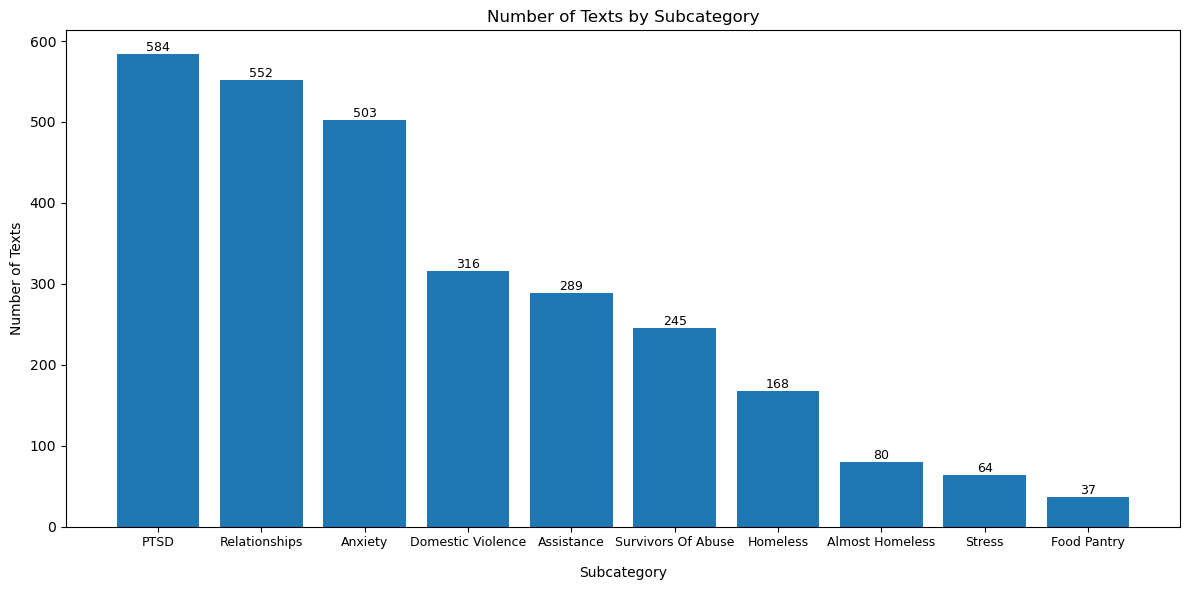

In [539]:
# Plot bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(subcategory_counts.index, subcategory_counts.values)

plt.title("Number of Texts by Subcategory")
plt.xlabel("Subcategory", labelpad = 12)
plt.ylabel("Number of Texts")
plt.xticks(fontsize=9)

# Add value labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{int(height)}",
             ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

**Key Observations:** 

1) **PTSD** (584 texts), **Relationships** (552 texts) and **Anxiety** (503 texts) dominate the dataset. These three categories together account for nearly 60% of all texts in the training dataset, showing where most of the Reddit users concerns cluster. 

2) **Domestic Violence** (316 texts), **Assistance** (289 texts) and **Survivors Of Abuse** (245 texts) form a second tier. These represent serious social and safety issues, but with fewer texts compared to mental health concerns. 

3) Lower Frequency Categories include **Homeless** (168 texts), **Almost Homeless** (80 texts), **Stress** (64 texts) and **Food Pantry** (37 texts). They have much smaller number of texts and these categories highlight material needs and situational crisis. However, they are underrepresented in the dataset. 

**Possible Insights:**

*  The dataset is heavily skewed toward psychological struggles (PTSD, Anxiety, Relationships) rather than material hardships (Homelessness, Food Pantry). This suggests Dreaddit users are more lilely to seek support for emotional and relational issues than for logistical or survival needs. 

*  The prominance of Relationships and Anxiety reflects the Draeddit community's role as a space for interpersonal and emotional support. Meanwhile, the smaller counts for Homelessness and Food Pantry suggest fewer users turn to Reddit for material aid compared to emotional support. 


##### **Visualization 1 Part 2: Number Of Positive And Negative Label Texts By Subcategory**

The initial plot provides an overview of how texts are distributed across subcategories, but it does not convery any information about the nature or severity of stress expressed within those texts. A subcategory with a large number of posts may not necessarily indicate a higher prevalence of depressive indicators, it may simply reflect higher engagement or posting activity within that topic. 

Therefore, in the next visualization, the texts within each subcategory are further disagregated by their labels - positive (label = 1) and negative (label = 0) and the frequency of each label type is calculated. This deeper breakdown allows us to distinguish between subcategories that predominantly contain expressions of stress and those that do not, providing more meaningful insights into the emotional content of each subcategory rather than relying solely on volume-based comparisons.


In [541]:
# Step 2: Plotting Number Of Positive And Negative Texts Within Each Subcategory

# Count positive and negative labels per subcategory
label_counts = dreaddit_train.groupby('Subcategory')['Label'].value_counts().unstack(fill_value=0)

# Rename subcategory labels
subcategory_rename_map = {"ptsd": "PTSD", "assistance": "Assistance", "relationships": "Relationships",
                          "survivorsofabuse": "Survivors Of Abuse", "domesticviolence": "Domestic Violence",
                          "anxiety": "Anxiety", "homeless": "Homeless", "stress": "Stress",
                          "almosthomeless": "Almost Homeless", "food_pantry": "Food Pantry"}

label_counts.index = label_counts.index.map(subcategory_rename_map)

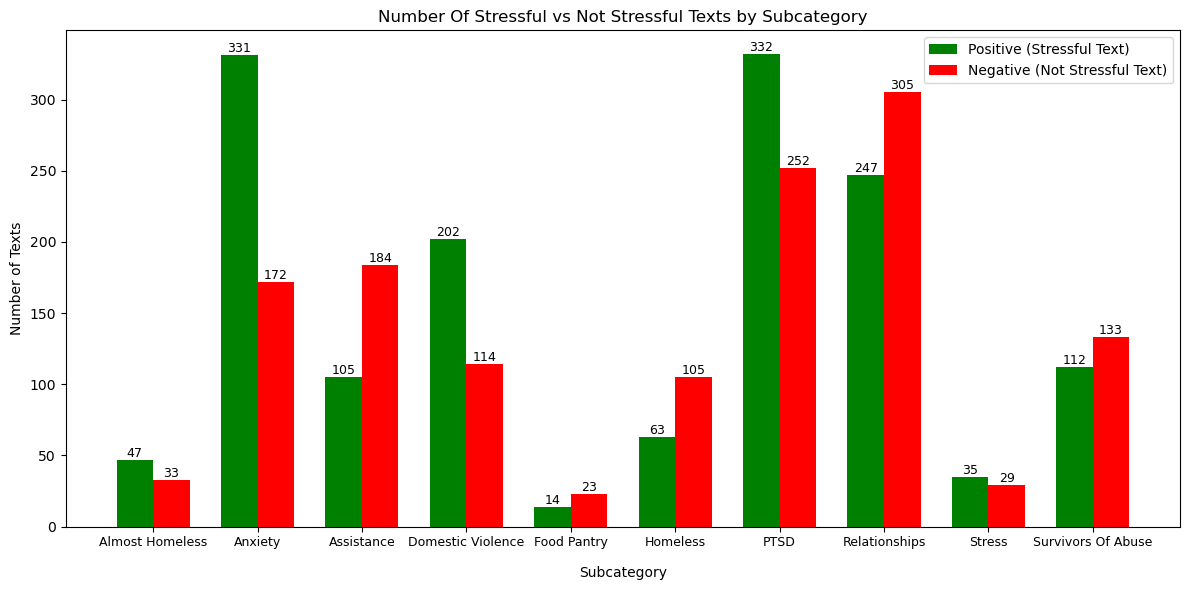

In [542]:
# Prepare bar positions for grouped bar chart
subcategories = label_counts.index
x = np.arange(len(subcategories)) 
width = 0.35

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bars_positive = ax.bar(x - width/2, label_counts.get(1, 0), width, label='Positive (Stressful Text)', color='green')
bars_negative = ax.bar(x + width/2, label_counts.get(0, 0), width, label='Negative (Not Stressful Text)', color='red')

# Add labels, titles, and ticks
ax.set_xlabel('Subcategory', labelpad=12)
ax.set_ylabel('Number of Texts')
ax.set_title('Number Of Stressful vs Not Stressful Texts by Subcategory')
ax.set_xticks(x)
ax.set_xticklabels(subcategories, fontsize=9)
ax.legend()

# Add value labels above each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}',
                ha='center', va='bottom', fontsize=9)

add_labels(bars_positive)
add_labels(bars_negative)
plt.tight_layout()
plt.show()

**Key Observations:**

1) **High Stress Categories** - This includes **Anxiety** (331 stressful vs 172 non-stressful) and **PTSD** (332 stressful vs 252 non-stressful). These categories show a clear majority of stressful texts. **Domestic Violence** (202 stressful vs 114 non-stressul) also highly skews towards stressful. These categories are strongly associated with emotional distress, aligning with clinical and social severity. 

2) **Low Stress Categories** - **Relationships** (247 stressful vs 305 non-stressful) has more non-stressful texts, suggesting that not all relationship-related posts are framed as crises - many may be just seeking advice. **Assistance** (105 stressful vs 184 non-stressful) also leans toward non-stressful, indicating that requests for help may often be practical rather than emotionally charged. 

3) **Balanced Categories** - **Stress** (35 stressful vs 29 non-stressful) and **Survivors Of Abuse** (112 stressful vs 133 non-stressful) are relatively balanced, showing that these topics can generate both stressful and non-stressful narratives depending on context. 

4) **Material Need Categories** - **Homeless** (63 stressful vs 105 non-stressful) and **Food Pantry** (14 stressful vs 23 non-stressful) show more non-stressful texts. This suggests that logistical or resource-based posts may be framed less as emotional distress and more as informational or community support. 

##### **Visualization 1 Part 3: Percentage Of Positive And Negative Label Texts By Subcategory**

The previous visualization provides a useful breakdown of positive and negative labels within each subcategory, but using absolute counts alone can be misleading when comparing subcategories of vastly different sizes. For example, a subcategory like PTSD may have hundreds of texts while a subcategory like Food Pantry may only have a few dozen. Even if both subcategories have a similar proportion of positive labels, the raw counts would suggest that PTSD is overwhelmingly more "stressful" than Food Pantry, which is not necessarily true.

To address this imbalance, the next visualization is employed to convert the counts into percentages relative to the total number of texts in each subcategory. This normalization allows for a fairer comparison, highlighting the proportion of postitive and negative labels within each subcategory rather than the raw volume. By using percentages, we can accurately interpret trends across subcategories regardless of their sample size, ensuring that similar subcategories are not undervalued or overshadowed by larger ones. 

In [544]:
# Step 3: Plotting Percentage Of Positive And Negative Texts Within Each Subcategory

# Calculate counts and convert to percentages
label_counts = dreaddit_train.groupby('Subcategory')['Label'].value_counts().unstack(fill_value=0)

# Rename subcategories
subcategory_rename_map = {"ptsd": "PTSD", "assistance": "Assistance", "relationships": "Relationships",
                          "survivorsofabuse": "Survivors Of Abuse", "domesticviolence": "Domestic Violence",
                          "anxiety": "Anxiety", "homeless": "Homeless", "stress": "Stress",
                          "almosthomeless": "Almost Homeless", "food_pantry": "Food Pantry"}
label_counts.index = label_counts.index.map(subcategory_rename_map)

# Convert counts to percentages per subcategory
label_percent = label_counts.div(label_counts.sum(axis=1), axis=0) * 100

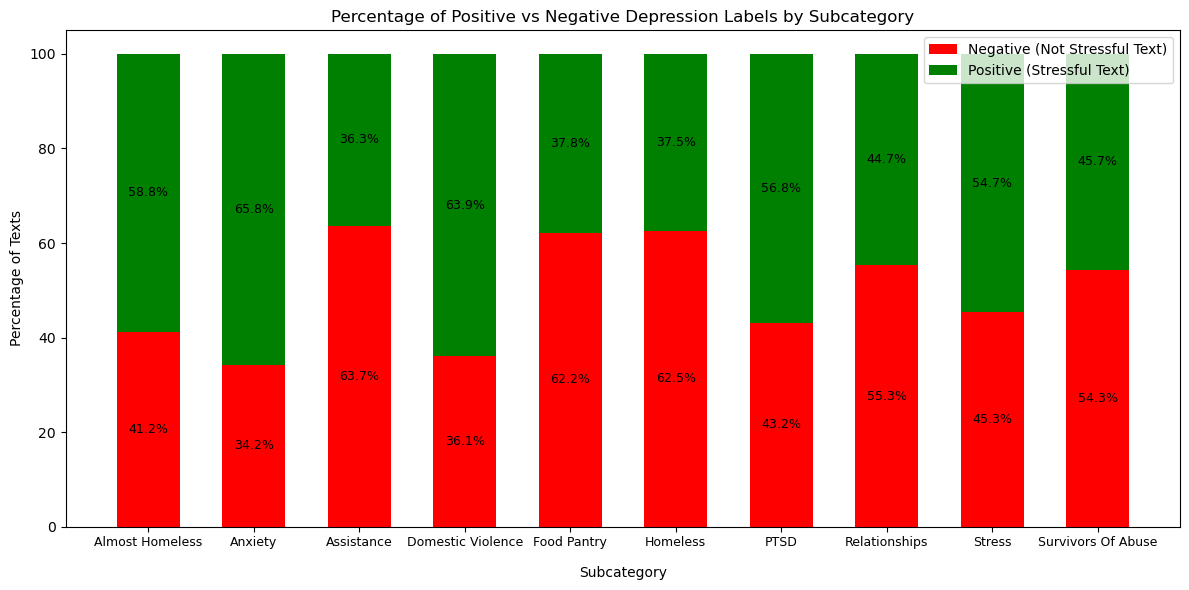

In [545]:
# Plot stacked bar chart (percentage)
subcategories = label_percent.index
x = np.arange(len(subcategories))
width = 0.6
fig, ax = plt.subplots(figsize=(12, 6))

# Plot negative first (red), then positive (green)
bars_negative = ax.bar(x, label_percent.get(0, 0), width, color='red', label='Negative (Not Stressful Text)')
bars_positive = ax.bar(x, label_percent.get(1, 0), width, bottom=label_percent.get(0, 0), color='green', label='Positive (Stressful Text)')

# Add value labels inside each bar
for i in range(len(subcategories)):
    neg_height = label_percent.get(0, 0).iloc[i]
    pos_height = label_percent.get(1, 0).iloc[i]
    
    # Negative label inside the bar
    if neg_height > 0:
        ax.text(x[i], neg_height/2, f'{neg_height:.1f}%', ha='center', va='center', color='black', fontsize=9)
    
    # Positive label inside the bar
    if pos_height > 0:
        ax.text(x[i], neg_height + pos_height/2, f'{pos_height:.1f}%', ha='center', va='center', color='black', fontsize=9)

# Customize axes, title, legend
ax.set_xlabel('Subcategory', labelpad=12)
ax.set_ylabel('Percentage of Texts')
ax.set_title('Percentage of Positive vs Negative Depression Labels by Subcategory')
ax.set_xticks(x)
ax.set_xticklabels(subcategories, fontsize=9)
ax.legend()
plt.tight_layout()
plt.show()

**Key Observations:**

1) **High-Stress Categories** (Majority Stressful) 

*   **Anxiety**: 65.8% stressful, 34.2% not stressful
*   **Domestic Violence**: 63.9% stressful, 36.1% not stressful
*   **Almost Homeless**: 58.8% stressful, 41.2% not stressful
*   **PTSD**: 56.8% stressful, 43.2% not stressful

2) **Low-Stress Categories** (Majority Not Stressful)

*   **Assistance**: 63.7% non-stressful, 36.3% stressful
*   **Food Pantry**: 62.2% non-stressful, 37.8% stressful
*   **Homeless**: 62.5% non-stressful, 37.5% stressful (These are probably more practical/resource-oriented, with users often framing them as logistical rather than emotional crisis)

3) **Balanced/Mized Categories** 

*   **Relationships**: 55.3% non-stressful, 44.7% stressful
*   **Survivors Of Abuse**: 54.3% non-stressful vs 45.7% stressful (These sit near the middle, showing that experiences in these areas can be noth stressful and reflective/advisory)

**Possible Insights:**

*  Although in raw counts, **PTSD** and **Anxiety** looked dominant, but percentages show that **Domestic Violence** and **Almost Homeless** are equally or more skewed toward stressful texts. This highlights categories where distress is proportionally higher even if total volume is lower. 

*  **Relationships** is a complex category. Despite being one of the largest categories, relationships still tilts slightly towards non-stressful (55.3%), showing that not all interpersonal posts are crisis-driven, many may be just seeking advice or reflective ones.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### **Visualization 2: Effect Of Text Length On Stress Labels**

To further understand how textual characteristics relate to stress indicators, we examine the relationship between **text length categories** (Very Short Text, Short Text, Medium Text, Long Text, Very Long Text) and the **assigned labels** (0 = Not Stressful Text, 1 = Stressful Text). First, we compute the absolute number of texts within each text length category that are labelled as positive and negative. This provides an initial sense of how label distributions very across different text lengths. 

However, because some text length categories may contain substantially more texts than others, absolute counts alone may led to biased interpretation. Therefore, we will additionally compute the absolute percentages of positive and negative labels within each text length category. The percentage-based perspective allows for a fairer comparison across text lengths, highlighting whether longer or shorter texts are proportionally more likely to express stressful indicators.

##### **Visualization 2 Part 1: Number Of Texts With Positive And Negative Labels By Text Length**

To examine how stress labels vary across different text length categories, a **heatmap** is used to visualize the relationship between text length (Very Short, Short, Medium, Long, Very Long) and label type (positive vs negative). The heatmap displays the absolute number of texts within each text length category that are labeled as positive or negative. Color intensity represents magnitude, making it easy to identify patterns. A color-blind friendly palette (Viridis color scale) is employed to ensure perceptual uniformity and accessibility.

In [548]:
# Step 1: Plotting Number Of Positive And Negative Texts By Text Length

# Create count-based contingency table
heatmap_counts = pd.crosstab(dreaddit_train["Text Length"], dreaddit_train["Label"])

# Rename columns for clarity
heatmap_counts.columns = ["Negative (0)", "Positive (1)"]

# Ensure logical ordering of text length categories
ordered_lengths = ["Very Short Text", "Short Text", "Medium Text", "Long Text", "Very Long Text"]
heatmap_counts = heatmap_counts.loc[ordered_lengths]

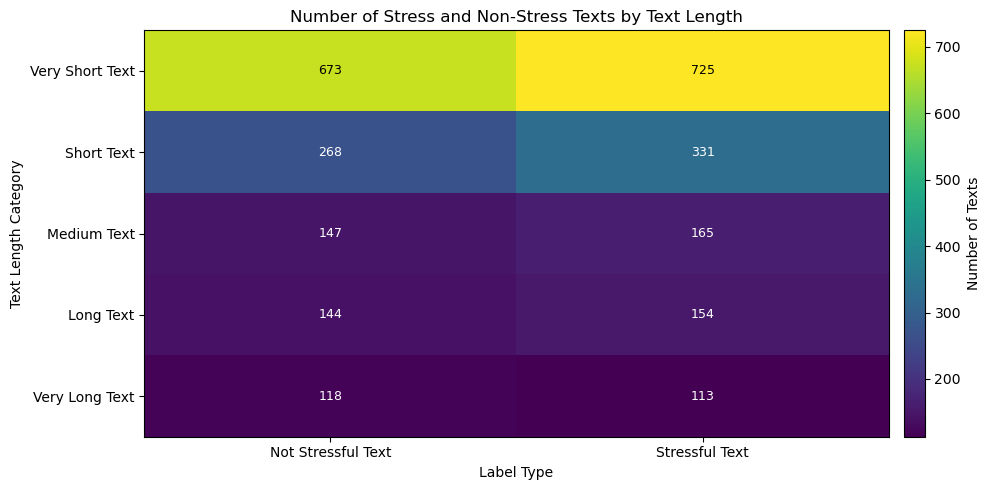

In [549]:
# Plot heatmap (number-based)
fig, ax = plt.subplots(figsize=(10, 5)) 
im = ax.imshow(heatmap_counts.values, cmap="viridis", aspect="auto")

# Axis labels and ticks
ax.set_xticks(np.arange(len(heatmap_counts.columns)))
ax.set_yticks(np.arange(len(heatmap_counts.index)))
ax.set_xticklabels(["Not Stressful Text", "Stressful Text"])
ax.set_yticklabels(heatmap_counts.index)

ax.set_xlabel("Label Type")
ax.set_ylabel("Text Length Category")
ax.set_title("Number of Stress and Non-Stress Texts by Text Length")

# Add value annotations with color threshold
threshold = 500
for i in range(len(heatmap_counts.index)):
    for j in range(len(heatmap_counts.columns)):
        value = heatmap_counts.iloc[i, j]
        text_color = "black" if value >= threshold else "white"
        ax.text(j, i, value, ha="center", va="center", color=text_color, fontsize=9)

cbar = plt.colorbar(im, ax=ax, fraction=0.035, pad=0.02)
cbar.set_label("Number of Texts")
plt.tight_layout()
plt.show()

**Key Observations:**

1) **Very Short Text** (1 to 10 sentences) dominate. There are **673 non-stressful** vs **725 stressful** texts, which represents tha largest category overall. This suggests that many users express distress or support in brief, concise posts rather than long narratives. 

2) **Short Text** (11 to 20 sentences) are the second largest, with **268 non-stressful** and **331 stressful texts**, still skewed towards stressful. This indicates that short posts often carry emotional weight, possibly quick disclosures or urgent statements.

3) For the other categories like **Medium Text** (21 to 30 sentences), **Long Text** (31 to 50 sentences) and **Very Long Text** (Over 50 sentences), the number of non-stressful and stressful texts are more balanced. These categories show near parity, suggesting that when users write more, they are equally likely to frame it as stressful or not stressful.

**Possible Insights:** 

1) **Stress Is Expressed Concisely**

    The majority of stressful texts are short or very short showing that distress often comes in brief bursts of communication. This aligns with the idea that people in crisis may not elaborate but instead post quickly and urgently. 

2) **Longer Texts Are More Reflective In Nature**

    As text length increases, the balance between stressful and non-stressful posts evens out. Longer posts may include context, reflections or advice-seeking, diluting the overall stress signal.


##### **Visualization 2 Part 2: Percentage Of Texts With Positive And Negative Labels By Text Length**

The percentage-based heatmap illustrates the proportion of texts within each text length category that are labeled as stress texts (positive) or not stress texts (negative), providing insight into how the likelihood of expressing stress-related content varies with text length. By examining percentages rather than raw counts, the visualization reveals patterns that are not driven by the volume of texts in each category but by their relative composition. For instance, even if very short texts appear frequently in the dataset, the heatmap allows us to assess whether they are proportionally more or less likely to indicate stress compared to longer texts. 

This normalized view is especially important given the imbalance across text length categories, where some lengths contain substantially more texts than others. Using percentages therefore enables fairer and more meaningful comparisons across categories, ensuring that observed trends reflect genuine differences in stress expression rather than due to unequal sample sizes.

In [551]:
# Step 2: Plotting Percentage Of Positive And Negative Texts By Text Length

heatmap_percent = (pd.crosstab(dreaddit_train["Text Length"],
                               dreaddit_train["Label"], normalize="index") * 100)

heatmap_percent.columns = ["Not Stressful Text", "Stressful Text"]
ordered_lengths = ["Very Short Text", "Short Text", "Medium Text", "Long Text", "Very Long Text"]
heatmap_percent = heatmap_percent.loc[ordered_lengths]

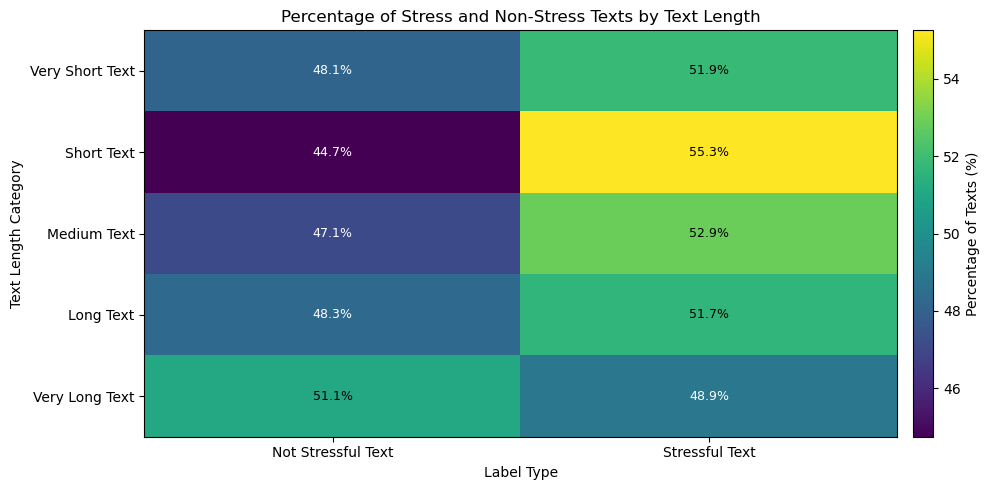

In [552]:
# Plot heatmap (percentage-based)
fig, ax = plt.subplots(figsize=(10, 5))
im = ax.imshow(heatmap_percent.values, cmap="viridis", aspect="auto")

# Axis labels and ticks
ax.set_xticks(np.arange(len(heatmap_percent.columns)))
ax.set_yticks(np.arange(len(heatmap_percent.index)))
ax.set_xticklabels(heatmap_percent.columns)
ax.set_yticklabels(heatmap_percent.index)

ax.set_xlabel("Label Type")
ax.set_ylabel("Text Length Category")
ax.set_title("Percentage of Stress and Non-Stress Texts by Text Length")

# Add percentage annotations
for i in range(len(heatmap_percent.index)):
    for j in range(len(heatmap_percent.columns)):
        value = heatmap_percent.iloc[i, j]
        ax.text(j, i, f"{value:.1f}%", ha="center", va="center",
                color="black" if value >= 50 else "white", fontsize=9)

cbar = plt.colorbar(im, ax=ax, fraction=0.035, pad=0.02)
cbar.set_label("Percentage of Texts (%)")
plt.tight_layout()
plt.show()

**Key Observations:**

1) When examining the percentage distribution of stressful vs non-stressful texts across different text lengths, a clear pattern emerges. **Short Text** (10 to 20 sentences) show the highest proportion of stressful posts (55.3%) while **Very Short Text** (1 to 10 sentences) and **Medium Text** (21 to 30 sentences) also skew slightly towards stressful at 51.9% and 52.9% respectively. 

2) **Long Text** (31 to 50 sentences) remain fairly balanced, with 51.7% stressful and 48.3% non-stressful. Interestingly, **Very Long Text** (Over 50 sentences) are the only category where non-stressful posts slightly outweigh stressful ones, at 51.1% compared to 48.9%. This suggests that while stress is more commonly expressed in shorter posts, longer narratives tend to balance out or even shift toward non-stressful framing. 

**Possible Insights:**

1) The results highlight an important behavioural trend - distress is often communicated in brief, urgent statements rather than lengthy explanations. Short texts are more likely to carry stressful content, which aligns with the ideas that indiciduals in crisis may not elaborate but instead post quickly and directly. 

2) Longer texts appear to dilute stress signals, as they often include context, reflection and advice-seeking, causing more non-stressful framing to be introduced to the text. The fact that very long texts lean slightly towards non-stressful suggests that extended narratives may represent reflective accounts, resource-sharing or supportive commentary rather than immediate distress. 

3) A possible reason why **Very Short Text** category (1 to 10 sentences) have lower than expected proportion of stressful text is that extremely short messages often lack the emotional detail needed to be labelled as stressful. Many of these posts may be neutral stetements, clarifications or simple requests that do not explicitly convey distress. In contrast, **Short Text** (11 to 20 sentences) provide just enough context or emotional language to signal distress more clearly.

------------------------------------------------------------------------------------------------------------------------------------

#### **Visualization 3: Identifying Most Common Words Used In Stressful And Non Stressful Texts**

To better understand the linguistic differences between stressful and non-stressful texts, we analyze the most frequently used words associated with each label. For each label (0 = non-stressful, 1 = stressful), all texts are first combined into a single corpus, allowing us to capture overall word usage patterns within each category. Common words that do not contribute meaningful semantic information such as articles and conjunctions (the, a, and) are then removed using a predefined list of stopwords. This preprocessing step ensures that the resulting visualizations highlight content-bearing words that better reflect emotional tone and thematic emphasis.

Two complementary visualizations are used. First, a word cloud provides an intuitive, high-level overview of commonly used words, where word size corresponds to frequency. While visually engaging, word clouds are qualitative in nature. Therefore, to support more precise comparison, we also plot the top 10 most frequently used words for each label using bar charts, where the x-axis represents words and the y-axis represents their frequency. Together, these visualizations allow us to identify both prominent themes and measurable differences in language usage between stressful and non-stressful texts.


##### **Visualization 3 Part 1: Word Clouds Of Words Used In Stressful And Not Stressful Texts**

In [555]:
!pip install wordcloud
from wordcloud import WordCloud
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tadam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [556]:
# Text preprocessing function
custom_stopwords = set(stopwords.words("english"))
extra_stopwords = {"im", "ive", "would", "could", "should", "may", "might", "must"} 
custom_stopwords = custom_stopwords.union(extra_stopwords)

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in custom_stopwords]
    return tokens

# Combine texts by label
stress_text = " ".join(dreaddit_train[dreaddit_train["Label"] == 1]["Text"])
non_stress_text = " ".join(dreaddit_train[dreaddit_train["Label"] == 0]["Text"])

# Preprocessing texts
stress_tokens = preprocess_text(stress_text)
non_stress_tokens = preprocess_text(non_stress_text)

# Generate word frequencies
stress_word_freq = Counter(stress_tokens)
non_stress_word_freq = Counter(non_stress_tokens)

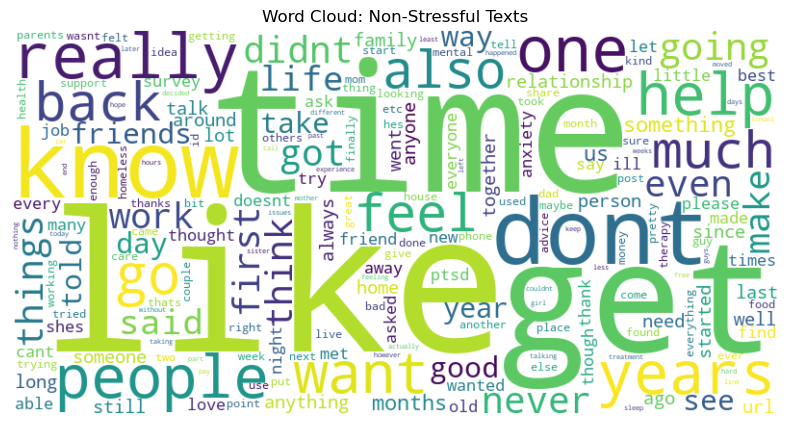

In [557]:
# Plotting Word Cloud For Non-Stressful Texts
wordcloud_non_stress = WordCloud(width=800, height=400, background_color="white",
                                 colormap="viridis").generate_from_frequencies(non_stress_word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_non_stress, interpolation="bilinear")
plt.title("Word Cloud: Non-Stressful Texts")
plt.axis("off")
plt.show()

The most prominent words in the word cloud include **time, know, like, back, years, people, help, said, really, want, good,friends, life, feel, going, one and take**. These words are larger, indicating higher frequency in non-stressful texts. Many of them are neutral or positive in tone — words like good, friends, life, and help suggest supportive or reflective contexts. Others, such as time, years, and back, point to temporal framing, where users are recounting experiences or reflecting on the past.

Interestingly, the vocabulary is dominated by general conversational words rather than highly emotional or crisis-driven terms. Words like know, like, said, and really reflect everyday language patterns, suggesting that non-stressful texts often resemble casual conversations or reflective storytelling rather than urgent disclosures.


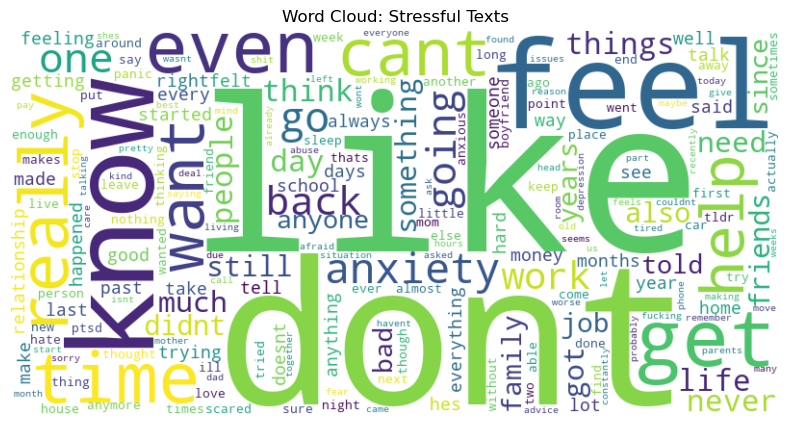

In [559]:
# Plotting Word Cloud For Stressful Texts
wordcloud_stress = WordCloud(width=800, height=400, background_color="white",
                             colormap="viridis").generate_from_frequencies(stress_word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_stress, interpolation="bilinear")
plt.title("Word Cloud: Stressful Texts")
plt.axis("off")
plt.show()

In the stressful texts word cloud, the most prominent words include **like, dont, know, feel, get, time, even, want, anxiety, really, back, still, help, people, life, work, and things.** Compared to the non-stressful word cloud, there is a noticeable shift in tone and vocabulary. Stressful texts feature more negative or uncertain expressions such as dont, feel, still, and anxiety, which directly convey emotional struggle. Words like work and things also suggest practical burdens or frustrations.

**Possible Insights:** 

1) The prevalence of words such as friends, help, and good in non-stressful texts suggests that non-stressful texts often revolve around social support, positive experiences or advice-seeking. These posts may be more about sharing life updates, seeking guidance or expressing gratitude rather than conveying distress. The frequent use of temporal markers like time, years and back indicates that non-stressful texts often involve reflection, where users recount past events in a calmer, less emotionally charged way.

2) Another insight is that while both stressful and non-stressful texts use common conversational words (like, know, really, people), the co-text and framing differ. In stressful texts, these words are embedded in narratives of struggle (don't know what to do, still feel bad), whereas in non-stressful texts they appear in more neutral or positive exchanges (know it's good, like spending time with friends). This highlights how linguistic overlap masks divergent emotional tones, making context crucial for classification.

##### **Visualization 3 Part 2: Plotting 10 Most Frequently Used Words In Stressful And Non Stressful Texts**



In [561]:
# Top 10 most frequent words
top10_stress = stress_word_freq.most_common(10)
top10_non_stress = non_stress_word_freq.most_common(10)

# Convert to DataFrames
df_stress = pd.DataFrame(top10_stress, columns=["Word", "Count"])
df_non_stress = pd.DataFrame(top10_non_stress, columns=["Word", "Count"])

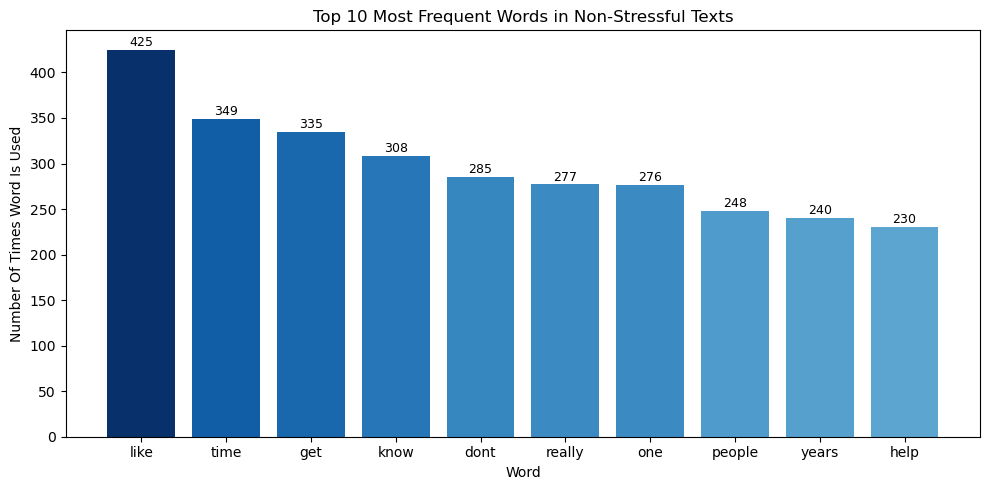

In [562]:
# Plotting Top 10 most frequent words for Non-Stressful Texts

# Normalize counts for color intensity (shades of blue)
counts = df_non_stress["Count"].values
colors = plt.cm.Blues(counts / counts.max())

# Plot bar chart
plt.figure(figsize=(10, 5))
bars = plt.bar(df_non_stress["Word"], counts, color=colors)
plt.title("Top 10 Most Frequent Words in Non-Stressful Texts")
plt.xlabel("Word")
plt.ylabel("Number Of Times Word Is Used")

# Add value labels on top of each bar
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
             str(count), ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

**Key Observations:**

1) The most frequent word is “like” (425), followed by “time” (349) and “get” (335). Other highly used words include “know” (308), “dont” (285), “really” (277), “one” (276), “people” (248), “years” (240), and “help” (230). 

2) The distribution shows that non-stressful texts rely heavily on general conversational words rather than emotionally charged or crisis-specific terms. Words such as like, time and know dominate, which are common in everyday dialogue and reflective writing. 

3) The presence of help among the top words suggests that even in non-stressful contexts, users often discuss assistance or support, but likely in a neutral or constructive way rather than urgent distress.


**Possible Insight:** 

The vocabulary pattern indicates that non-stressful texts are conversational, reflective and socially oriented. Words like time, years and back point to temporal framing, where users recount experiences or reflect on the past. Meanwhile, people and help highlight community engagement and supportive interactions, showing that non-stressful texts often involve advice-seeking, offering help or discussing relationships in a positive or neutral tone.


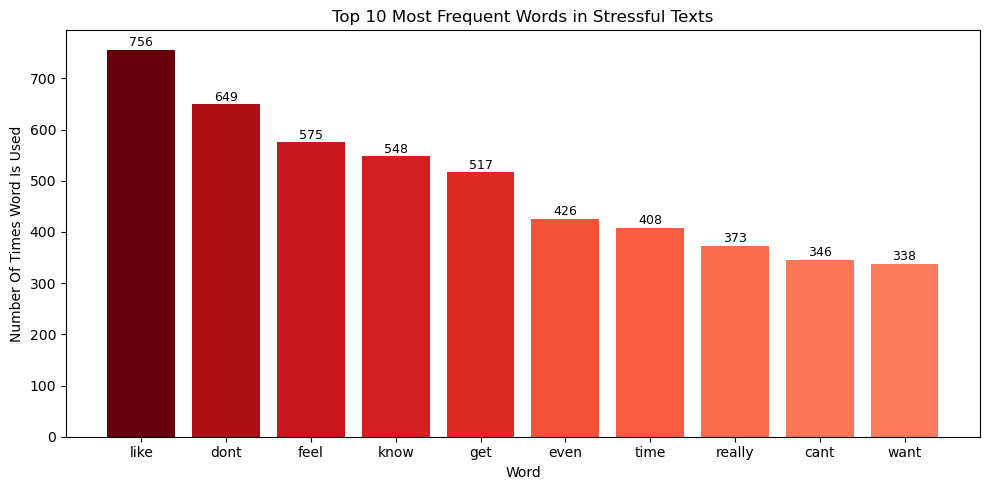

In [564]:
# Plotting Top 10 most frequent words for Stressful Texts

# Normalize counts for color intensity (shades of red)
counts = df_stress["Count"].values
colors = plt.cm.Reds(counts / counts.max())

# Plot bar chart
plt.figure(figsize=(10, 5))
bars = plt.bar(df_stress["Word"], counts, color=colors)
plt.title("Top 10 Most Frequent Words in Stressful Texts")
plt.xlabel("Word")
plt.ylabel("Number Of Times Word Is Used")

# Add value labels on top of each bar
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
             str(count), ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

**Key Observations:**

1) The most frequent word is “like” (756), followed by “dont” (649) and “feel” (575). Other highly used words include “know” (548), “get” (517), “even” (426), “time” (408), “really” (373), “cant” (346), and “want” (338). 

2) Compared to the non-stressful texts chart, stressful texts show a much higher frequency overall — for example, like appears almost twice as often in stressful texts (756 vs 425).

3) The vocabulary also shifts toward emotionally charged and negative expressions. Words such as dont, feel, cant and anxiety-related terms directly convey distress, uncertainty or limitation. This contrasts with the non-stressful chart, where words like years, friends and good were more prominent, reflecting reflection and positivity.

**Possible Insight:**

Stressful texts are characterized by higher intensity and repetition of emotionally loaded words. The prominence of dont and cant highlights themes of restriction, helplessness or barriers, while feel and want emphasize emotional states and unmet needs. The frequent use of even and still suggests ongoing struggles or frustration, reinforcing the sense of persistence in distress.

------------------------------------------------------------------------------------------------------------------------------------


#### **Visualization 4: Exploring Social Upvote Ratio Distributions On Stressful And Non-Stressful Texts**

First, let's examine the definition of **Social Upvote Ratio**:

The social upvote ratio is a metric that reflects the relative approval of a post or text by the online community. It is calculated as the proportion of upvotes to the total number of votes (upvotes + downvotes) that a post receives. A higher social upvote ratio indicates that a larger proportion of users found the post helpful, relatable or valuable, whereas a lower ratio may suggest disagreement, irrelevance or negative reception.

**Potential Differences Between Stressful and Non-Stressful Texts:**

Stressful texts, which often describe personal struggles, distress or sensitive experiences, may elicit more empathetic responses from readers, potentially resulting in higher upvote ratios if the content resonates with the community. Conversely, non-stressful texts, which may be neutral, informational or casual, might not engage the same emotional response and their social upvote ratios could vary differently. Analyzing these distributions can reveal whether online communities tend to respond more favorably to posts conveying stress or emotional content. 

To explore these patterns, a boxplot is employed, with one boxplot for stressful texts and another for non-stressful texts. Boxplots provide a concise summary of the distribution, highlighting key statistics such as the median, interquartile range, minimum and maximum values. By comparing the boxplots, we can visually assess differences in central tendency, spread and potential outliers between stressful and non-stressful texts. The primary aim is to determine whether stressful posts consistently receive higher community engagement as measured by the social upvote ratio.

In [567]:
# Separate social upvote ratios by label
stress_upvotes = dreaddit_train[dreaddit_train["Label"] == 1]["Upvote Proportion"]
non_stress_upvotes = dreaddit_train[dreaddit_train["Label"] == 0]["Upvote Proportion"]

In [568]:
# Function to annotate boxplot with correct offsets (Max above Q3 if equal)
def annotate_boxplot(bp, data, ax):
    """Annotate boxplot with min, Q1, median, Q3, max, adjusting overlaps"""
    stats = np.percentile(data, [0, 25, 50, 75, 100])
    labels = ["Min", "Q1", "Median", "Q3", "Max"]

    # Track previous y-values to handle overlaps
    prev_y = None
    for i, (y, label) in enumerate(zip(stats, labels)):
        # Only adjust if overlap with previous value
        if prev_y is not None and y == prev_y:
            if label == "Max":
                y_text = y + 0.02  # Max slightly above
            elif label == "Q3":
                y_text = y - 0.02  # Q3 slightly below
            else:
                y_text = y
        else:
            y_text = y
        ax.text(1.1, y_text, f"{label}: {y:.2f}", va='center', fontsize=9, fontweight="bold")
        prev_y = y

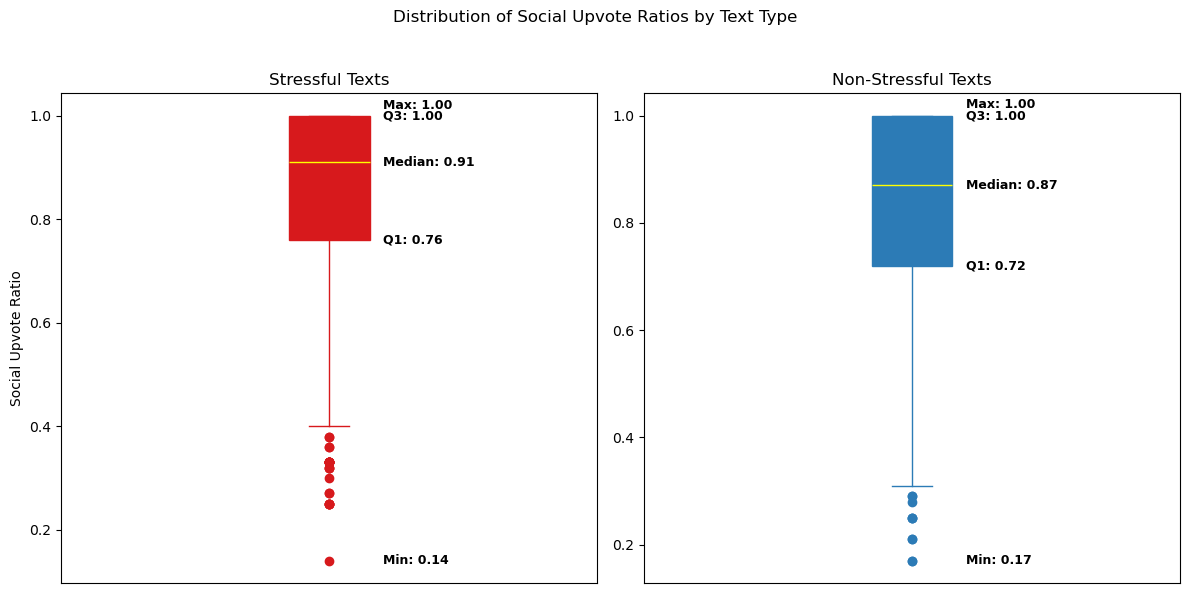

In [569]:
# Plot side-by-side boxplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
colors = ["#d7191c", "#2c7bb6"]

# Stressful Texts
bp1 = axes[0].boxplot(stress_upvotes, patch_artist=True,
                      boxprops=dict(facecolor=colors[0], color=colors[0]),
                      medianprops=dict(color="yellow"),
                      whiskerprops=dict(color=colors[0]),
                      capprops=dict(color=colors[0]),
                      flierprops=dict(markerfacecolor=colors[0], markeredgecolor=colors[0]))
axes[0].set_title("Stressful Texts")
axes[0].set_ylabel("Social Upvote Ratio")
axes[0].set_xticks([])
annotate_boxplot(bp1, stress_upvotes, axes[0])

# Non-Stressful Texts
bp2 = axes[1].boxplot(non_stress_upvotes, patch_artist=True,
                      boxprops=dict(facecolor=colors[1], color=colors[1]),
                      medianprops=dict(color="yellow"),
                      whiskerprops=dict(color=colors[1]),
                      capprops=dict(color=colors[1]),
                      flierprops=dict(markerfacecolor=colors[1], markeredgecolor=colors[1]))
axes[1].set_title("Non-Stressful Texts")
axes[1].set_xticks([])
annotate_boxplot(bp2, non_stress_upvotes, axes[1])

plt.suptitle("Distribution of Social Upvote Ratios by Text Type")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Key Observations:**

1) Both stressful and non-stressful texts reach the same maximum upvote ratio of 1.0, meaning that some posts in each category were universally approved by the community. However, the median upvote ratio is slightly higher for stressful texts (0.91) compared to non-stressful texts (0.87). Similarly, the first quartile (Q1) is higher for stressful texts (0.76) than for non-stressful texts (0.72), suggesting that even the lower-performing stressful posts tend to receive stronger approval than their non-stressful counterparts.

2) The minimum values show a small difference: stressful texts dip as low as 0.14 while non-stressful texts bottom out at 0.17. This indicates that while both categories can receive poor reception, stressful texts have a slightly wider spread in community response. Overall, the distribution suggests that stressful texts are more consistently well-received with higher central tendency values.

**Possible Insights:**

The data supports the idea that stressful texts elicit more empathetic and supportive responses from the community. Posts describing personal struggles or distress may resonate more deeply, prompting users to upvote as a gesture of solidarity or encouragement. This explains why stressful texts show higher median and quartile values in their upvote ratios.

Non-stressful texts, by contrast, may be more neutral, informational, or casual. While they can still achieve high approval (as seen in the maximum ratio of 1.0), they do not consistently generate the same empathetic engagement. Their slightly lower median and quartile values suggest that readers may be less compelled to upvote unless the content is particularly useful or relatable.

Another insight is that stressful texts carry higher emotional stakes which can polarize responses. The slightly lower minimum ratio for stressful texts indicates that while many resonate strongly, some may be perceived as oversharing, triggering discomfort or failing to connect, leading to lower approval.

------------------------------------------------------------------------------------------------------------------------------------

#### **Visualization 5: Exploring Number Of Comments On Stressful And Non-Stressful Texts**

The number of comments associated with a post provides an additional social engagement signal that may help distinguish between stressful and non-stressful texts. Posts that express distress, anxiety or emotional vulnerability are more likely to elicit responses from the community, such as offering advice, emotional support or shared experiences. In contrast, non-stressful texts may attract fewer comments or more neutral interactions.

To examine this relationship, we visualize the distribution of the number of comments for stressful and non-stressful texts using a violin plot. Compared to a boxplot, a violin plot captures not only summary statistics (such as the median and interquartile range) but also the full distributional shape, making it particularly suitable for identifying skewness, multimodality and extreme values. This visualization allows us to assess whether stressful texts tend to generate a higher volume of comments or exhibit greater variability in engagement, thereby offering deeper insight into how users respond to different types of content.

##### **Visualization 5 Part 1: Distribution Of Number Of Comments By Text Type (Absolute Number)**

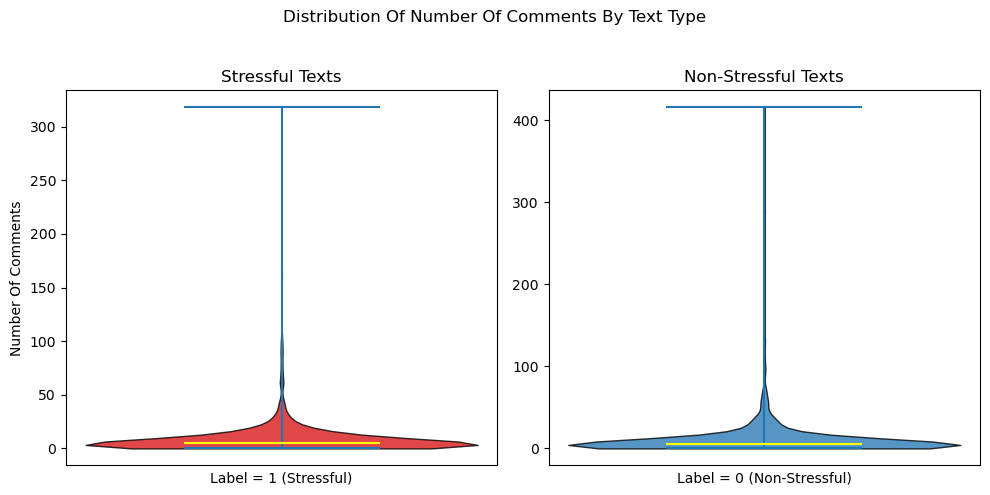

In [572]:
# Extract numeric data
stress_num_comments = dreaddit_train[dreaddit_train["Label"] == 1]["Number Of Comments"].dropna()
non_stress_num_comments = dreaddit_train[dreaddit_train["Label"] == 0]["Number Of Comments"].dropna()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Stressful texts (Label = 1)
vp1 = axes[0].violinplot(stress_num_comments, showmedians=True)

for body in vp1['bodies']:
    body.set_facecolor("#d7191c")
    body.set_edgecolor("black")
    body.set_alpha(0.8)

vp1['cmedians'].set_color("yellow")

axes[0].set_title("Stressful Texts")
axes[0].set_ylabel("Number Of Comments")
axes[0].set_xticks([])
axes[0].set_xlabel("Label = 1 (Stressful)")

# Non-stressful texts (Label = 0)
vp2 = axes[1].violinplot(non_stress_num_comments, showmedians=True)

for body in vp2['bodies']:
    body.set_facecolor("#2c7bb6")
    body.set_edgecolor("black")
    body.set_alpha(0.8)

vp2['cmedians'].set_color("yellow")

axes[1].set_title("Non-Stressful Texts")
axes[1].set_xticks([])
axes[1].set_xlabel("Label = 0 (Non-Stressful)")
plt.suptitle("Distribution Of Number Of Comments By Text Type")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

The violin plot generated highlights a key limitation: **the raw distribution of comment counts is extremely skewed**. There are several texts in both stressful and non-stressful texts that have many comments (in the hundreds) which make the maximum have much higher values. Most of the texts have comments of within 50 based on the violin plot distribution. This makes the visualization unsuitable for deeper analysis because it hides subtle differences in spread and central tendency. The plots suggest no statistical distinction even though the data may contain meaningful variation.

A better next step is to experiment with alternative transformations such as the **square root** transform. Unlike the log, the square root reduces skew while still preserving more variation in the mid-range values. This helps us to see differences in quartiles and medians without letting extreme outliers dominate the scale. By doing so, the interpretability of the raw counts will be retained while making the distribution shape clearer and the summary statistics more meaningful for comparison.

##### **Visualization 5 Part 2: Distribution Of Number Of Comments By Text Type (Square Root Transformed)**


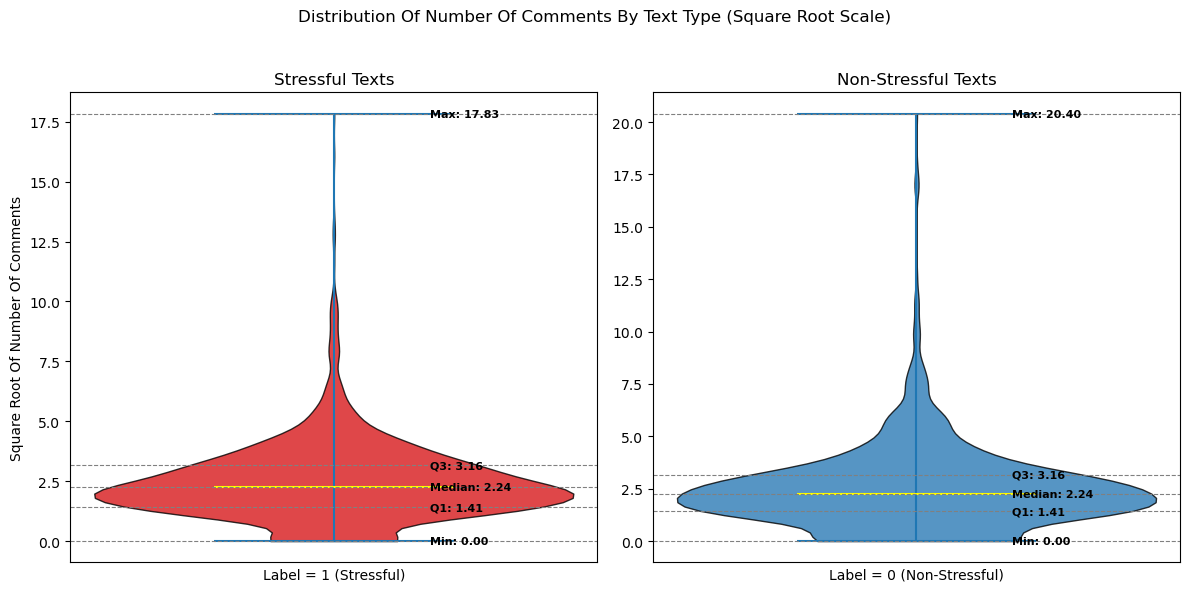

In [574]:
# Apply square root transform to reduce skew
stress_num_comments_sqrt = np.sqrt(stress_num_comments)
non_stress_num_comments_sqrt = np.sqrt(non_stress_num_comments)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

def add_summary_stats(ax, data, xpos=1):
    stats = {
        "Median": np.median(data),
        "Q1": np.percentile(data, 25),
        "Q3": np.percentile(data, 75),
        "Min": np.min(data),
        "Max": np.max(data)
    }

    for key, val in stats.items():
        ax.axhline(val, color="gray", linestyle="--", linewidth=0.8)
        ax.text(xpos + 0.1, val, f"{key}: {val:.2f}", va="center", fontsize=8, fontweight="bold")

# Stressful texts (Label = 1)
vp1 = axes[0].violinplot(stress_num_comments_sqrt, showmedians=True)
for body in vp1['bodies']:
    body.set_facecolor("#d7191c")
    body.set_edgecolor("black")
    body.set_alpha(0.8)

vp1['cmedians'].set_color("yellow")

axes[0].set_title("Stressful Texts")
axes[0].set_ylabel("Square Root Of Number Of Comments")
axes[0].set_xticks([])
axes[0].set_xlabel("Label = 1 (Stressful)")
add_summary_stats(axes[0], stress_num_comments_sqrt)

# Non-stressful texts (Label = 0)
vp2 = axes[1].violinplot(non_stress_num_comments_sqrt, showmedians=True)
for body in vp2['bodies']:
    body.set_facecolor("#2c7bb6")
    body.set_edgecolor("black")
    body.set_alpha(0.8)

vp2['cmedians'].set_color("yellow")

axes[1].set_title("Non-Stressful Texts")
axes[1].set_xticks([])
axes[1].set_xlabel("Label = 0 (Non-Stressful)")
add_summary_stats(axes[1], non_stress_num_comments_sqrt)

plt.suptitle("Distribution Of Number Of Comments By Text Type (Square Root Scale)")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Key Observations:**

1) The square-root scaled violin plots show that both stressful and non-stressful texts share nearly identical quartiles: **Q1 ≈ 1.41, median ≈ 2.24, and Q3 ≈ 3.16**, with a minimum of 0. This indicates that the bulk of the data is concentrated at low comment counts, regardless of text type.

2) The maximum values differ slightly, with **stressful texts reaching ≈ 17.8 and non-stressful texts ≈ 20.4**.

3) The violins themselves are narrow at the base, widen around the median, and taper toward the maximum, reflecting a skewed distribution with many low-comment texts and a few extreme outliers. The fact that quartiles and medians are exactly the same across both groups suggests that the transformation has compressed mid-range values, masking subtle differences in distribution.

**Possible Insights:**

The identical quartiles likely result from two factors: the square-root transformation, which reduces skew but can map multiple discrete values to the same transformed positions and the inherently discrete nature of comment counts.

The higher maximum for non-stressful texts contradicts the hypothesis that stressful texts attract more engagement. This discrepancy may be due to outliers: a few non-stressful posts could have gone viral or received unusually high attention because of topic popularity, posting time or community dynamics. Since maximum values are highly sensitive to single extreme cases, they are not reliable indicators of overall engagement.

------------------------------------------------------------------------------------------------------------------------------------

##### **Visualization 6: Plotting The Distribution Of Sentiment Values From Stressful And Non Stressful Text**

This visualization aims to examine the distribution of sentiment values in stressful and non-stressful texts, with particular emphasis on identifying the modal sentiment ranges for each group. Sentiment scores provide a numerical summary of emotional tone, typically ranging from negative to positive values. By observing where sentiment values concentrate most frequently (the mode), we can assess whether stressful texts tend to cluster around more negative sentiment ranges, while non-stressful texts may center around neutral or slightly positive values.

Understanding these differences is important because sentiment polarity often reflects underlying emotional distress, frustration or anxiety, which are key indicators of stress. In later modelling stages, sentiment values can serve as a discriminative feature to help classify unseen test data as texts exhibiting strongly negative sentiment may have a higher likelihood of being stressful compared to those with neutral or positive sentiment.

To visualize these patterns effectively, a **histogram** is used for each text category with a fixed bin width of 0.1, spanning the full sentiment range from -1.0 to +1.0. Using a constant bin interval ensures fair and consistent comparison between stressful and non-stressful texts, allowing differences in modal ranges and distribution shapes to be clearly observed. Histograms are particularly suitable here because they reveal both the frequency and spread of sentiment values, making it easy to detect skewness, clustering and overlaps between the two groups.

In [577]:
# Filter sentiment values by label
stressful_sentiment = dreaddit_train.loc[dreaddit_train["Label"] == 1, "Sentiment"].dropna()
non_stressful_sentiment = dreaddit_train.loc[dreaddit_train["Label"] == 0, "Sentiment"].dropna()

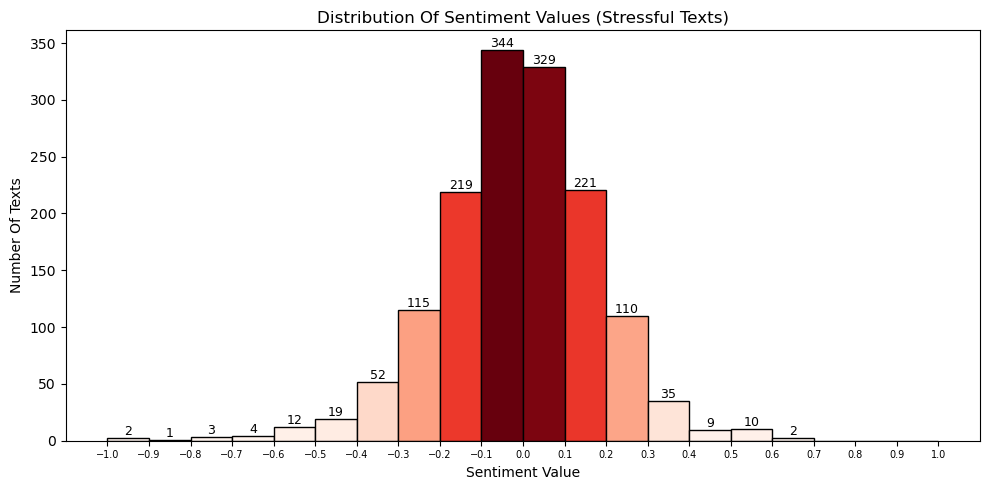

In [578]:
# Define fixed bins from -1.0 to 1.0 with width 0.1
bins = np.arange(-1.0, 1.1, 0.1)
plt.figure(figsize=(10, 5))

counts, bin_edges, patches = plt.hist(stressful_sentiment, bins=bins, density=False)

# Apply red color scale with intensity based on counts
max_count = max(counts)
for count, patch in zip(counts, patches):
    patch.set_facecolor(plt.cm.Reds(count / max_count))
    patch.set_edgecolor("black")

# Add count labels on each bar
for count, patch in zip(counts, patches):
    if count > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, count, int(count),
                 ha="center", va="bottom", fontsize=9)

plt.title("Distribution Of Sentiment Values (Stressful Texts)")
plt.xlabel("Sentiment Value")
plt.ylabel("Number Of Texts")
plt.xticks(bins, fontsize = 7)
plt.tight_layout()
plt.show()

**Key Observations:**

1) The histogram of sentiment values for **stressful texts** shows a strong clustering around neutral to slightly negative sentiment. The highest frequencies occur at sentiment values of **between -0.1 and 0.0** (344 texts), followed closely by **between 0.0 and 0.1** (329 texts). This indicates that most stressful texts are not extremely polarized but instead hover near the neutral range.

2) At the extremes, very few texts fall below -0.5 or above 0.5, with counts dropping sharply as sentiment moves toward -1.0 or +1.0. The distribution is roughly symmetrical, tapering off on both ends, but with a slight skew toward the negative side.

**Possible Insights:**

The concentration of stressful texts around neutral sentiment suggests that stress does not necessarily manifest in overtly negative language. Instead, many stressful posts may be expressed in a balanced or matter of fact tone, which sentiment analysis interprets as neutral.

The scarcity of extreme values implies that highly emotional or strongly positive/negative language is rare in this dataset. This could be due to the nature of the platform or community, where users describe stressful experiences in a restrained way rather than venting with extreme sentiment.

The slight skew toward negative values aligns with expectations that stressful texts lean more negative, but the dominance of neutral values highlights a limitation of sentiment scores: they may not fully capture the emotional weight of stress, especially when expressed subtly. This suggests that combining sentiment analysis with other linguistic features (intensity markers, topic modeling) would provide a more nuanced understanding of how stress is communicated.

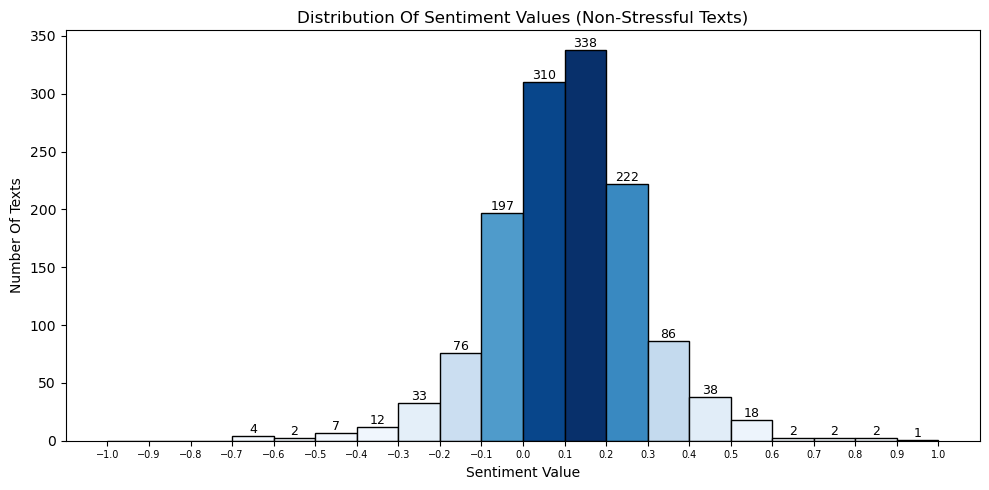

In [580]:
# Define fixed bins from -1.0 to 1.0 with width 0.1
bins = np.arange(-1.0, 1.1, 0.1)
plt.figure(figsize=(10, 5))

counts, bin_edges, patches = plt.hist(non_stressful_sentiment, bins=bins, density=False)

# Apply blue color scale with intensity based on counts
max_count = max(counts)
for count, patch in zip(counts, patches):
    patch.set_facecolor(plt.cm.Blues(count / max_count))
    patch.set_edgecolor("black")

# Add count labels on each bar
for count, patch in zip(counts, patches):
    if count > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, count, int(count),
                 ha="center", va="bottom", fontsize=9)

plt.title("Distribution Of Sentiment Values (Non-Stressful Texts)")
plt.xlabel("Sentiment Value")
plt.ylabel("Number Of Texts")
plt.xticks(bins, fontsize = 7)
plt.tight_layout()
plt.show()

**Key Observations:**

1) The histogram of sentiment values for non-stressful texts shows a concentration around neutral to slightly positive sentiment. The highest frequencies occur **between 0.1 and 0.2** (338 texts), followed closely by **between 0.0 and 0.1** (310 texts), indicating that most non-stressful texts lean toward neutrality or mild positivity.

2) Negative sentiment values are present but far less frequent, with counts dropping sharply below -0.2.

3) The distribution is roughly bell-shaped, tapering off toward both extremes, but with a noticeable skew toward the positive side compared to stressful texts. Extreme values above 0.5 or below -0.5 are rare, suggesting that non-stressful texts seldom use strongly emotional language.

**Possible Insights:**

The clustering around neutral and slightly positive values suggests that non-stressful texts are often expressed in balanced or optimistic tones, which sentiment analysis captures as positive. This contrasts with stressful texts, which clustered around neutral to slightly negative values. The difference implies that stress influences language tone, but not in an extreme way. Stressful texts avoid strong negativity, while non-stressful texts lean gently positive. The higher peak at 0.1 for non-stressful texts may reflect community norms of supportive or casual communication, where neutral posts sometimes carry a slight positive framing.

**Comparison And Reasons:**

Comparing stressful and non-stressful texts, both distributions are centered near neutrality, but stressful texts skew slightly negative while non-stressful texts skew slightly positive. The similarity in shape suggests that most posts, regardless of stress level, avoid extreme sentiment.

The divergence in skew could be explained by differences in expression: stressful posts may describe challenges in a factual or restrained way, leading to neutral/negative scores, while non-stressful posts may include casual positivity, encouragement or lightheartedness, nudging sentiment upward.

Note: Another reason could be the limitations of sentiment scoring itself. Subtle markers of stress (anxiety, worry) may not register as strongly negative, while mild positive phrasing in non-stressful texts is more easily detected. This highlights that sentiment analysis alone cannot fully capture the emotional depth of stress. Combining it with linguistic features would provide a more accurate picture.

------------------------------------------------------------------------------------------------------------------------------------

#### **Visualization 7: Exploring LIWC Linguistic Features and Their Relationships with Stressful vs. Non-Stressful Texts**

The Linguistic Inquiry and Word Count (LIWC) tool is widely used in computational linguistics and psychological research to quantify the presence of specific psychological, emotional and cognitive processes in text. LIWC categorizes words into several meaningful psychological dimensions, such as affective states (anxiety, sadness, anger), cognitive processes (causation, insight, certainty), self-focus (use of first-person pronouns), and social or situational stressors (family, work-related terms).

In the context of analyzing stressful versus non-stressful texts, these LIWC factors may reveal meaningful patterns. For example, texts with higher anxiety or anger scores may be more likely to be labeled as stressful (label = 1), whereas texts with higher positive affect or cognitive processing words might correlate with non-stressful texts (label = 0). Similarly, self-focused language could indicate internalized stress and social or situational stressor terms may provide contextual signals of stress experiences.

In this visualization, we focus on four main LIWC categories:

1.  **LIWC Affective Features** - capturing emotions such as anxiety, sadness, anger, and positive affect.

2.  **LIWC Cognitive Processing Features** - including analytical thinking, causation, certainty, and insight.

3.  **LIWC Self-Focus** - measuring the degree to which texts use first-person singular or plural pronouns, reflecting self-orientation or self-involvement.

4.  **LIWC Social and Situational Stressors** - representing references to family, friends, work, or other social stress contexts.

For each of these categories, we will:

1) Use boxplots to visualize the distribution of LIWC scores across stressful (label = 1) and non-stressful (label = 0) texts, providing insight into how different psychological or linguistic factors vary between the two groups.

2) Plot correlations between each subcategory within the LIWC group and the label, allowing us to quantify and compare the strength of association between linguistic features and text stressfulness.

This combined approach provides both a descriptive and quantitative understanding of how psychological and linguistic markers manifest in stressful versus non-stressful communication, helping to highlight the most informative features for subsequent modeling or analysis.

Lastly, we will identify **the top LIWC factors** which give the highest magnitude of correlation with label (for both positive and negative correlations) so that we can examine the strongest associations and take these associations into account when preparing for modelling.

##### **Visualization 7 Part 1: LIWC Affective Features**

First, we will create boxplots to visualize the distribution of LIWC scores across stressful (label = 1) and non-stressful (label = 0) texts for the LIWC affective features, which include:

* **Negative Emotional Language**
* **Anxity**
* **Sadness**
* **Anger**


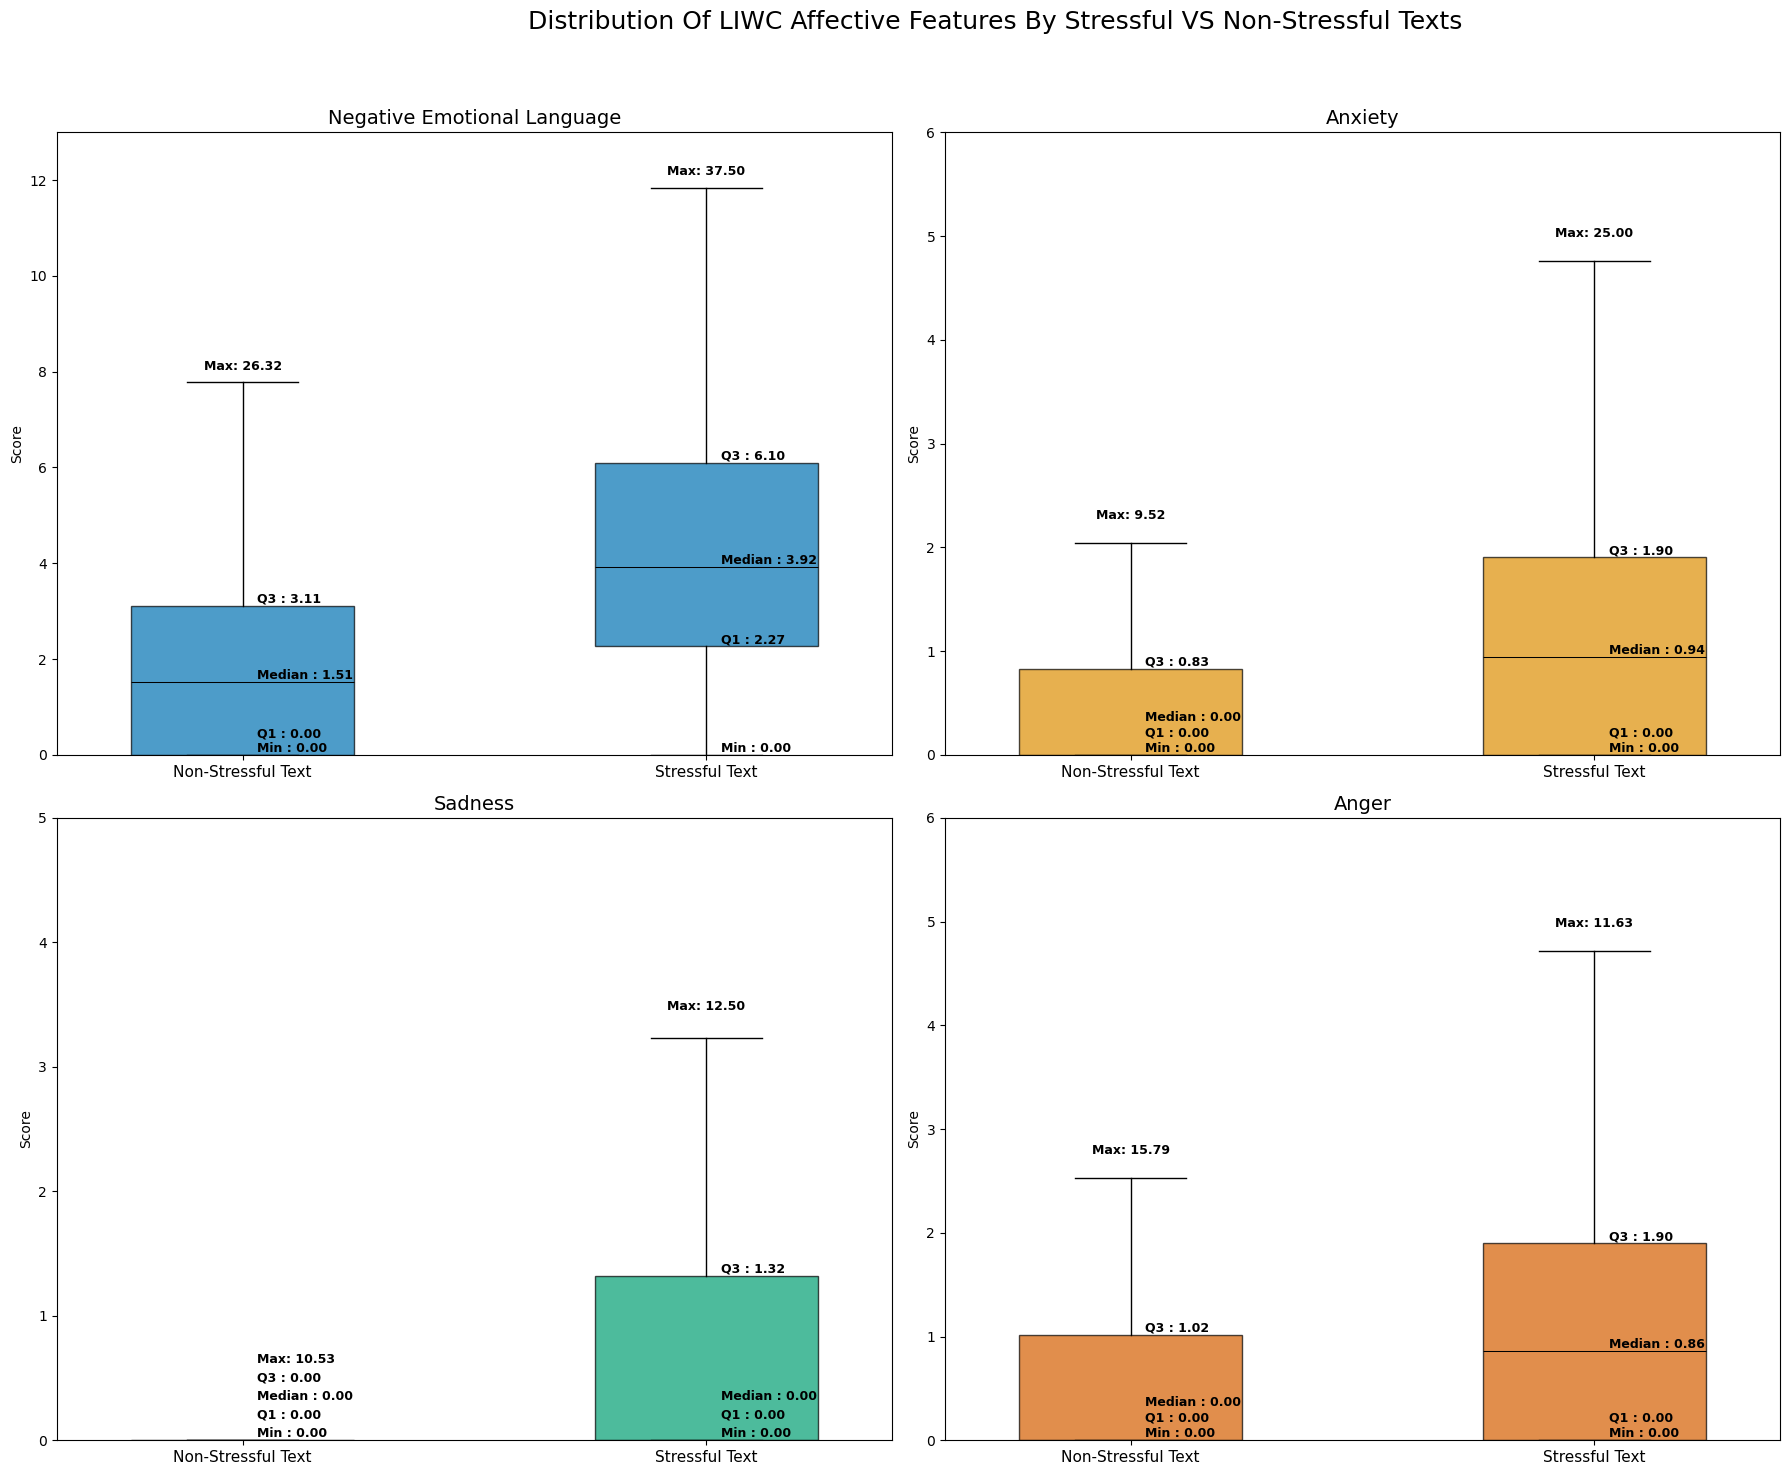

In [583]:
from matplotlib.patches import Patch

# LIWC Affective Features with cleaned column names
liwc_features = ["Negative Emotional Language", "Anxiety", "Sadness", "Anger"]
colors = sns.color_palette("colorblind", len(liwc_features))

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.flatten()

for i, feature in enumerate(liwc_features):
    ax = axes[i]
    data = [dreaddit_train[dreaddit_train['Label'] == 0][feature].dropna(),
            dreaddit_train[dreaddit_train['Label'] == 1][feature].dropna()]
    positions = [1, 2.25]

    bp = ax.boxplot(data, positions=positions, widths=0.6, patch_artist=True,
                    showfliers=False, medianprops=dict(color="black", linewidth=0.75))

    for patch in bp['boxes']:
        patch.set_facecolor(colors[i])
        patch.set_edgecolor("black")
        patch.set_alpha(0.7)

    whisker_tops = {}
    true_max_vals = {}

    for j, vals in enumerate(data):
        stats = {"Min": np.min(vals), "Q1": np.percentile(vals, 25), "Median": np.median(vals), "Q3": np.percentile(vals, 75)}
        true_max_vals[j] = np.max(vals)

        # Find whisker top for this category
        whisker_val = np.max([w.get_ydata().max() for w in bp['whiskers'] if w.get_xdata().mean() == positions[j]])
        whisker_tops[j] = whisker_val

        # Track duplicates to avoid overlap
        seen_vals = {}
        for k, (stat_name, val) in enumerate(stats.items()):
            offset = 0

            if val in seen_vals:
                offset = 0.15 * len(seen_vals[val])
                seen_vals[val].append(stat_name)
            else:
                seen_vals[val] = [stat_name]

            if feature == "Negative Emotional Language":
                if stat_name == "Q1" and stats["Q1"] == stats["Min"]:
                    offset += 0.15

            if j == 0:
                x_pos = positions[j] + 0.04
            else:
                x_pos = positions[j] + 0.04

            ax.text(x_pos, val + offset, f"{stat_name} : {val:.2f}", ha='left',
                    va='bottom', fontsize=9, color="black", fontweight="bold")

        # Add annotation for true maximum
        if feature == "Sadness" and j == 0:
            ax.text(positions[j] + 0.04, stats["Q3"] + 0.6, f"Max: {true_max_vals[j]:.2f}",
                    ha='left', va='bottom', fontsize=9, color="black", fontweight="bold")
        else:
            ax.text(positions[j], whisker_tops[j] + 0.2, f"Max: {true_max_vals[j]:.2f}",
                    ha='center', va='bottom', fontsize=9, color="black", fontweight="bold")

    # Axis formatting
    ax.set_xticks([1, 2.25])
    ax.set_xticklabels(["Non-Stressful Text", "Stressful Text"], fontsize=11)
    ax.set_title(feature, fontsize=14)
    ax.set_ylabel("Score")
    ax.set_ylim(0, np.ceil(max(whisker_tops.values()) + 1))

fig.suptitle("Distribution Of LIWC Affective Features By Stressful VS Non-Stressful Texts", fontsize=18)
plt.subplots_adjust(hspace=0.5)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

**Key Observations:**

1) **Negative Emotional Language** stands out with the highest values overall, especially in stressful texts where the median and upper quartile are clearly elevated compared to other categories.

2) **Anxiety, Sadness, and Anger** show much lower distributions, with many values clustering near zero for non-stressful texts. Sadness and Anger in particular reveal very compressed ranges in non-stressful contexts, suggesting that these emotions are far less frequently expressed compared to negative emotional language more broadly.

3) **Anxiety**, while generally low, shows a wider spread in stressful texts, indicating that stress tends to amplify variability in anxious language use.

**Differences between stressful and non-stressful texts:**

Across all four categories, stressful texts consistently exhibit higher medians, quartiles, and maximum values than non‑stressful texts. For example, stressful texts in Negative Emotional Language reach a median of nearly 4 compared to about 1.5 in non-stressful texts, while the upper quartile doubles from around 3 to over 6.

Similarly, Anxiety and Anger show clear upward shifts in stressful contexts, with stressful texts producing higher Q3 values and maxima. Even Sadness, which remains low overall, demonstrates a noticeable increase in the upper quartile and maximum under stress.

This pattern suggests that stress not only increases the intensity of emotional language but also broadens its variability, making emotional expression more pronounced and diverse compared to non-stressful contexts.

Now, we will explore the correlations between each subcategory within the LIWC group of affective features and the label, allowing us to quantify and compare the strength of association between linguistic features and text stressfulness.

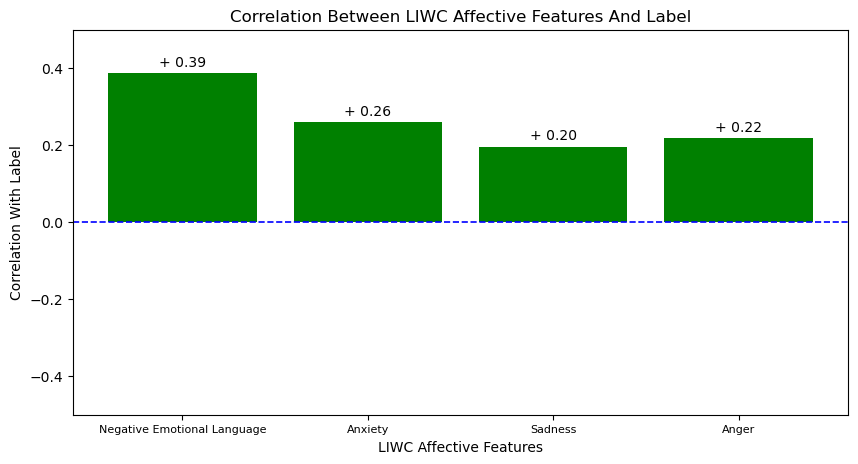

In [585]:
# List of LIWC affective features
features = ["Negative Emotional Language", "Anxiety", "Sadness", "Anger"]

# Calculate correlations with the label
correlations = dreaddit_train[features + ['Label']].corr()['Label'].drop('Label')

# Set colors: green for positive, red for negative
colors = ['green' if val >= 0 else 'red' for val in correlations]

# Create bar chart
plt.figure(figsize=(10, 5))
bars = plt.bar(correlations.index, correlations.values, color=colors)

# Add correlation value labels on top of bars
for bar, val in zip(bars, correlations.values):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.01 if val >= 0 else bar.get_height() - 0.03,
             f"+ {val:.2f}",
             ha='center', va='bottom' if val >= 0 else 'top',
             fontsize=10)

# Add brown reference line at 0
plt.axhline(0, color='blue', linewidth=1.2, linestyle='--')

# Adjust x-axis label font size
plt.xticks(fontsize=8)

plt.ylabel("Correlation With Label")
plt.xlabel("LIWC Affective Features")
plt.title("Correlation Between LIWC Affective Features And Label")
plt.ylim(-0.5, 0.5)
plt.show()

**Key Observations:**

1) **Negative Emotional Language** shows the strongest correlation with the stress label, around + 0.39, which suggests that texts containing more negative emotional words are most predictive of being stressful.

2) **Anxiety** follows with a moderate positive correlation (+ 0.26), while **Anger** (+ 0.22) and **Sadness** (+ 0.20) are slightly weaker but still positive. This ordering indicates that while all affective features contribute to distinguishing stressful texts, broad negative emotional language is the most dominant signal, with more specific emotions like sadness and anger playing secondary roles.

**Possible Insights:**

The fact that all correlations are positive means that higher values of these affective features consistently align with stressful texts, while lower values align with non-stressful texts. The relatively stronger correlation for Negative Emotional Language suggests that stressful texts are not only more likely to contain specific emotions like anxiety or sadness, but also a general increase in negative affective vocabulary overall. Meanwhile, the weaker but still positive correlations for Sadness and Anger imply that these emotions are present but less consistently predictive compared to anxiety or broad negativity.

Stressful texts are characterized by a richer presence of negative emotional language, with anxiety serving as a strong secondary marker. Sadness and anger contribute as well, but their predictive power is more modest. This pattern underscores that stress manifests linguistically both through general negativity and through specific emotional tones, with negative emotional language being the most reliable indicator.

##### **Visualization 7 Part 2: LIWC Cognitive Processing Features**

Next, we will create boxplots to visualize the distribution of LIWC scores across stressful (label = 1) and non-stressful (label = 0) texts for the LIWC Cognitive Processing features, which include:

* **Cognitive Processing**
* **Introspective Language**
* **Casual Reasoning Language**
* **Tentative Language**
* **Certainty**

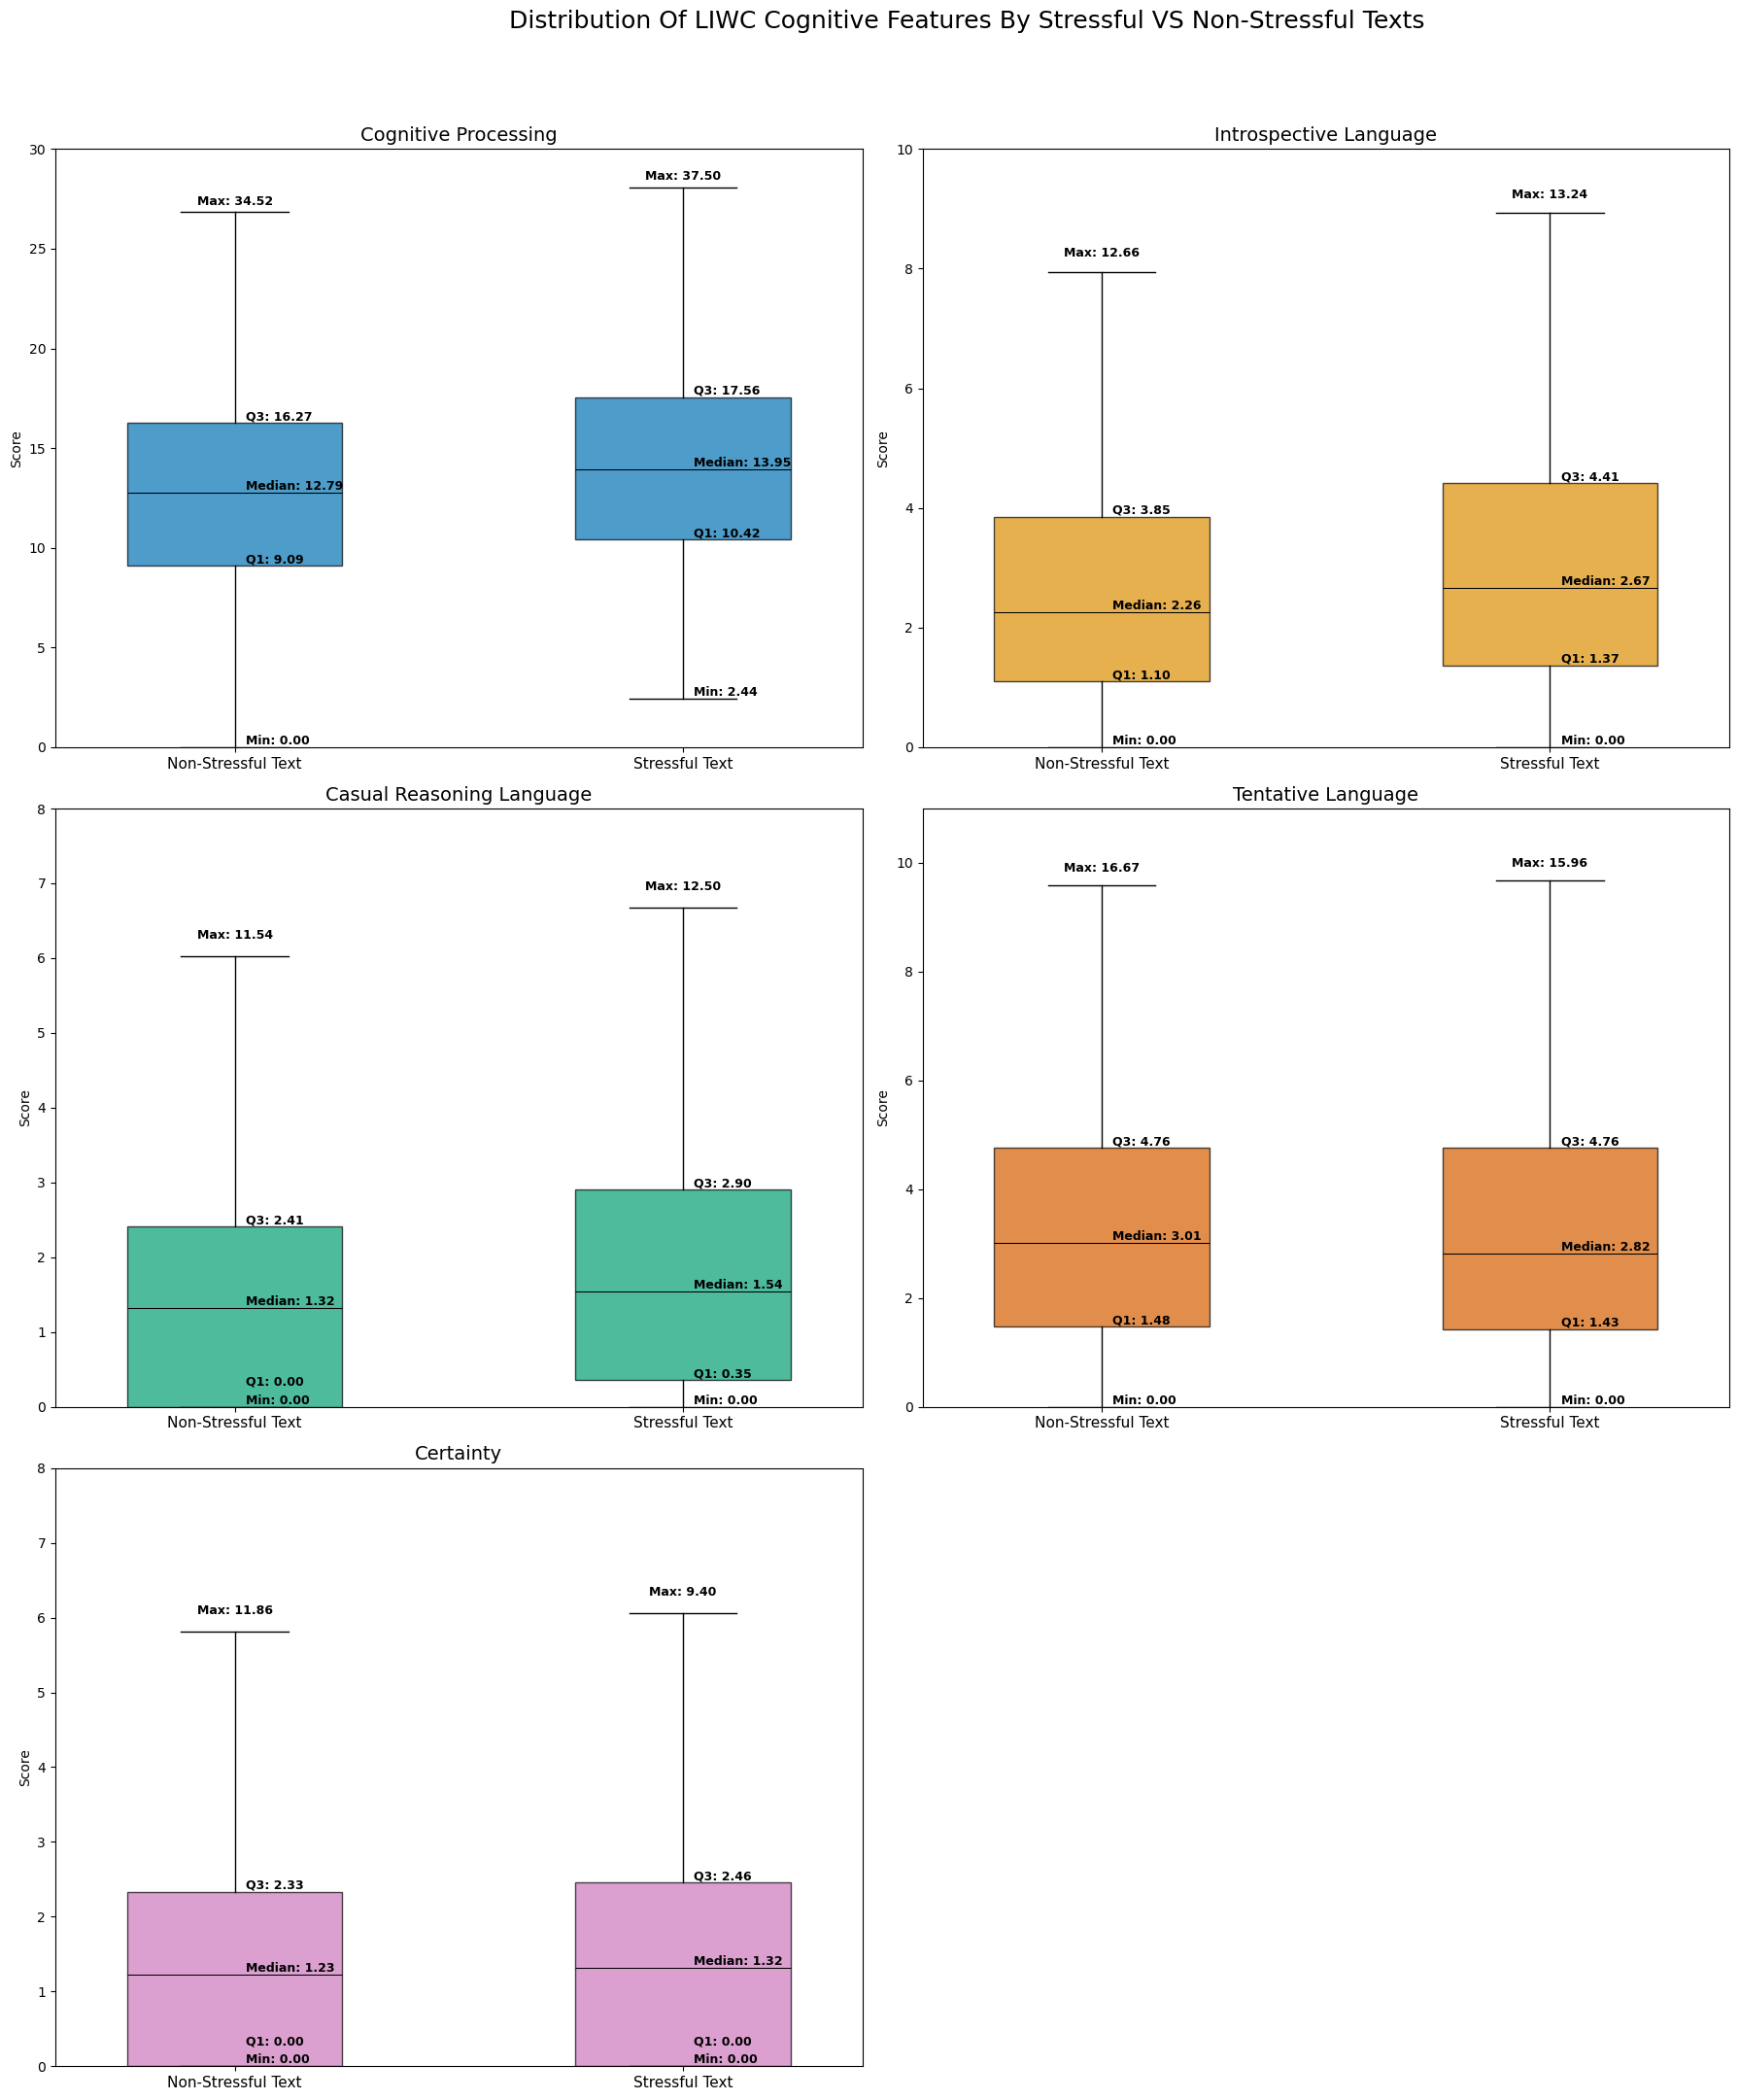

In [587]:
# LIWC Cognitive / Language Features
cog_features = ['Cognitive Processing', 'Introspective Language',  'Casual Reasoning Language',
                'Tentative Language', 'Certainty']
colors = sns.color_palette("colorblind", len(cog_features))
fig, axes = plt.subplots(3, 2, figsize=(20, 22))
axes = axes.flatten()

for i, feature in enumerate(cog_features):
    ax = axes[i]
    data = [dreaddit_train[dreaddit_train['Label'] == 0][feature].dropna(),
            dreaddit_train[dreaddit_train['Label'] == 1][feature].dropna()]
    positions = [1, 2.25]

    bp = ax.boxplot(data, positions=positions, widths=0.6, patch_artist=True,
                    showfliers=False, medianprops=dict(color="black", linewidth=0.75))

    for patch in bp['boxes']:
        patch.set_facecolor(colors[i])
        patch.set_edgecolor("black")
        patch.set_alpha(0.7)

    whisker_tops = {}
    true_max_vals = {}

    for j, vals in enumerate(data):
        stats = {"Min": np.min(vals), "Q1": np.percentile(vals, 25), "Median": np.median(vals), "Q3": np.percentile(vals, 75)}
        true_max_vals[j] = np.max(vals)

        whisker_val = np.max([w.get_ydata().max() for w in bp['whiskers'] if w.get_xdata().mean() == positions[j]])
        whisker_tops[j] = whisker_val

        for stat_name, val in stats.items():
            offset = 0
            if stat_name == "Q1" and stats["Min"] == stats["Q1"]:
                offset += 0.25
            x_pos = positions[j] + 0.03
            ax.text(x_pos, val + offset, f"{stat_name}: {val:.2f}", ha='left',
                    va='bottom', fontsize=9, color="black", fontweight="bold")
        ax.text(positions[j], whisker_tops[j] + 0.2, f"Max: {true_max_vals[j]:.2f}",
                ha='center', va='bottom', fontsize=9, color="black", fontweight="bold")

    ax.set_xticks([1, 2.25])
    ax.set_xticklabels(["Non-Stressful Text", "Stressful Text"], fontsize=11)
    ax.set_title(feature, fontsize=14)
    ax.set_ylabel("Score")
    ax.set_ylim(0, np.ceil(max(whisker_tops.values()) + 1))

# Hide the 6th unused subplot
axes[-1].axis('off')

fig.suptitle("Distribution Of LIWC Cognitive Features By Stressful VS Non-Stressful Texts", fontsize=18)
plt.subplots_adjust(hspace=0.5)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

**Key Observations:**

1) **Cognitive Processing** shows the highest overall values among the features, with medians around 13-14 and upper quartiles reaching 16-18. This suggests that both stressful and non-stressful texts are rich in cognitive markers, reflecting reasoning and analytical language.

2) **Introspective Language** and **Tentative Language** occupy a middle range, with medians around 2-3 and upper quartiles near 4-5, indicating moderate use of self-reflective and uncertain phrasing.

3) **Casual Reasoning** and **Certainty** are lower overall, with medians closer to 1 and upper quartiles around 2-3, suggesting that explicit causal explanations and strong assertions are less frequent compared to broader cognitive processing or tentative expressions.

**Differences between stressful and non-stressful texts:**

Across most categories, stressful texts show slightly higher values than non-stressful texts. For example, Cognitive Processing in stressful texts has a higher median (13.99 vs. 12.77) and upper quartile (17.56 vs. 16.27), indicating more complex reasoning under stress.

Introspective Language also rises modestly in stressful texts, suggesting that stress prompts more self-reflection. Casual Reasoning shows a similar upward shift, with stressful texts reaching higher quartiles and maxima, implying that stress encourages more causal explanations.

Tentative Language, however, remains nearly identical between the two categories, showing that uncertainty is expressed at similar levels regardless of stress. Certainty is slightly higher in stressful texts at the median but has a lower maximum, suggesting that while stressful texts may include more frequent assertions, they avoid extreme certainty compared to non-stressful texts.

Now, we will explore the correlations between each subcategory within the LIWC group of cognitive features and the label.



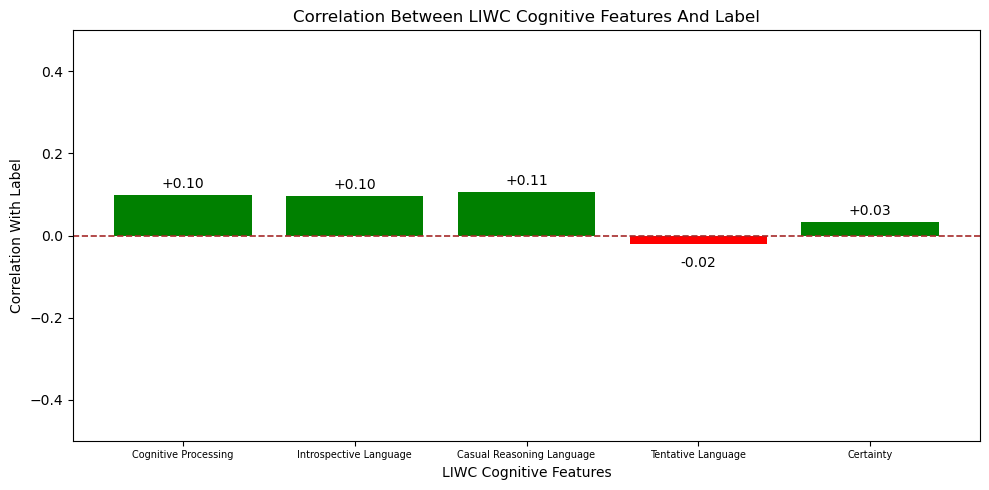

In [589]:
# List of LIWC cognitive features
cog_features = ['Cognitive Processing', 'Introspective Language', 'Casual Reasoning Language',
                'Tentative Language', 'Certainty']

# Calculate correlations with the label
correlations = dreaddit_train[cog_features + ['Label']].corr()['Label'].drop('Label')

# Set colors: green for positive, red for negative
colors = ['green' if val >= 0 else 'red' for val in correlations]

# Create bar chart
plt.figure(figsize=(10, 5))
bars = plt.bar(correlations.index, correlations.values, color=colors)

# Add correlation value labels on top of bars
for bar, val in zip(bars, correlations.values):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.01 if val >= 0 else bar.get_height() - 0.03,
             f"{val:+.2f}",  # include + or - sign
             ha='center', va='bottom' if val >= 0 else 'top',
             fontsize=10)

# Add reference line at 0
plt.axhline(0, color='brown', linewidth=1.2, linestyle='--')

# Adjust x-axis label font size
plt.xticks(fontsize=7)

plt.ylabel("Correlation With Label")
plt.xlabel("LIWC Cognitive Features")
plt.title("Correlation Between LIWC Cognitive Features And Label")
plt.ylim(-0.5, 0.5)
plt.tight_layout()
plt.show()

**Key Observations:**

1) **Casual Reasoning Language** shows the strongest positive correlation (+0.11), suggesting that when people are stressed, they tend to use more causal explanations in their language. **Cognitive Processing** and **Introspective Language** both follow closely at +0.10, indicating that stressed texts are slightly more likely to contain analytical or self-reflective language.

2) **Certainty** has a weaker positive correlation (+0.03), implying that while stressed texts may include more assertive statements, the effect is minimal. **Tentative Language** stands out as the only feature with a negative correlation (-0.02), suggesting that uncertainty or hedging is slightly less common in stressful texts compared to non-stressful ones.

**Possible Insights:**

The overall pattern shows that stressful texts lean toward more reasoning, reflection, and cognitive engagement, albeit with modest effect sizes. The positive correlations for Cognitive Processing, Introspective Language, and Casual Reasoning suggest that stress prompts individuals to think more deeply and explain more often, possibly as a way of coping or rationalizing their experiences.

The slight negative correlation for Tentative Language indicates that stressed individuals may be less likely to hedge or express uncertainty, instead favoring more direct or explanatory language. Certainty's weak positive correlation reinforces this idea, showing that stressed texts may contain slightly more confident assertions, though not strongly so.

Stressful texts are modestly characterized by greater reasoning and introspection, while non-stressful texts show a marginally higher tendency toward tentative or uncertain phrasing. This highlights how stress influences not only emotional expression but also cognitive style, nudging language toward explanation and reflection rather than uncertainty.

##### **Visualization 7 Part 3: LIWC Self Focus Features**

Next, we will create boxplots to visualize the distribution of LIWC scores across stressful (label = 1) and non-stressful (label = 0) texts for the LIWC Self Focus features, which include:

* **First Person Singular Pronouns**
* **First Person Plural Pronouns**
* **Second Person Pronouns**
* **Third Person Singular Pronouns**
* **Third Person Plural Pronouns**


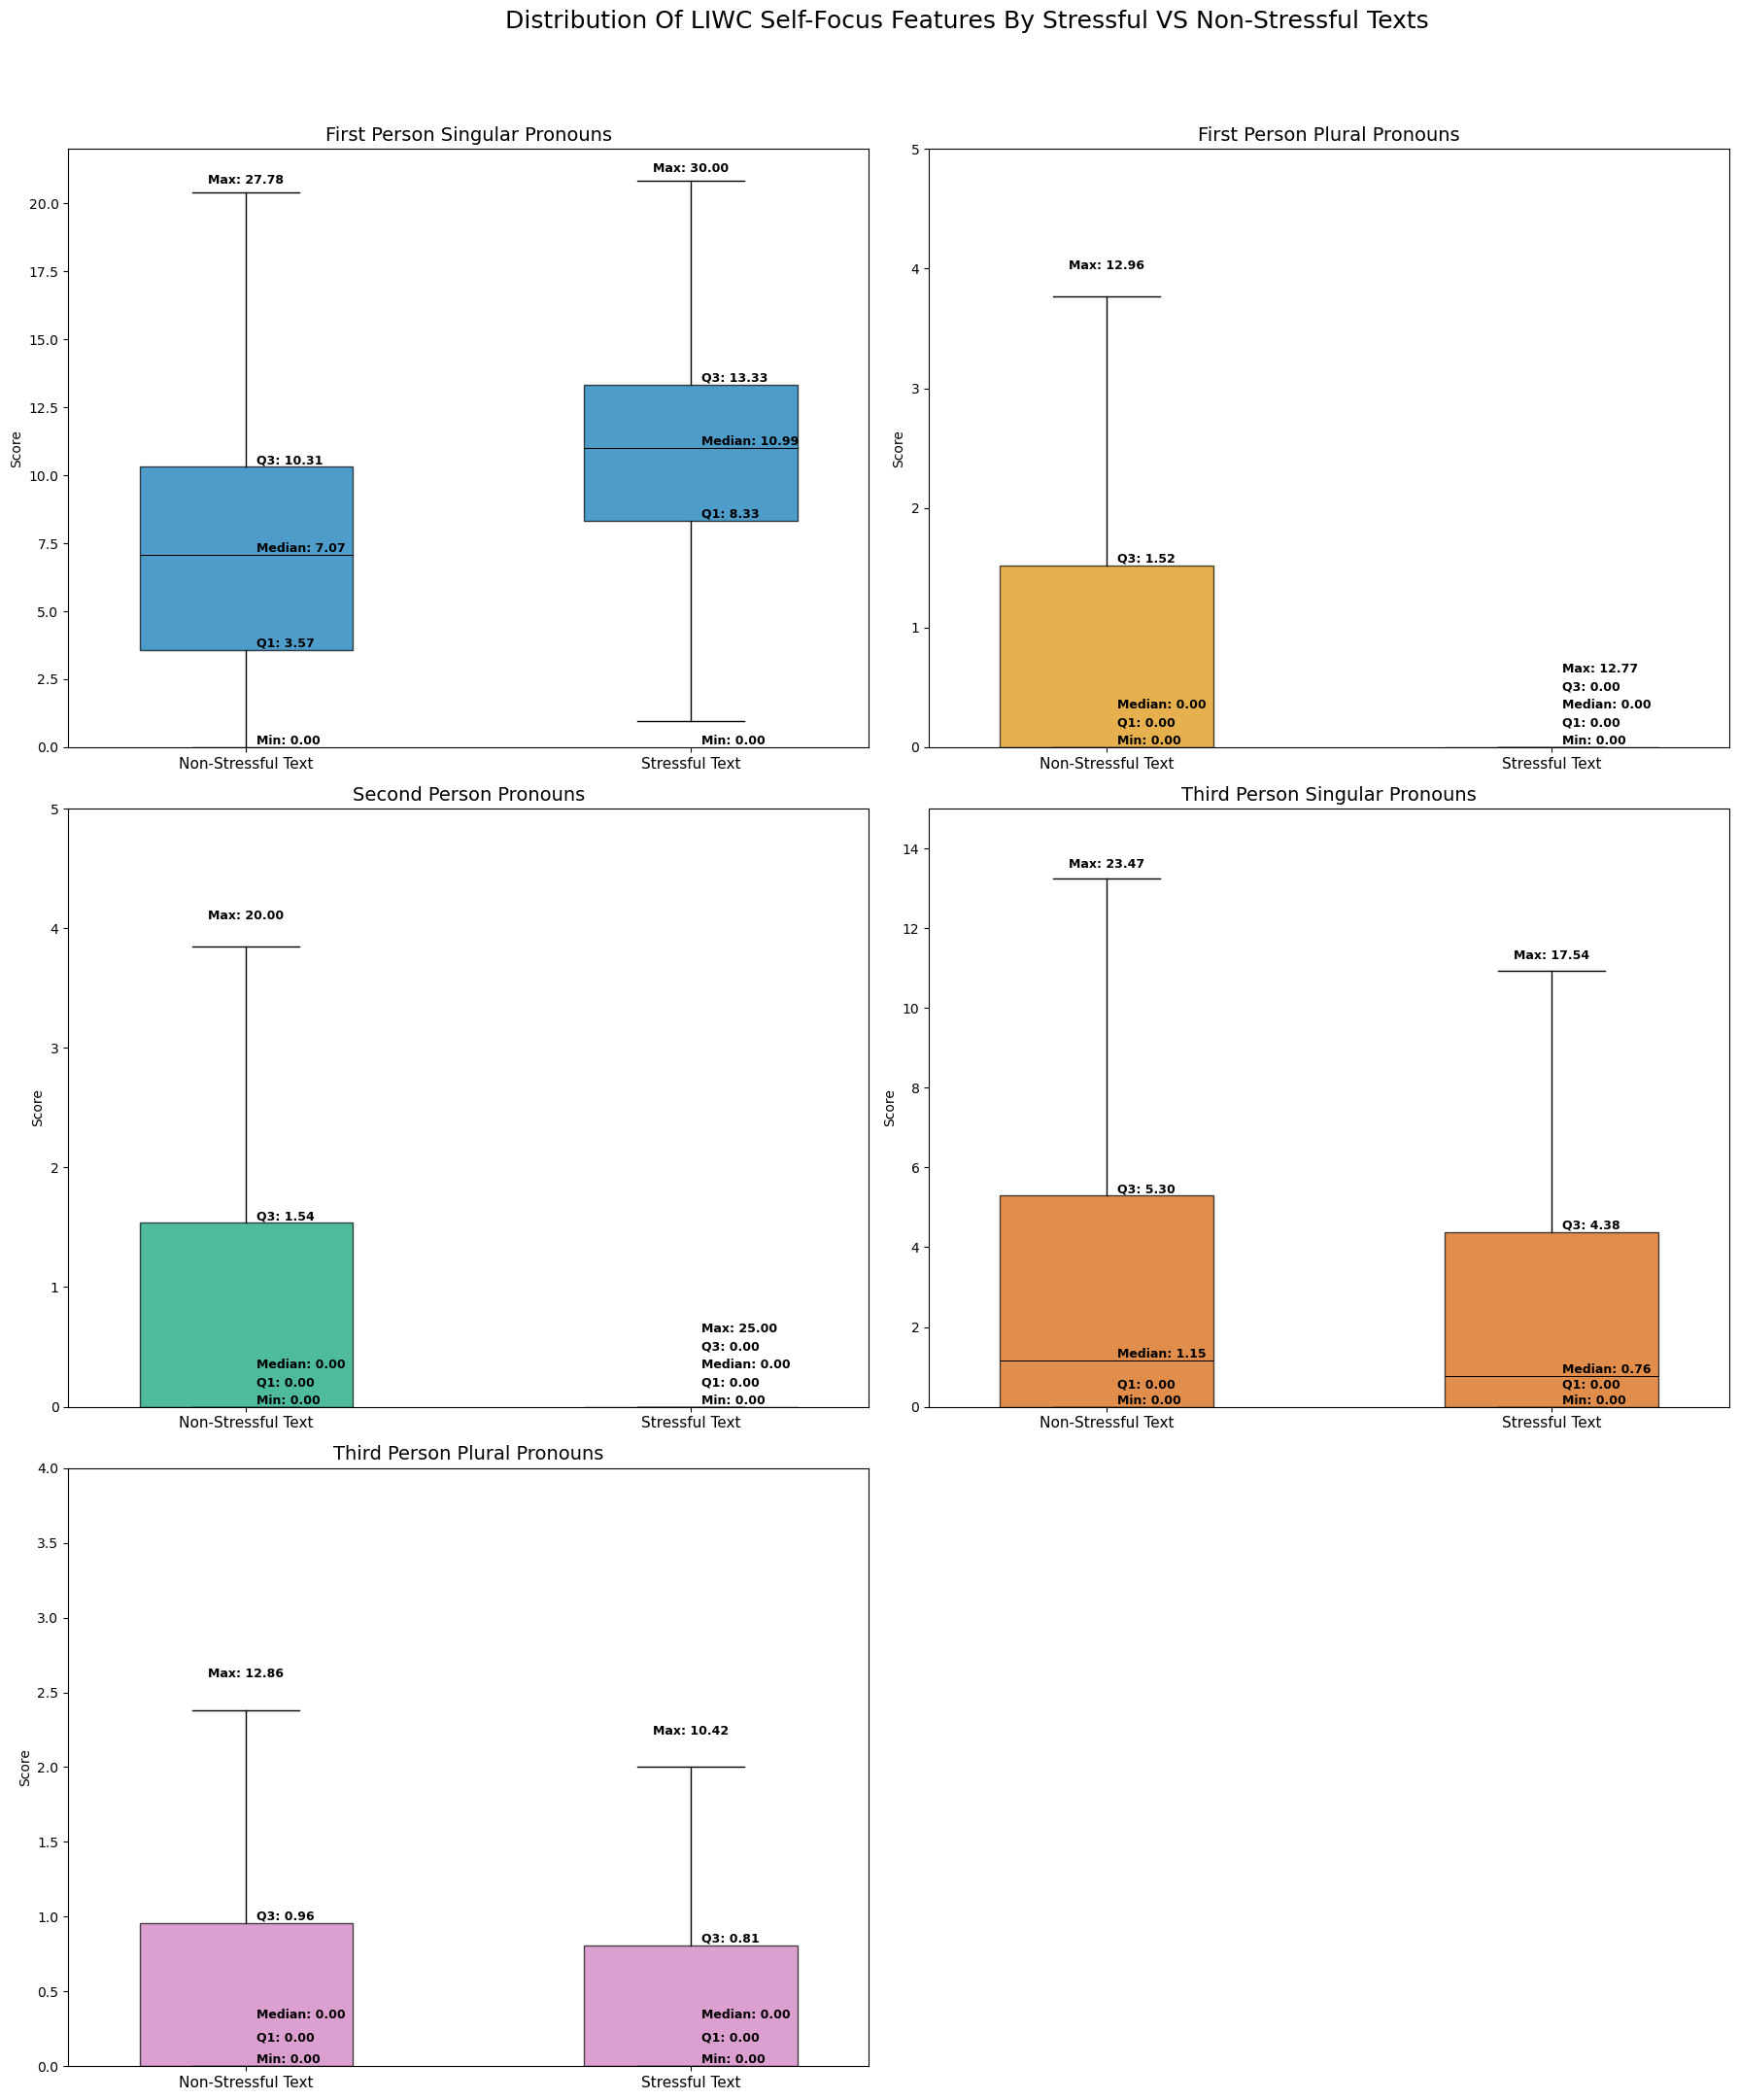

In [591]:
# LIWC Self-Focus / Pronoun Features (already renamed)
self_focus_features = ['First Person Singular Pronouns', 'First Person Plural Pronouns',
                       'Second Person Pronouns', 'Third Person Singular Pronouns',
                       'Third Person Plural Pronouns']
colors = sns.color_palette("colorblind", len(self_focus_features))

fig, axes = plt.subplots(3, 2, figsize=(20, 22))
axes = axes.flatten()

for i, feature in enumerate(self_focus_features):
    ax = axes[i]
    data = [dreaddit_train[dreaddit_train['Label'] == 0][feature].dropna(),
            dreaddit_train[dreaddit_train['Label'] == 1][feature].dropna()]
    positions = [1, 2.25]

    bp = ax.boxplot(data, positions=positions, widths=0.6, patch_artist=True,
                    showfliers=False, medianprops=dict(color="black", linewidth=0.75))

    for patch in bp['boxes']:
        patch.set_facecolor(colors[i])
        patch.set_edgecolor("black")
        patch.set_alpha(0.7)

    whisker_tops = {}
    true_max_vals = {}

    for j, vals in enumerate(data):
        stats = {"Min": np.min(vals), "Q1": np.percentile(vals, 25), "Median": np.median(vals), "Q3": np.percentile(vals, 75)}
        true_max_vals[j] = np.max(vals)

        whisker_val = np.max([w.get_ydata().max() for w in bp['whiskers'] if w.get_xdata().mean() == positions[j]])
        whisker_tops[j] = whisker_val
        stat_order = ["Min", "Q1", "Median", "Q3"]
        value_groups = {}
        for stat in stat_order:
          val = stats[stat]
          value_groups.setdefault(val, []).append(stat)

        # Annotate with stacking if values are identical
        for val, stat_list in value_groups.items():
          for idx, stat_name in enumerate(stat_list):
            offset = 0.15 * idx

            if feature == "Third Person Singular Pronouns":
                if stat_name == "Q1" and stats["Q1"] == stats["Min"]:
                    offset += 0.25
            x_pos = positions[j] + 0.03
            ax.text(x_pos, val + offset, f"{stat_name}: {val:.2f}", ha='left',
                    va='bottom', fontsize=9, color="black", fontweight="bold")

        # If Q3 is 0.00, stack Max above Q3 annotations
        if stats["Q3"] == 0.00:
            stacked_count = len(value_groups.get(0.00, []))
            max_y = stats["Q3"] + (0.15 * stacked_count)
            max_x = positions[j] + 0.03
        else:
            max_y = whisker_tops[j] + 0.2
            max_x = positions[j]

        ax.text(max_x, max_y, f"Max: {true_max_vals[j]:.2f}", ha='left' if stats["Q3"] == 0.00 else 'center',
                va='bottom', fontsize=9, color="black", fontweight="bold")

    ax.set_xticks([1, 2.25])
    ax.set_xticklabels(["Non-Stressful Text", "Stressful Text"], fontsize=11)
    ax.set_title(feature, fontsize=14)
    ax.set_ylabel("Score")
    ax.set_ylim(0, np.ceil(max(whisker_tops.values()) + 1))

axes[-1].axis('off')
fig.suptitle("Distribution Of LIWC Self-Focus Features By Stressful VS Non-Stressful Texts", fontsize=18)
plt.subplots_adjust(hspace=0.5)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

**Key Observations:**

1) **First Person Singular Pronouns** stand out with the highest values overall, showing medians around 7 to 10 and upper quartiles above 10, which indicates that self-referential language (“I,” “me,” “my”) is the most prominent pronoun type in both text categories.

2) In contrast, **First Person Plural**, **Second Person**, and **Third Person Plural Pronouns** all have medians at zero and very low quartiles, suggesting that collective or other-referential pronouns are used far less frequently.

3) **Third Person Singular Pronouns** occupy a middle ground, with non-stressful texts showing a median above 1 and quartiles around 5, while stressful texts are slightly lower. This distribution suggests that self-focus dominates pronoun use, while references to others or groups are comparatively rare.

**Differences between stressful and non-stressful texts:**

Stressful texts consistently show higher values for First Person Singular Pronouns, with a median of 10.19 compared to 7.07 in non-stressful texts, and a higher upper quartile as well. This indicates that stressful texts are more self-focused, reflecting heightened personal involvement or introspection.

First Person Plural and Second Person Pronouns show little difference between categories, with both medians at zero, suggesting that stress does not significantly alter collective or direct-address language. For Third Person Singular and Plural Pronouns, non-stressful texts actually show slightly higher values, implying that references to others may be more common in non-stressful contexts, while stressful texts remain more inwardly focused.

Now, we will explore the correlations between each subcategory within the LIWC group of self-focus features and the label.

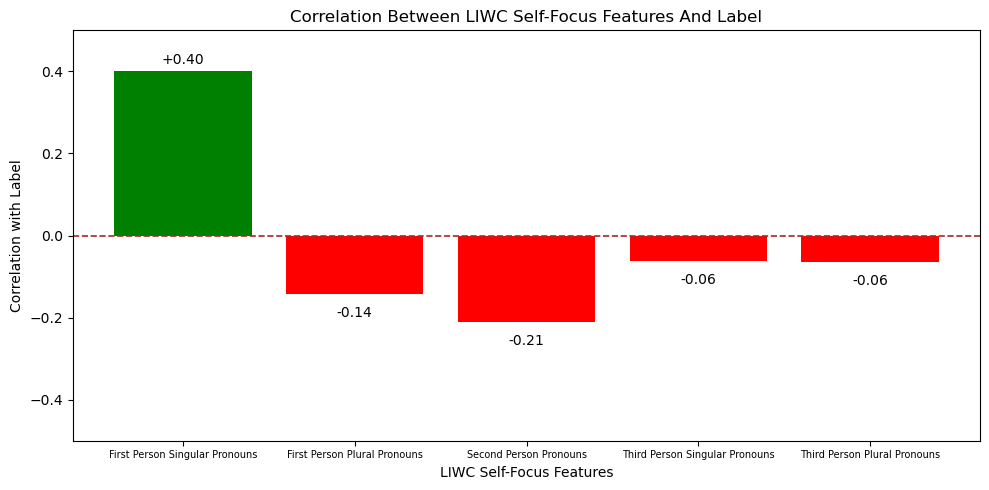

In [593]:
# List of LIWC self-focus / pronoun features
self_focus_features = ['First Person Singular Pronouns', 'First Person Plural Pronouns',
                       'Second Person Pronouns', 'Third Person Singular Pronouns', 'Third Person Plural Pronouns']

# Calculate correlations with the label
correlations = dreaddit_train[self_focus_features + ['Label']].corr()['Label'].drop('Label')
colors = ['green' if val >= 0 else 'red' for val in correlations]

# Create bar chart
plt.figure(figsize=(10, 5))
bars = plt.bar(correlations.index, correlations.values, color=colors)

# Add correlation value labels on top of bars
for bar, val in zip(bars, correlations.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01 if val >= 0 else bar.get_height() - 0.03,
             f"{val:+.2f}", ha='center', va='bottom' if val >= 0 else 'top', fontsize=10)

plt.axhline(0, color='brown', linewidth=1.2, linestyle='--')
plt.xticks(fontsize=7)
plt.ylabel("Correlation with Label")
plt.xlabel("LIWC Self-Focus Features")
plt.title("Correlation Between LIWC Self-Focus Features And Label")
plt.ylim(-0.5, 0.5)
plt.tight_layout()
plt.show()

**Key Observations:**

1) **First Person Singular Pronouns** show the strongest positive correlation (+0.40), indicating that self-referential language (I, Me , My) is highly associated with stressful texts. This suggests that when individuals are stressed, they tend to focus more on themselves and their personal experiences.

2) In contrast, all other pronoun categories: **First Person Plural** (-0.14), **Second Person** (-0.21), **Third Person Singular** (-0.06), and **Third Person Plural** (-0.06) show negative correlations. This means that collective pronouns (we), direct address pronouns (you), and references to others (he, she, they) are less likely to appear in stressful texts compared to non-stressful ones.

3) The strongest negative correlation is for **Second Person Pronouns**, implying that stressful texts are particularly less oriented toward addressing others directly.

**Possible Insights:**

The overall pattern suggests that stressful texts are characterized by heightened self-focus and reduced outward orientation. The moderately-strong positive correlation for First Person Singular Pronouns highlights how stress drives individuals to center their language on themselves, reflecting personal involvement, introspection, or self-concern.

Meanwhile, the negative correlations for plural and other referential pronouns suggest that non-stressful texts are more likely to include collective perspectives or references to others, indicating a broader social orientation. Stressful texts, by contrast, narrow the linguistic focus inward, away from group identity or external relationships.

##### **Visualization 7 Part 4: LIWC Social And Situational Stressors**

Lastly, we will create boxplots to visualize the distribution of LIWC scores across stressful (label = 1) and non-stressful (label = 0) texts for the LIWC Social And Situational Stressors, which include:

* **Social Interactions**
* **Family**
* **Friends**
* **Work**
* **Money**
* **Achievement**
* **Risk**

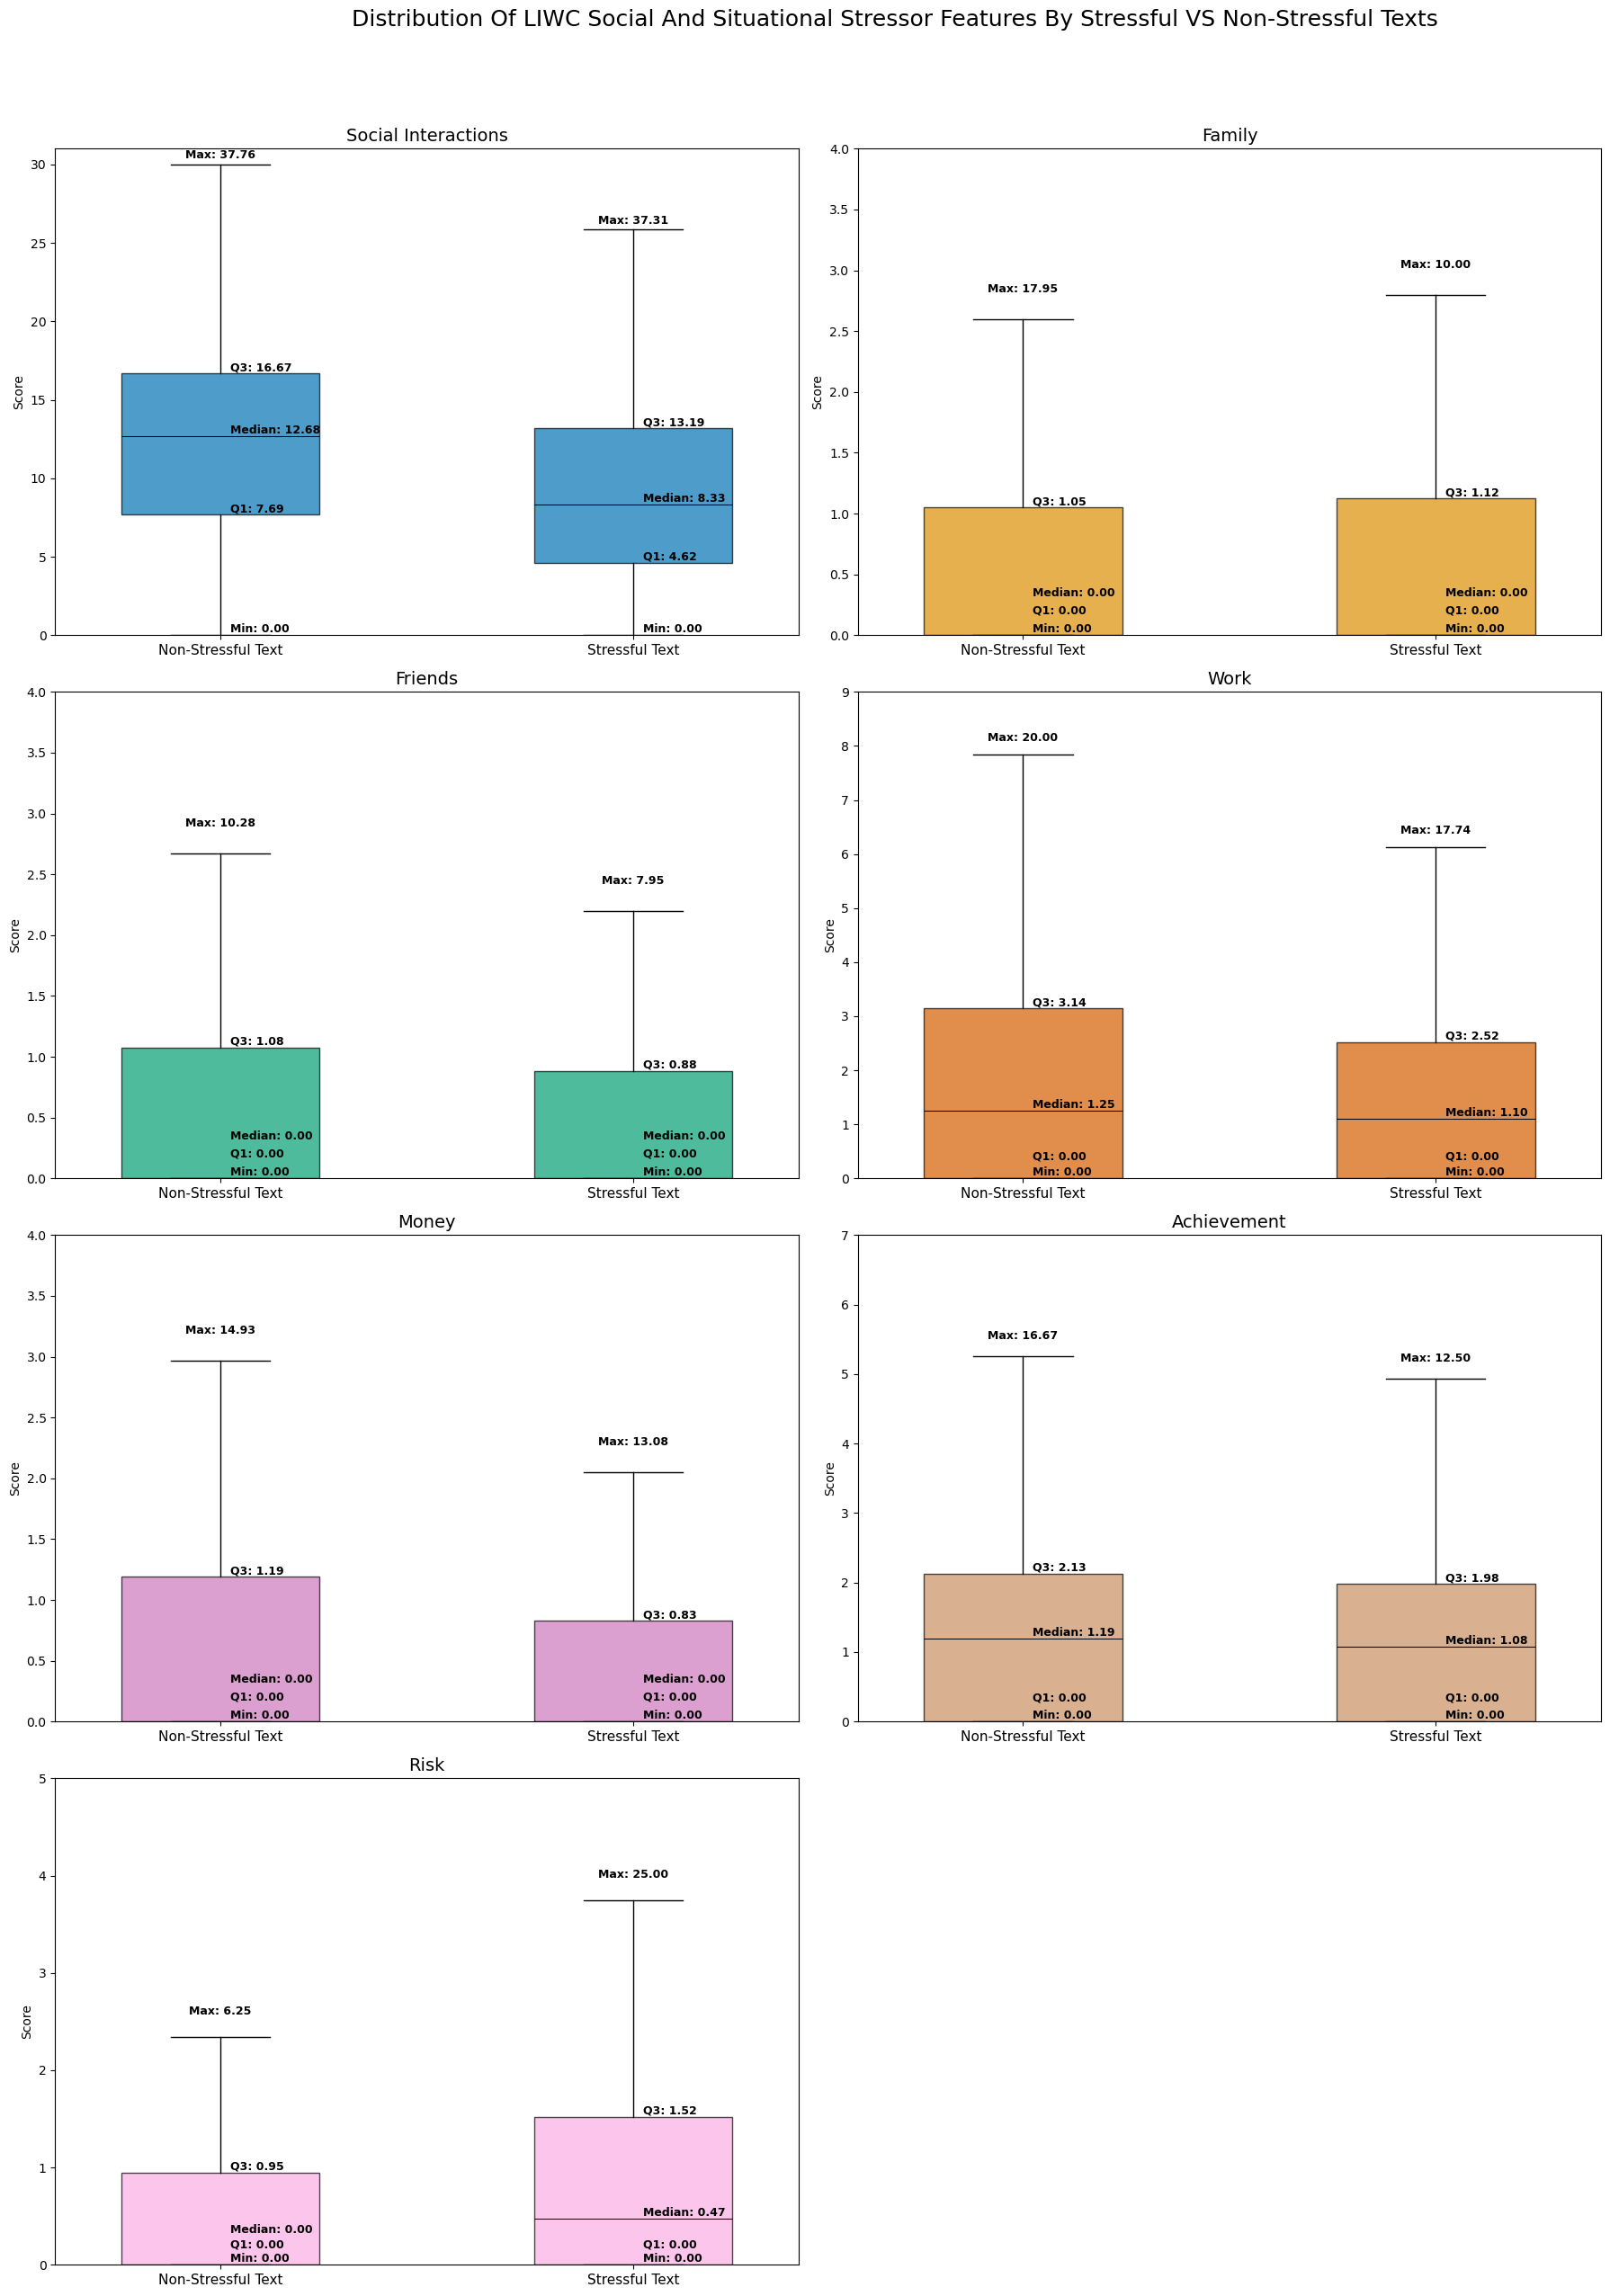

In [595]:
# LIWC Social & Situational Stressor Features (already named as columns)
social_situational_features = ['Social Interactions', 'Family', 'Friends', 'Work',
                               'Money', 'Achievement', 'Risk']
colors = sns.color_palette("colorblind", len(social_situational_features))
fig, axes = plt.subplots(4, 2, figsize=(20, 26))
axes = axes.flatten()

for i, feature in enumerate(social_situational_features):
    ax = axes[i]
    data = [dreaddit_train[dreaddit_train['Label'] == 0][feature].dropna(),
            dreaddit_train[dreaddit_train['Label'] == 1][feature].dropna()]
    positions = [1, 2.25]

    bp = ax.boxplot(data, positions=positions, widths=0.6, patch_artist=True,
                    showfliers=False, medianprops=dict(color="black", linewidth=0.75))

    for patch in bp['boxes']:
        patch.set_facecolor(colors[i])
        patch.set_edgecolor("black")
        patch.set_alpha(0.7)

    whisker_tops = {}
    true_max_vals = {}

    for j, vals in enumerate(data):
        stats = {"Min": np.min(vals), "Q1": np.percentile(vals, 25), "Median": np.median(vals), "Q3": np.percentile(vals, 75)}
        true_max_vals[j] = np.max(vals)
        whisker_val = np.max([w.get_ydata().max() for w in bp['whiskers'] if w.get_xdata().mean() == positions[j]])
        whisker_tops[j] = whisker_val

        stat_order = ["Min", "Q1", "Median", "Q3"]
        value_groups = {}
        for stat in stat_order:
            val = stats[stat]
            value_groups.setdefault(val, []).append(stat)

        # Annotate stats with vertical stacking if identical
        for val, stat_list in value_groups.items():
            for idx, stat_name in enumerate(stat_list):
                offset = 0.15 * idx
                if feature == "Work":
                    if stat_name == "Q1" and stats["Q1"] == stats["Min"]:
                        offset += 0.15
                if feature == "Achievement":
                    if stat_name == "Q1" and stats["Q1"] == stats["Min"]:
                        offset += 0.10
                x_pos = positions[j] + 0.03

                ax.text(x_pos, val + offset, f"{stat_name}: {val:.2f}", ha='left',
                        va='bottom', fontsize=9, color="black", fontweight="bold")

        # If Q3 is 0.00, stack Max above Q3 annotations
        if stats["Q3"] == 0.00:
            stacked_count = len(value_groups.get(0.00, []))
            max_y = stats["Q3"] + (0.15 * stacked_count)
            max_x = positions[j] + 0.03
            ha = 'left'
        else:
            max_y = whisker_tops[j] + 0.2
            max_x = positions[j]
            ha = 'center'

        ax.text(max_x, max_y, f"Max: {true_max_vals[j]:.2f}", ha=ha, va='bottom',
                fontsize=9, color="black", fontweight="bold")

    ax.set_xticks([1, 2.25])
    ax.set_xticklabels(["Non-Stressful Text", "Stressful Text"], fontsize=11)
    ax.set_title(feature, fontsize=14)
    ax.set_ylabel("Score")
    ax.set_ylim(0, np.ceil(max(whisker_tops.values()) + 1))

for k in range(len(social_situational_features), len(axes)):
    axes[k].axis('off')
fig.suptitle("Distribution Of LIWC Social And Situational Stressor Features By Stressful VS Non-Stressful Texts", fontsize=18)
plt.subplots_adjust(hspace=0.5)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

**Key Observations:**

1) **Social Interactions** dominate the distributions, with medians around 8-13 and upper quartiles reaching 16-17, far higher than any other category. This suggests that interpersonal dynamics are the most linguistically salient domain across both stressful and non-stressful texts.

2) **Work** and **Achievement** also show moderate values, with medians around 1-1.2 and quartiles near 2-3, indicating that professional and goal-related contexts are regularly mentioned.

3) **Family**, **Friends**, **Money**, and **Risk** generally have much lower medians (often zero), reflecting that these domains are less consistently present in texts. Risk is particularly interesting, as while its median remains near zero, stressful texts show a much higher maximum (25.00 compared to 6.25), suggesting occasional spikes in risk-related language under stress.

**Differences between stressful and non-stressful texts:**

Non-stressful texts consistently show higher values in Social Interactions, with a median of 12.68 compared to 8.33 in stressful texts, implying that non-stressful contexts may involve richer descriptions of social engagement.

Stressful texts, however, show slightly elevated values in Family and Risk, with higher quartiles and maxima, suggesting that stress is more often tied to family concerns and perceived risks.

Work and Achievement show only minor differences, with non-stressful texts slightly higher, indicating that professional and goal-related language is not strongly differentiated by stress. Money and Friends are low in both categories, but non-stressful texts again show slightly higher quartiles, hinting that financial and friendship references are more common in non-stressful contexts.

Now, we will explore the correlations between each subcategory within the LIWC group of social and situational stressors and the label.



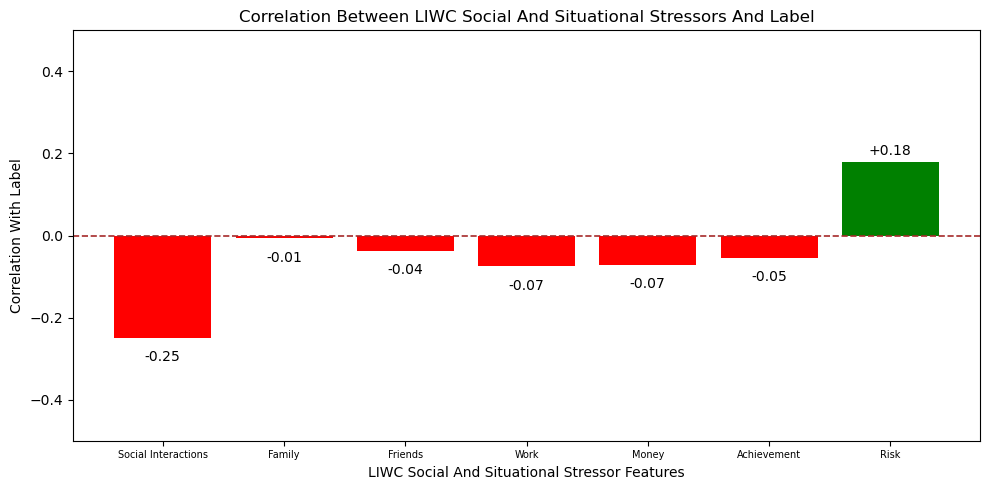

In [597]:
# List of LIWC social & situational stressor features
social_stressor_features = ['Social Interactions', 'Family', 'Friends', 'Work',
                            'Money', 'Achievement', 'Risk']

# Calculate correlations with the label
correlations = dreaddit_train[social_stressor_features + ['Label']].corr()['Label'].drop('Label')
colors = ['green' if val >= 0 else 'red' for val in correlations]

plt.figure(figsize=(10, 5))
bars = plt.bar(correlations.index, correlations.values, color=colors)

# Add correlation value labels on top of bars
for bar, val in zip(bars, correlations.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01 if val >= 0 else bar.get_height() - 0.03,
             f"{val:+.2f}", ha='center', va='bottom' if val >= 0 else 'top', fontsize=10)

plt.axhline(0, color='brown', linewidth=1.2, linestyle='--')
plt.xticks(fontsize=7)
plt.ylabel("Correlation With Label")
plt.xlabel("LIWC Social And Situational Stressor Features")
plt.title("Correlation Between LIWC Social And Situational Stressors And Label")
plt.ylim(-0.5, 0.5)
plt.tight_layout()
plt.show()

**Key References:**

1) **Social Interactions** show the strongest negative correlation (-0.25), indicating that texts rich in social engagement language are more likely to be non-stressful. This suggests that references to socializing, relationships, or general interaction tend to align with calmer contexts.

2) **Family**, **Friends**, **Work**, **Money**, and **Achievement** all display weak negative correlations (between -0.01 and -0.07), meaning they are slightly more common in non-stressful texts but not strongly predictive.

3) **Risk** stands out as the only feature with a positive correlation (+0.18), showing that language related to danger, uncertainty, or exposure is more strongly associated with stressful texts.

**Possible Insights:**

The overall pattern suggests that non-stressful texts emphasize social and situational domains such as interactions, work, and achievement, albeit modestly. Stressful texts, on the other hand, are distinguished by their stronger association with risk-related language.

This makes sense conceptually: stress often arises when individuals perceive threats or uncertainties, and this is reflected linguistically through references to risk. Meanwhile, the negative correlation for social interactions implies that engaging with others or describing social contexts may act as a buffer against stress, or at least be more characteristic of non-stressful narratives.

Stressful texts are marked by heightened references to risk, while non-stressful texts lean toward social engagement and everyday domains like work or achievement. This highlights how stress shifts linguistic focus away from social connectedness and toward perceived threats or vulnerabilities.

##### **Visualization 7 Part 5: LIWC Psychological Style And Social Expression**

Next, we will create boxplots to visualize the distribution of LIWC scores across stressful (label = 1) and non-stressful (label = 0) texts for the LIWC Psychological Style And Social Expression Features, which include:

* **Social Confidence**
* **Authenticity**
* **Tone**

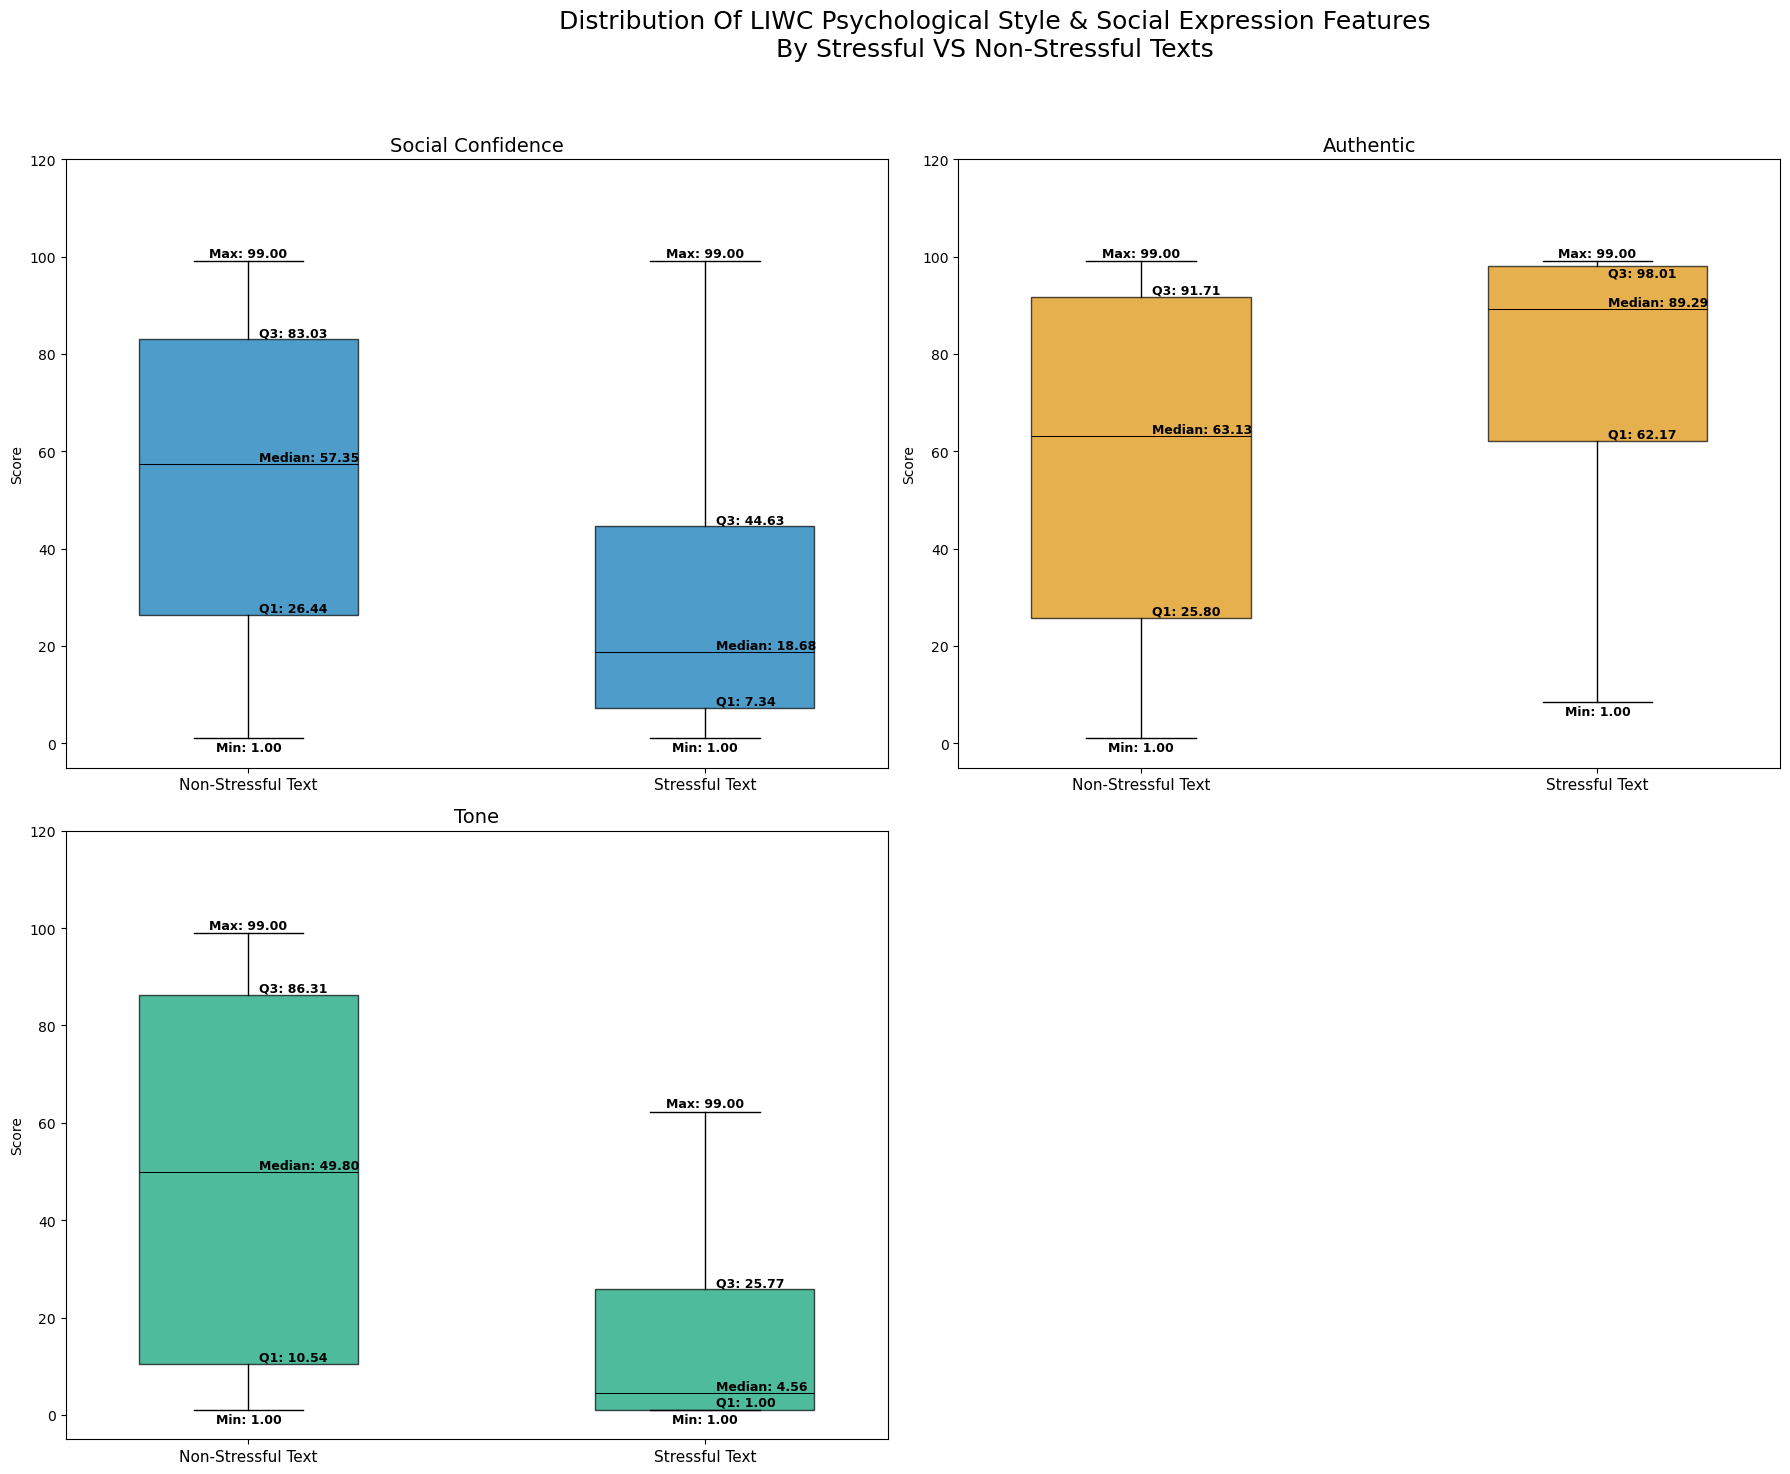

In [599]:
# LIWC Psychological Style & Social Expression Features
psych_style_features = ['Social Confidence', 'Authentic', 'Tone']
colors = sns.color_palette("colorblind", len(psych_style_features))

fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.flatten()

for i, feature in enumerate(psych_style_features):
    ax = axes[i]
    data = [dreaddit_train[dreaddit_train['Label'] == 0][feature].dropna(),
            dreaddit_train[dreaddit_train['Label'] == 1][feature].dropna()]
    positions = [1, 2.25]

    bp = ax.boxplot(data, positions=positions, widths=0.6, patch_artist=True,
                    showfliers=False, medianprops=dict(color="black", linewidth=0.75))

    for patch in bp['boxes']:
        patch.set_facecolor(colors[i])
        patch.set_edgecolor("black")
        patch.set_alpha(0.7)

    whisker_tops = {}
    whisker_bottoms = {}
    true_max_vals = {}

    for j, vals in enumerate(data):
        stats = {"Min": np.min(vals), "Q1": np.percentile(vals, 25), "Median": np.median(vals), "Q3": np.percentile(vals, 75)}
        true_max_vals[j] = np.max(vals)
        whiskers = [ w for w in bp['whiskers'] if w.get_xdata().mean() == positions[j]]
        whisker_tops[j] = max(w.get_ydata().max() for w in whiskers)
        whisker_bottoms[j] = min(w.get_ydata().min() for w in whiskers)

        stat_order = ["Min", "Q1", "Median", "Q3"]
        value_groups = {}
        for stat in stat_order:
            value_groups.setdefault(stats[stat], []).append(stat)

        for val, stat_list in value_groups.items():
            for idx, stat_name in enumerate(stat_list):
                offset = 0.15 * idx
                x_pos = positions[j] + 0.03

                if stat_name == "Min":
                    ax.text(positions[j], whisker_bottoms[j] - 0.5, f"Min: {val:.2f}",
                            ha='center', va='top', fontsize=9, color="black", fontweight="bold")
                    continue

                if feature == "Authentic" and j == 1 and stat_name == "Q3":
                    offset -= 2.7

                if feature == "Tone" and j == 1:
                    if stats["Min"] == stats["Q1"] == 1.00:
                        if stat_name == "Q1":
                            offset += 0.15

                ax.text(x_pos, val + offset, f"{stat_name}: {val:.2f}", ha='left',
                        va='bottom', fontsize=9, color="black", fontweight="bold")

        if stats["Q3"] == 0.00:
            stacked_count = len(value_groups.get(0.00, []))
            max_y = stats["Q3"] + (0.15 * stacked_count)
            max_x = positions[j] + 0.03
            ha = 'left'
        else:
            max_y = whisker_tops[j] + 0.3
            max_x = positions[j]
            ha = 'center'

        ax.text(max_x, max_y, f"Max: {true_max_vals[j]:.2f}", ha=ha,
                va='bottom', fontsize=9, color="black", fontweight="bold")

    ax.set_xticks([1, 2.25])
    ax.set_xticklabels(["Non-Stressful Text", "Stressful Text"], fontsize=11)
    ax.set_title(feature, fontsize=14)
    ax.set_ylabel("Score")
    ax.set_ylim(-5, 120)

for k in range(len(psych_style_features), len(axes)):
    axes[k].axis('off')

fig.suptitle("Distribution Of LIWC Psychological Style & Social Expression Features\nBy Stressful VS Non-Stressful Texts",
             fontsize=18)
plt.subplots_adjust(hspace=0.5)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

**Key Observations:**

1) **Social Confidence** and **Tone** show the widest separation between the two text types. Non-stressful texts have much higher medians (57.35 for Social Confidence and 49.80 for Tone) compared to stressful texts (18.68 and 4.56 respectively). This suggests that non-stressful texts are characterized by more confident and positive language, while stressful texts lean toward uncertainty and negativity.

2) **Authenticity** shows the opposite pattern: stressful texts have a much higher median (89.22) compared to non-stressful texts (63.13). This indicates that stressful texts are more likely to use language perceived as genuine or self-disclosing, whereas non-stressful texts balance authenticity with more socially polished expression.

**Differences between stressful and non-stressful texts:**

Non-stressful texts consistently demonstrate higher values in Social Confidence and Tone, reflecting a more positive, assured and socially engaging style. Stressful texts in contrast show lower confidence and tone scores, aligning with the idea that stress reduces positivity and increases linguistic markers of insecurity.

The sharp rise in Authenticity for stressful texts suggests that individuals under stress may express themselves in a more raw, unfiltered manner, prioritizing honesty over social presentation. This divergence between authenticity and confidence highlights a key psychological dynamic: stress fosters genuine self-expression but diminishes positivity and social assurance.

Now, we will explore the correlations between each subcategory within the LIWC Psychological Style & Social Expression Features and the label.

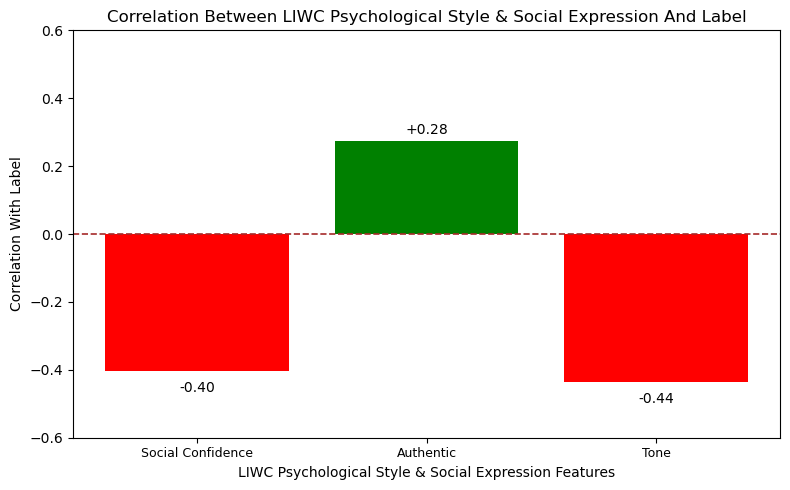

In [601]:
# LIWC Psychological Style & Social Expression features
psych_style_features = ['Social Confidence', 'Authentic', 'Tone']

# Calculate correlations with the label
correlations = dreaddit_train[psych_style_features + ['Label']].corr()['Label'].drop('Label')
colors = ['green' if val >= 0 else 'red' for val in correlations]

plt.figure(figsize=(8, 5))
bars = plt.bar(correlations.index, correlations.values, color=colors)

# Add correlation value labels
for bar, val in zip(bars, correlations.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01 if val >= 0 else bar.get_height() - 0.03,
             f"{val:+.2f}", ha='center', va='bottom' if val >= 0 else 'top', fontsize=10)

plt.axhline(0, color='brown', linewidth=1.2, linestyle='--')
plt.xticks(fontsize=9)
plt.ylabel("Correlation With Label")
plt.xlabel("LIWC Psychological Style & Social Expression Features")
plt.title("Correlation Between LIWC Psychological Style & Social Expression And Label")
plt.ylim(-0.6, 0.6)

plt.tight_layout()
plt.show()

**Key Observations:**

1) **Tone** shows the strongest negative correlation (-0.44), meaning that texts with more positive or upbeat tone are much less likely to be stressful.

2) **Social Confidence** follows closely with another strong negative correlation (-0.40), suggesting that confident, assured language is also more characteristic of non-stressful texts.

3) In contrast, **Authenticity** stands out with a positive correlation (+0.28), indicating that stressful texts are more likely to contain language perceived as genuine, raw, or self-disclosing.

**Possible Insights:**

Non-stressful texts are marked by higher confidence and more positive tone, reflecting a socially polished and optimistic style. Stressful texts, however, show the opposite pattern: lower confidence and tone scores but higher authenticity.

This suggests that under stress, individuals may abandon socially polished language and instead express themselves in a more direct, unfiltered way. The negative correlations for confidence and tone highlight how stress diminishes social assurance and positivity, while the positive correlation for authenticity reveals that stress fosters genuine self-expression.

Stressful texts are characterized by authenticity but lack confidence and positivity, while non-stressful texts emphasize social assurance and optimistic tone. This pattern illustrates how stress influences not only emotional language but also the broader psychological style of communication, shifting expression from polished and positive toward raw and sincere.

##### **Visualization 7 Part 6: DAL Semantic-Emotional Content**

Lastly, we will create boxplots to visualize the distribution of LIWC scores across stressful (label = 1) and non-stressful (label = 0) texts for the DAL Semantic-Emotional Content, which include:

* **Emotional Activation**
* **Mental Imagery**
* **Emotional Valence**

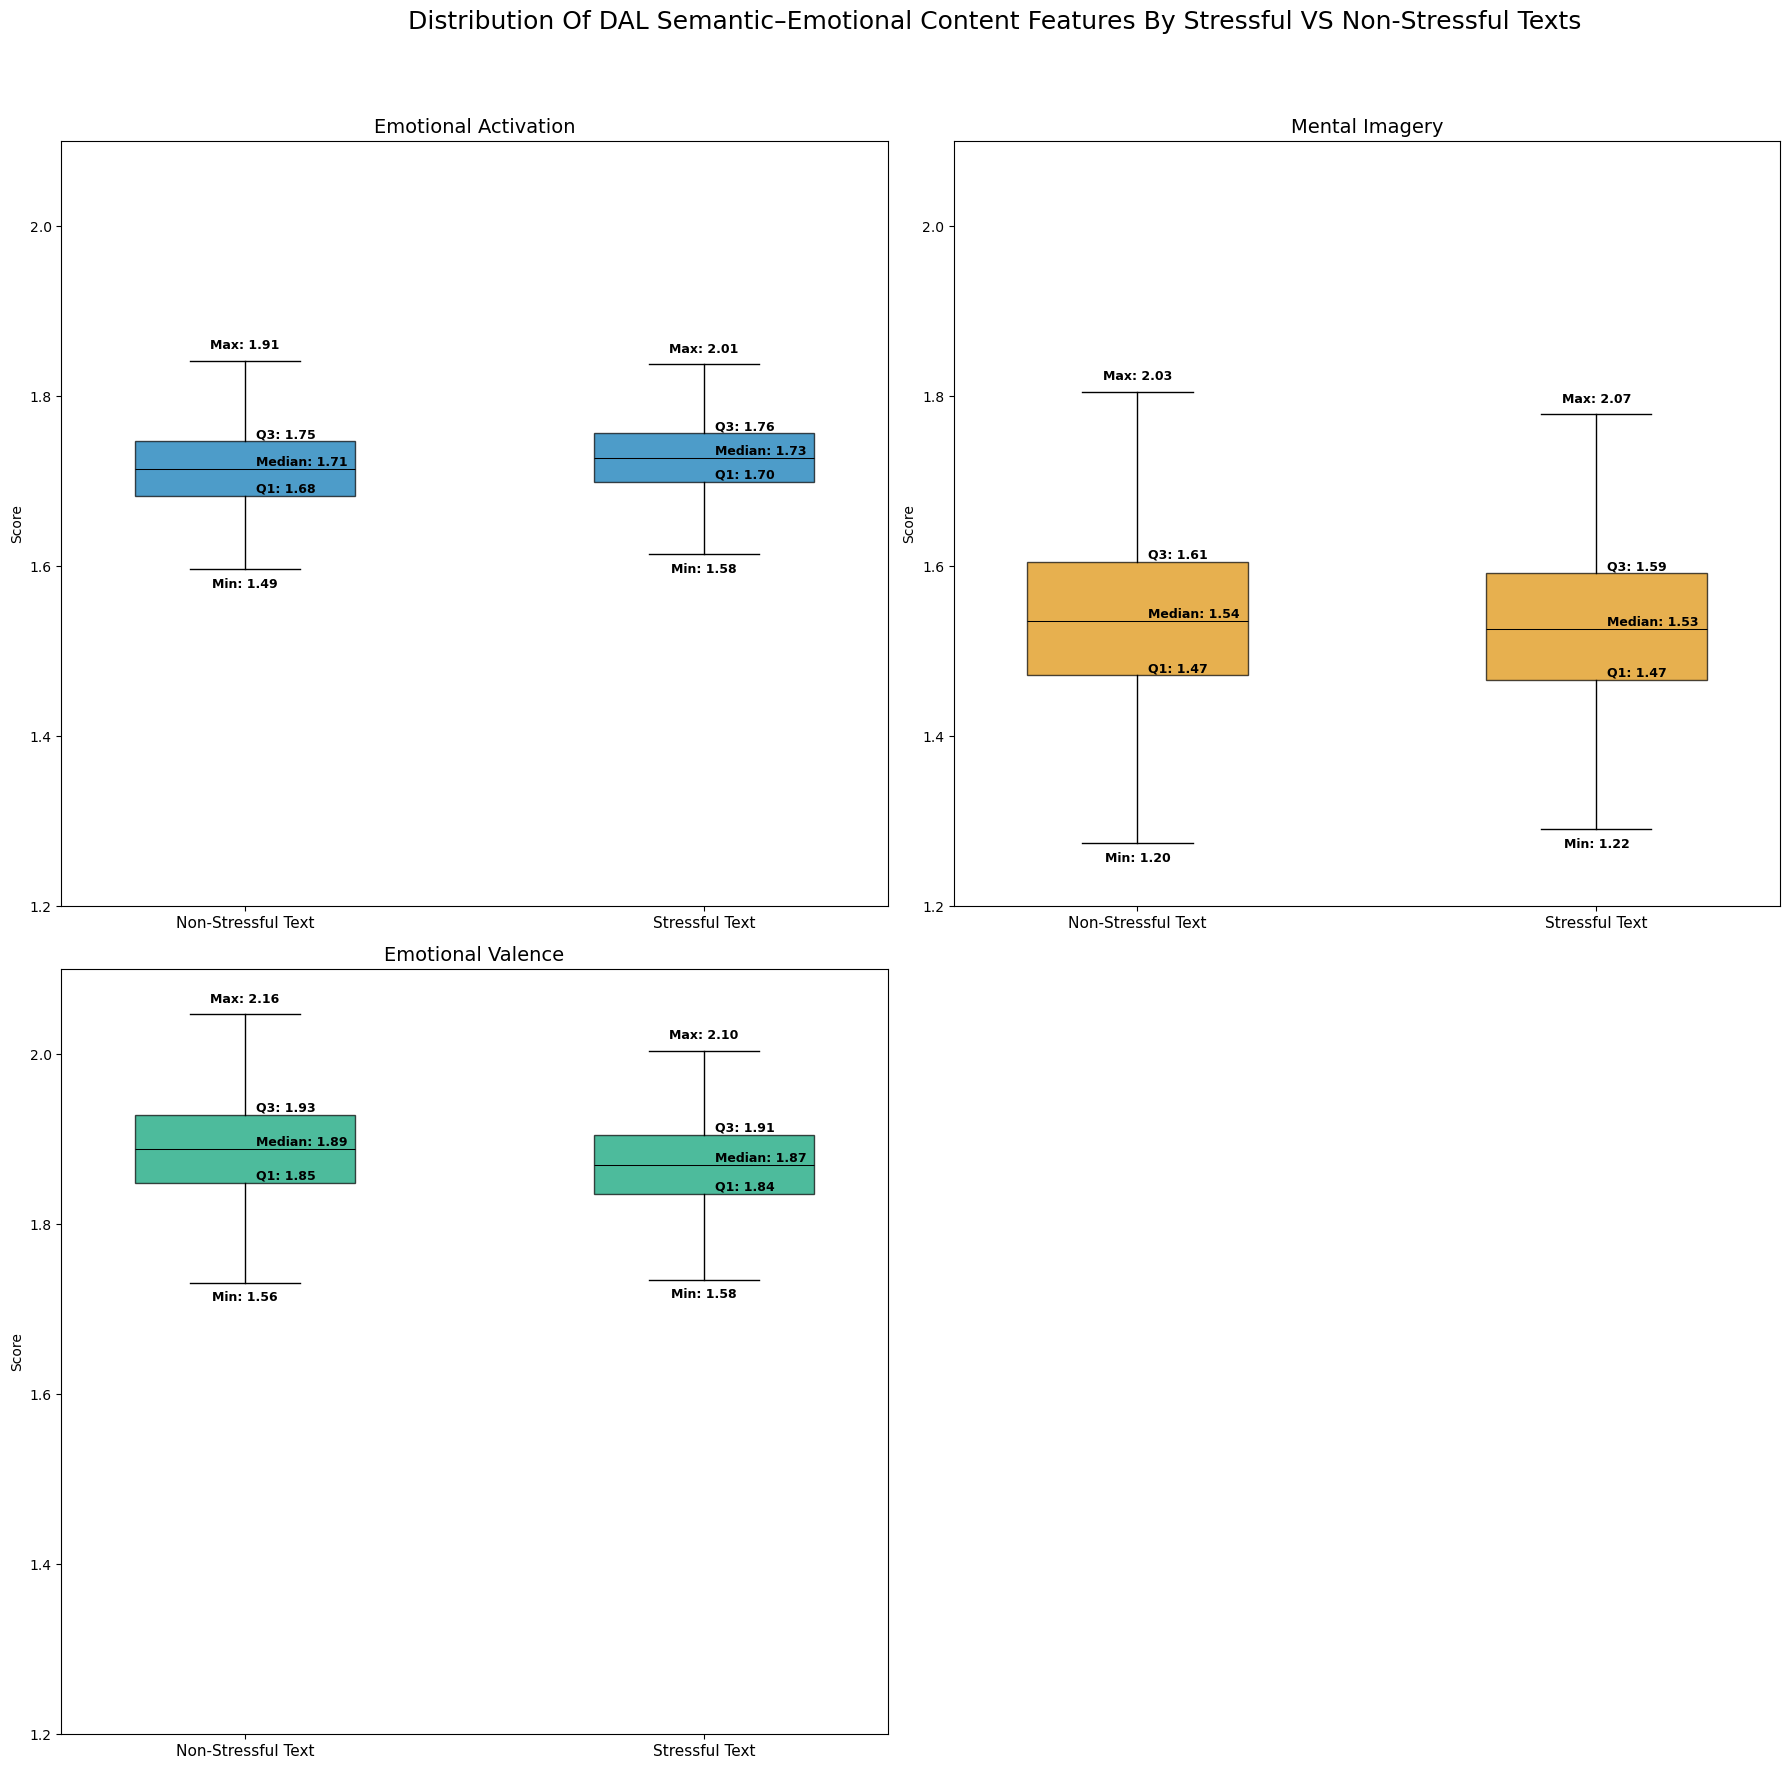

In [603]:
# DAL Semantic–Emotional Content Features
dal_features = ['Emotional Activation', 'Mental Imagery', 'Emotional Valence']
colors = sns.color_palette("colorblind", len(dal_features))

fig, axes = plt.subplots(2, 2, figsize=(20, 18))
axes = axes.flatten()

for i, feature in enumerate(dal_features):
    ax = axes[i]
    data = [dreaddit_train[dreaddit_train['Label'] == 0][feature].dropna(),
            dreaddit_train[dreaddit_train['Label'] == 1][feature].dropna()]
    positions = [1, 2.25]

    bp = ax.boxplot(data, positions=positions, widths=0.6, patch_artist=True,
                    showfliers=False, medianprops=dict(color="black", linewidth=0.75))

    for patch in bp['boxes']:
        patch.set_facecolor(colors[i])
        patch.set_edgecolor("black")
        patch.set_alpha(0.7)

    whisker_tops = {}
    whisker_bottoms = {}
    true_max_vals = {}

    for j, vals in enumerate(data):
        stats = {"Min": np.min(vals), "Q1": np.percentile(vals, 25), "Median": np.median(vals), "Q3": np.percentile(vals, 75)}
        true_max_vals[j] = np.max(vals)

        whisker_vals = [w.get_ydata() for w in bp['whiskers'] if w.get_xdata().mean() == positions[j]]
        whisker_tops[j] = np.max([w.max() for w in whisker_vals])
        whisker_bottoms[j] = np.min([w.min() for w in whisker_vals])

        stat_order = ["Q1", "Median", "Q3"]
        value_groups = {}
        for stat in stat_order:
            val = stats[stat]
            value_groups.setdefault(val, []).append(stat)

        for val, stat_list in value_groups.items():
            for idx, stat_name in enumerate(stat_list):
                offset = 0.15 * idx
                x_pos = positions[j] + 0.03
                ax.text(x_pos, val + offset, f"{stat_name}: {val:.2f}", ha='left',
                        va='bottom', fontsize=9, color="black", fontweight="bold")

        ax.text(positions[j], whisker_bottoms[j] - 0.01, f"Min: {stats['Min']:.2f}",
                ha='center', va='top', fontsize=9, color="black", fontweight="bold")

        ax.text(positions[j], whisker_tops[j] + 0.01, f"Max: {true_max_vals[j]:.2f}",
                ha='center', va='bottom', fontsize=9, color="black", fontweight="bold")

    ax.set_xticks([1, 2.25])
    ax.set_xticklabels(["Non-Stressful Text", "Stressful Text"], fontsize=11)
    ax.set_title(feature, fontsize=14)
    ax.set_ylabel("Score")
    ax.set_ylim(1.2, 2.1)

for k in range(len(dal_features), len(axes)):
    axes[k].axis('off')

fig.suptitle("Distribution Of DAL Semantic–Emotional Content Features By Stressful VS Non-Stressful Texts", fontsize=18)
plt.subplots_adjust(hspace=0.5)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

**Key Observations:**

1) For **Emotional Activation** the medians score is around 1.71 to 1.73 and upper quartiles near 1.75-1.76, suggesting that both stressful and non-stressful texts are consistently marked by moderate emotional arousal.

2) **Mental Imagery** has median score of around 1.53 to 1.54 and quartiles near 1.59 to 1.61, indicating that descriptive, image-evoking language is moderately present in both categories.

3) **Emotional Valence** is slightly higher than the other two features, with medians around 1.87 to 1.89 and quartiles near 1.91 to 1.93, reflecting a tendency toward more positive or pleasant emotional tone overall. The ranges across all three features are relatively narrow, showing that these semantic-emotional dimensions are fairly stable across texts.

**Differences between stressful and non-stressful texts:**

Stressful texts show slightly higher Emotional Activation, with a median of 1.73 compared to 1.71 in non-stressful texts, suggesting that stress is associated with marginally more emotionally charged language. Mental Imagery is nearly identical between the two categories, indicating that stress does not significantly alter the use of descriptive or image-based language.

Emotional Valence, however, is slightly lower in stressful texts (median 1.87 vs. 1.89), suggesting that stressful texts lean toward less positive emotional tone compared to non-stressful ones. While the differences are small, they align with expectations: stress heightens emotional intensity but reduces positivity.

Now, we will explore the correlations between each subcategory within the DAL Semantic-Emotional Content  the label.




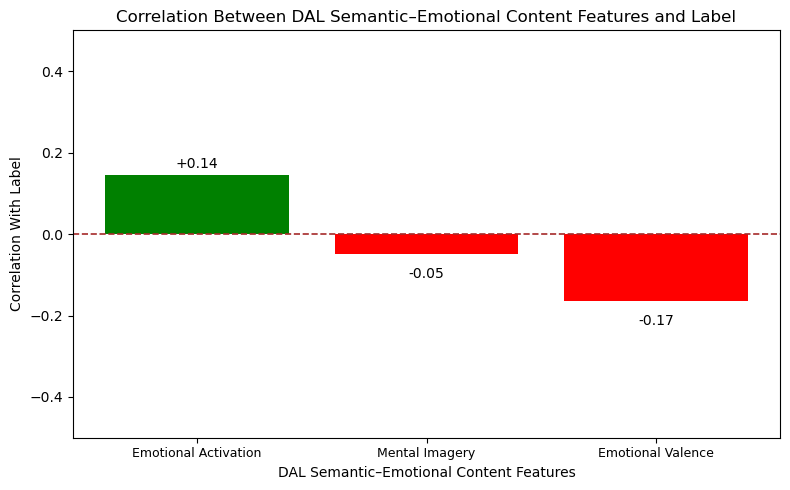

In [605]:
# DAL Semantic–Emotional Content features
dal_features = ['Emotional Activation', 'Mental Imagery', 'Emotional Valence']

# Calculate correlations with the label
correlations = dreaddit_train[dal_features + ['Label']].corr()['Label'].drop('Label')
colors = ['green' if val >= 0 else 'red' for val in correlations]

plt.figure(figsize=(8, 5))
bars = plt.bar(correlations.index, correlations.values, color=colors)

# Add correlation value labels
for bar, val in zip(bars, correlations.values):
    y_pos = bar.get_height() + 0.01 if val >= 0 else bar.get_height() - 0.03
    plt.text(bar.get_x() + bar.get_width() / 2, y_pos, f"{val:+.2f}",
             ha='center', va='bottom' if val >= 0 else 'top', fontsize=10)

plt.axhline(0, color='brown', linewidth=1.2, linestyle='--')
plt.xticks(fontsize=9)
plt.ylabel("Correlation With Label")
plt.xlabel("DAL Semantic–Emotional Content Features")
plt.title("Correlation Between DAL Semantic–Emotional Content Features and Label")
plt.ylim(-0.5, 0.5)
plt.tight_layout()
plt.show()

**Key Observations:**

1) **Emotional Activation** shows a positive correlation (+0.14), suggesting that texts with slightly higher emotional intensity are more likely to be stressful.

2) **Mental Imagery**, however, has a weak negative correlation (-0.05), indicating that descriptive, image-evoking language is slightly more common in non-stressful texts.

3) **Emotional Valence** stands out with a stronger negative correlation (-0.17), meaning that texts with more positive emotional tone are less likely to be stressful.

**Possible Insights:**

Stressful texts are characterized by greater emotional activation, reflecting more charged or intense language. At the same time, they show lower emotional valence, aligning with the idea that stress reduces positivity and shifts language toward a more negative or neutral tone. The slight negative correlation for mental imagery suggests that non-stressful texts may include richer descriptive detail, while stressful texts focus more on emotional intensity rather than vivid imagery.

Stressful texts lean toward heightened emotional arousal and reduced positivity, while non-stressful texts balance emotional tone with more descriptive imagery. This pattern underlines how stress influences not just the emotional charge of language but also its richness and positivity.

##### **Visualization 7 Part 7: Visualizing Factors With Strongest Positive And Negative Correlations**

The purpose of this visualization is to identify which linguistic and psychological features are most strongly associated with stress in the Dreaddit dataset. By isolating features with the strongest positive correlations, we can determine which factors increase the likelihood of a text being classified as stressful. Conversely, features with the strongest negative correlations highlight those most associated with non-stressful text. This comparison allows researchers to quickly focus on the most informative features, facilitating targeted analysis, intervention or feature selection for downstream modeling tasks.

The plot is a side-by-side horizontal bar chart displaying the features with the strongest positive and negative correlations with the stress label. The left panel shows features whose higher values are associated with stressful texts (positive correlations), while the right panel shows features whose higher values are associated with non-stressful texts (negative correlations). By examining the length and color intensity of each bar, one can quickly identify which features are most influential. Longer bars indicate stronger correlations, and darker colors represent stronger effect sizes, allowing for visual prioritization of key factors for further analysis or modeling.

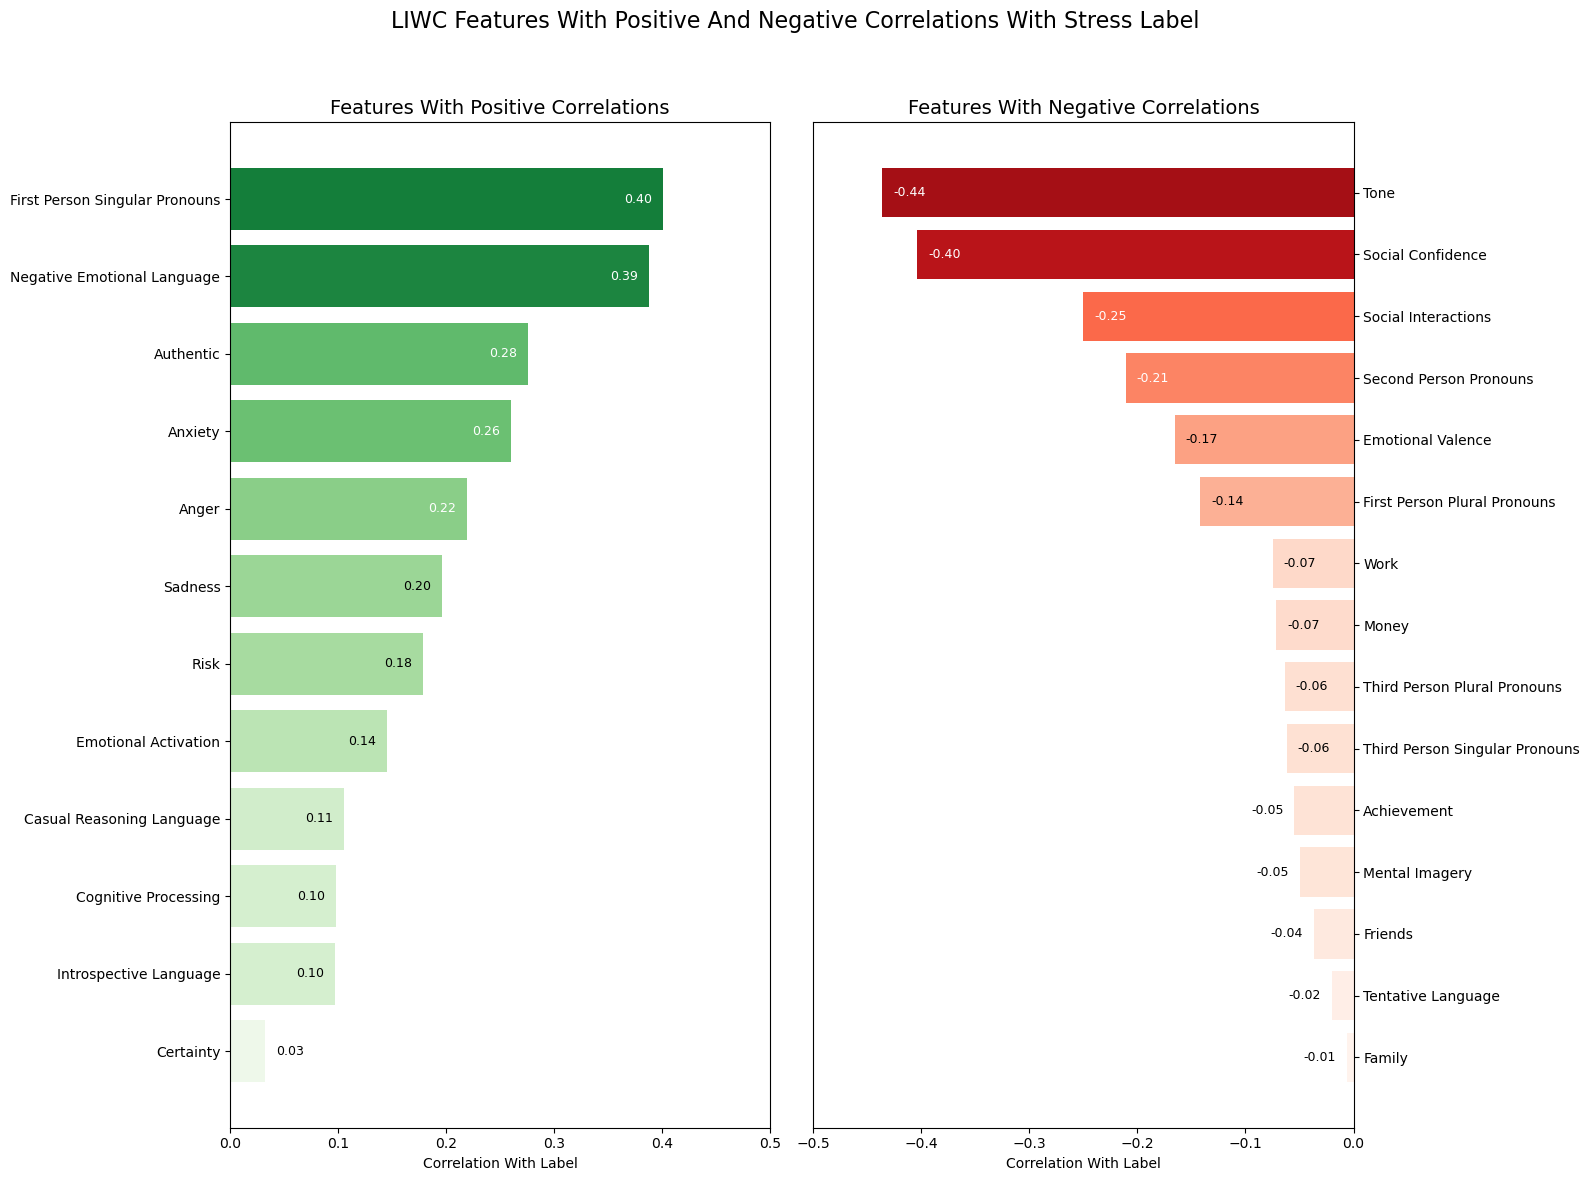

In [608]:
# Combine all relevant LIWC features (affective, cognitive, self-focus, social stressors)
all_features = ['Negative Emotional Language', 'Anxiety', 'Sadness', 'Anger',
                'Cognitive Processing', 'Introspective Language', 'Casual Reasoning Language',
                'Tentative Language', 'Certainty', 'First Person Singular Pronouns', 'First Person Plural Pronouns',
                'Second Person Pronouns', 'Third Person Singular Pronouns', 'Third Person Plural Pronouns',
                'Social Interactions', 'Family', 'Friends', 'Work', 'Money', 'Achievement', 'Risk',
                'Social Confidence', 'Authentic', 'Tone', 'Emotional Activation', 'Mental Imagery', 'Emotional Valence']

# Compute correlations
correlations = dreaddit_train[all_features + ['Label']].corr()['Label'].drop('Label')

# Separate positive and negative correlations
pos_corr = correlations[correlations > 0].sort_values(ascending=False)
neg_corr = correlations[correlations < 0].sort_values()

# Color maps for shading based on magnitude
pos_cmap = plt.cm.Greens
neg_cmap = plt.cm.Reds

def get_color(val, cmap, max_val):
    norm_val = val / max_val if max_val != 0 else 0
    return cmap(norm_val)

fig, axes = plt.subplots(1, 2, figsize=(16, 12))

# Positive correlations
max_pos = 0.5  # fixed limit
for i, (feat, val) in enumerate(pos_corr.items()):
    axes[0].barh(feat, val, color=get_color(val, pos_cmap, max_pos))

    # Text position and color
    if abs(val) > 0.20:
        text_color = 'white'
        ha = 'right'
        x_text = val - 0.01
    elif abs(val) < 0.035:
        text_color = 'black'
        ha = 'left'
        x_text = val + 0.01
    else:
        text_color = 'black'
        ha = 'right'
        x_text = val - 0.01

    axes[0].text(x_text, i, f"{val:.2f}", va='center', ha=ha, fontsize=9, color=text_color)

axes[0].set_title("Features With Positive Correlations", fontsize=14)
axes[0].set_xlabel("Correlation With Label")
axes[0].set_xlim(0, 0.5)  # set x-axis limit
axes[0].invert_yaxis()

# Negative correlations
max_neg = 0.5  # fixed limit
for i, (feat, val) in enumerate(neg_corr.items()):
    axes[1].barh(feat, val, color=get_color(abs(val), neg_cmap, max_neg))

    # Text position and color
    if abs(val) > 0.20:
        text_color = 'white'
        ha = 'left'
        x_text = val + 0.01
    elif abs(val) < 0.055:
        text_color = 'black'
        ha = 'right'
        x_text = val - 0.01
    else:
        text_color = 'black'
        ha = 'left'
        x_text = val + 0.01

    axes[1].text(x_text, i, f"{val:.2f}", va='center', ha=ha, fontsize=9, color=text_color)

axes[1].set_title("Features With Negative Correlations", fontsize=14)
axes[1].set_xlabel("Correlation With Label")
axes[1].set_xlim(-0.5, 0)  # set x-axis limit
axes[1].invert_yaxis()
axes[1].yaxis.tick_right()
axes[1].yaxis.set_label_position("right")

plt.suptitle("LIWC Features With Positive And Negative Correlations With Stress Label", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

------------------------------------------------------------------------------------------------------------------------------------

### **Predictive Modelling**

#### **Problem Outline:**

The primary goal of this project is to predict the stress label of text submissions in a social platform dataset (Reddit) using both textual and psycholinguistic features. Each text entry in the dataset is labeled as either stressful (Label = 1) or non-stressful (Label = 0), reflecting whether the author is expressing stress-related content. Accurate prediction of these labels is crucial for early identification of individuals experiencing high levels of stress, which can inform interventions in digital mental health platforms, academic monitoring systems, or workplace wellness tools.

#### **Columns In The Cleaned Datasets**

The dataset consists of 35 columns, which can be broadly categorized into three groups:

1. **Textual Data:**

    The Text column contains the raw written content of each post or sentence. This is unstructured data, and its meaning and sentiment need to be captured using natural language processing (NLP) techniques.

2. **Psycholinguistic And Affective Features:**

    These include LIWC (Linguistic Inquiry and Word Count) features such as Affective (Negative Emotional Language, Anxiety, Sadness, Anger), Cognitive (Cognitive Processing, Certainty), Self-focus (first/third person pronouns), Social/psychological style (Authentic, Tone, Social Confidence), and Social Stressor features (Family, Work, Achievement).

    Additionally, DAL (Dictionary of Affect in Language) Semantic–Emotional Content features capture emotional activation, mental imagery, and emotional valence of the words used in the texts.

    These numeric features provide structured indicators of emotional and cognitive states and can complement text embeddings for machine learning models.

3. **Meta Or Social Engagement Features:**

    Columns like Upvote Proportion and Number of Comments provide context about audience engagement, which may correlate with stress expression or social support.


#### **Challenges We Will Face During Modelling Process**

Several challenges make this a non-trivial predictive modeling problem:

1.  **Class Imbalance:**

    The dataset is highly imbalanced, with potentially far more non-stressful texts than stressful ones. This can cause naive models to favor the majority class, leading to poor detection of stressful texts. Metrics like accuracy may be misleading, hence F1-score (the one we are using), precision and recall are better indicators of model performance.

2. **Heterogeneous Features:**

    The dataset contains mixed types of features - numeric psycholinguistic scores and unstructured text. Combining these effectively in a single model requires careful preprocessing and thoughtful model architecture.

3. **Complex Textual Semantics:**

    Stressful content may be subtle or implicit. Simple word-count methods may fail to capture context, negation, sarcasm or nuanced emotion. This motivates the use of advanced NLP approaches such as BERT or other transformer-based models which capture contextual meaning.

4. **Multimodal Integration:**

    To maximize predictive accuracy, we need to fuse information from numeric LIWC/DAL features and text embeddings. Designing models that can handle this multimodal input effectively is a challenge.




#### **Proposed Methods for Predictive Modeling:**

Given the complexity of the dataset and the nature of the problem, a multi-method approach is needed. We aim to compare and evaluate classical machine learning, deep learning and transformer-based NLP models, leveraging both text and numeric features.

------------------------------------------------------------------------------------------------------------------------------------

##### **Method 1: Classical Machine Learning Techniques**

Classical machine learning models provide a strong baseline and are effective when working with structured features like LIWC, DAL and social engagement metrics. The plan includes:

* **Logistic Regression:** A simple, interpretable model that predicts the probability of a text being stressful. It can provide feature importance insights from LIWC/DAL features. Class imbalance can be addressed via class weights or oversampling.

* **Random Forest / Gradient Boosting (XGBoost, LightGBM)**:
Ensemble methods that capture non-linear relationships between psycholinguistic features and stress labels. These models are robust to noisy features and can provide feature importance rankings. Oversampling or SMOTE can help with class imbalance.

* **Support Vector Machines (SVMs):** Particularly effective for high-dimensional feature spaces such as TF-IDF vectorized text. Kernel methods can capture non-linear separations between stressful and non-stressful texts.

Additionally, regarding text preprocessing for classical ML, we will be relying on **tokenization**, **lowercasing** and **stopword removal**. We will also be converting text to numerical representations using **TF-IDF vectors** or **bag-of-words**.

Objective: Evaluate how well numeric features alone or in combination with traditional text representations can predict stress.

------------------------------------------------------------------------------------------------------------------------------------

##### **Method 2: Deep Learning Techniques**

Deep learning models can capture complex patterns in text, especially sequences of words and subtle emotional cues. Proposed models include:

* **Feedforward Neural Networks (MLPs):** Use numeric LIWC/DAL features as input to a multi-layer perceptron. Can be combined with concatenated text embeddings for multimodal learning.

* **Recurrent Neural Networks (RNNs) / LSTMs / GRUs:** Designed to process sequential data, ideal for capturing context in sentences or short posts. They can encode patterns of emotional expression, self-focus and narrative flow in the text.

* **Convolutional Neural Networks (CNNs) for Text:** CNNs can capture local n-gram features and patterns in textual stress indicators, such as repeated negative emotional words.

Additionally, regarding text preprocessing for deep learning, we can first tokenize the text into sequences of integers (word indices). We will also pad sequences to a uniform length and using pre-trained embeddings (GloVe, Word2Vec) to initialize the embedding layer.

Objective: Assess whether sequence-aware models outperform classical ML on text-rich stress signals.

------------------------------------------------------------------------------------------------------------------------------------

##### **Method 3: Transformer-Based NLP Models**

Transformer models, such as BERT, RoBERTa, or DistilBERT, have achieved state-of-the-art performance on text classification tasks by understanding contextual meaning. We will:

1) Fine-tune pre-trained transformer models on the Text column to directly classify posts as stressful or non-stressful.

2) Use tokenization consistent with the transformer architecture.

3) Combine transformer embeddings with LIWC/DAL features in a multimodal architecture by concatenating the CLS token embedding with numeric features and passing them through a dense layer.

------------------------------------------------------------------------------------------------------------------------------------





#### **Handling Class Imbalances:**

The dataset is highly imbalanced, so several strategies will be carried out during the modelling process:

* **Resampling methods:** Oversampling the minority class using SMOTE or random oversampling.

* **Class weights:** Assigning higher loss weights to stressful texts during model training.

* **Evaluation metrics:** Focus on F1-score, precision and recall rather than overall accuracy as they better reflect minority class performance (this aligns with our focus on F1 scores)

#### **Evaluation and Validation Strategy:**

To ensure reliable model performance, the plan includes:

* Splitting `dreaddit_train` into 80% training and 20% validation subsets for hyperparameter tuning.

* Using the `dreaddit_test` set only for final evaluation.

* Performing cross-validation where appropriate (5-fold CV for classical ML) to assess robustness.

#### **Comparative Analysis of Methods:**

The project will compare performance across methods:

1) Classical ML vs Deep Learning vs Transformer models.

2) Text-only models vs numeric features only vs combined multimodal models.

3) Aim to identify which combination of text representation, numeric features and model architecture produces the highest F1-score.

This multi-method approach ensures we leverage both the psycholinguistic richness of the numeric features and the semantic depth of text embeddings, providing a holistic predictive modeling framework for stress detection.



#### **Method 1: Classical Machine Learning Methods**

##### **Method 1 Model 1: Logistic Regression**

**Logistic regression** is a supervised classification model that estimates the probability of a binary outcome. In this case, whether a Reddit post is stressful (Label = 1) or non-stressful (Label = 0) by modeling a linear relationship between the input features and the log-odds of the target variable. Despite its simplicity, logistic regression is a strong baseline model, particularly when working with interpretable numeric features such as psycholinguistic, emotional and social indicators.

In this dataset, logistic regression is especially suitable because many features (LIWC affective, cognitive, self-focus, social stressors and DAL semantic-emotional scores) are continuous, normalized and theoretically grounded. These features allow the model to quantify how specific linguistic and psychological attributes contribute to stress expression. However, raw text-based fields (such as Text and Subcategory) cannot be directly used in logistic regression without prior transformation (TF-IDF or embeddings) and are therefore excluded at this stage.

The columns that we will be using for the logistic regression model is all columns **except for text**. As text is raw text, we cannot use this column to perform logistic regression (needs NLP transformation, will be used later).
For **Sentence Range** and **Subcategory** columns, we will need to perform encoding on these features before fitting the model.

------------------------------------------------------------------------------------------------------------------------------------

##### **Logistic Regression Pipeline Process:**

**Step 1: Feature Selection And Encoding**

  Select all relevant non-textual features while excluding raw text fields and identifiers. The final feature set consists of three groups: Numeric psycholinguistic and affective features (LIWC affective, cognitive, pronoun and social categories), DAL features (emotional activation, imagery, valence), Sentiment score, Social engagement features (upvote proportion, number of comments). For categorical contextual features, apply one-hot encoding, dropping one reference category to avoid multicollinearity.
  This allows the model to capture domain-specific stress patterns ( relationships, work, health) without imposing artificial ordering.
  For sentence range, encode as an ordinal numeric feature (0 = very short, 1 = short etc.), reflecting increasing text length and expressive depth.

  Excluded columns include text (unstructured, requires NLP models)
  This step ensures the model operates on interpretable, structured inputs while incorporating both linguistic content and contextual signals.    



In [613]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

# Target variable
target_col = 'Label'

# Numeric psycholinguistic, affective, and social features
numeric_features = ['Negative Emotional Language', 'Anxiety', 'Sadness', 'Anger',
                    'Cognitive Processing', 'Introspective Language', 'Casual Reasoning Language',
                    'Tentative Language', 'Certainty', 'First Person Singular Pronouns', 'First Person Plural Pronouns',
                    'Second Person Pronouns', 'Third Person Singular Pronouns', 'Third Person Plural Pronouns',
                    'Social Interactions', 'Family', 'Friends', 'Work', 'Money', 'Achievement', 'Risk',
                    'Social Confidence', 'Authentic', 'Tone', 'Emotional Activation', 'Mental Imagery', 'Emotional Valence',
                    'Sentiment', 'Upvote Proportion', 'Number Of Comments']

# Categorical features to be encoded
categorical_features = ['Subcategory']

# Ordinal feature
ordinal_features = ['Text Length']

# Defining orders for Text Length
sentence_range_order = [['Very Short Text', 'Short Text', 'Medium Text', 'Long Text', 'Very Long Text']]

X = dreaddit_train[numeric_features + categorical_features + ordinal_features]
y = dreaddit_train[target_col]

preprocessor = ColumnTransformer(
    transformers=[
        # One-hot encode Subcategory
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'),
         categorical_features),
        # Ordinal encode Sentence Range
        ('ord', OrdinalEncoder(categories=sentence_range_order),
         ordinal_features),
        # Pass numeric features through
        ('num', 'passthrough', numeric_features)])

**Step 2: Feature Scaling**

We will proceed to standardize all continuous numeric features using z-score normalization (StandardScaler). Logistic regression is sensitive to feature magnitude. Scaling ensures coefficients are comparable and regularization is applied fairly. One-hot encoded variables are not scaled, as they are already binary.
This step improves numerical stability and coefficient interpretability.

In [615]:
from sklearn.preprocessing import StandardScaler

# Apply Feature Scaling to the numeric features
preprocessor = ColumnTransformer(
    transformers=[
        # One-hot encode Subcategory
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'),
         categorical_features),
        # Ordinal encode Sentence Range
        ('ord', OrdinalEncoder(categories=sentence_range_order),
         ordinal_features),
        # Scale numeric features
        ('num', StandardScaler(),
         numeric_features)])

##### **Step 3: Handling Class Imbalances**

To address the strong class imbalance in the Dreaddit dataset, where stressful posts constitute a clear minority, **Synthetic Minority Over-sampling Technique (SMOTE)** is employed during model training. Class imbalance poses a significant challenge in stress detection tasks as standard classifiers tend to favor the majority class and may achieve deceptively high accuracy while failing to identify stressful content effectively. Since the primary objective is to correctly detect stress-related posts, it is crucial to ensure that the learning algorithm is adequately exposed to minority-class patterns.

**SMOTE** is an advanced resampling technique that synthetically generates new minority-class examples rather than simply duplicating existing ones. It works by selecting a minority-class instance and interpolating new samples along the line segments connecting it to its nearest minority neighbors in the feature space. By creating realistic, non-identical synthetic data points, SMOTE increases class balance while preserving the underlying data distribution. This helps the model learn more generalizable decision boundaries instead of overfitting to repeated samples.

SMOTE is particularly well-suited for this problem because the dataset consists of well-defined numeric and encoded psycholinguistic features (LIWC and DAL scores), which form a continuous feature space ideal for interpolation. Applying SMOTE only to the training set ensures that no artificial information leaks into validation or test data, maintaining evaluation integrity.

However, before applying SMOTE, it is essential to perform a train-validation split on the original training dataset. This step is crucial to prevent information leakage, which occurs when knowledge from validation or test data inadvertently influences the training process. If SMOTE were applied before splitting, synthetic samples would be generated using information from the entire dataset, including data that should be held out for evaluation, leading to overly optimistic and unreliable performance metrics.

The dataset `dreaddit_train` will first be split into an **80% training set and a 20% validation set**, with the split stratified by the Label to preserve the original class distribution in both subsets. SMOTE is then applied only to the training portion, where the model learns decision boundaries. The validation set remains untouched and reflects the real-world, imbalanced distribution, allowing for a fair assessment of model generalization using metrics such as F1-score.



In [617]:
# First Perform Train-Test Split On Dataset (deaddit_train)
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [618]:
# Fit preprocessor on training data
X_train_processed = preprocessor.fit_transform(X_train)

# Transform validation data
X_val_processed = preprocessor.transform(X_val)

In [619]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE ONLY on training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

##### **Step 4: Model Training**

At this stage, a regularized logistic regression model is trained on the processed and rebalanced training data. Logistic regression models the probability that a post is stressful by learning a linear combination of psycholinguistic, emotional, social and contextual features, followed by a sigmoid transformation. **L2 regularization** is applied to penalize large coefficients, reducing overfitting and improving generalization, especially given the relatively high dimensionality introduced by one-hot encoding of categorical variables.

The model is optimized using the **log-loss (cross-entropy) objective**, which directly aligns with probabilistic classification and allows meaningful threshold-based decisions. As an interpretable baseline, logistic regression provides both competitive performance and insights into which linguistic and emotional signals are most predictive of stress.

In [621]:
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression with L2 regularization
log_reg = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, random_state=42)

# Train model on resampled training data
log_reg.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [622]:
# Predict class labels on validation set
y_val_pred = log_reg.predict(X_val_processed)

##### **Step 5: Model Evaluation And Performance**

The trained model is evaluated on the held-out validation set, which preserves the original class imbalance and represents real-world performance. Because stressful posts form the minority class and false negatives are particularly costly, the F1-score is used as the primary evaluation metric.

The F1-score balances precision (avoiding false positives) and recall (capturing stressful posts), making it more informative than raw accuracy in imbalanced settings. Precision, recall and the confusion matrix are also reported to provide a complete view of classification behavior, allowing assessment of whether the model prioritizes sensitivity to stress without excessive overprediction.

In [624]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report

# Compute Metrics (We will be focusing on F1 Score)
f1 = f1_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)

print("Validation Performance (Logistic Regression)")
print("---------------------------------------------")
print(f"F1-score   : {f1:.4f}")

Validation Performance (Logistic Regression)
---------------------------------------------
F1-score   : 0.7674


After using the Logistic Regression Model, we **observe that the F1-Score is around 0.7674 (76% to 77%)**.

An F1-score of approximately 0.77 for the logistic regression model represents a strong and promising baseline result, especially given the highly imbalanced nature of the dataset and the complexity of stress-related language. Because the F1-score balances precision and recall, achieving this level of performance indicates that the model is successfully identifying a substantial proportion of stressful posts while keeping false positives at a manageable level. For a linear model trained primarily on aggregated psycholinguistic, emotional and social features rather than raw text, this performance suggests that the engineered features capture meaningful stress-related signals and that the preprocessing, scaling and SMOTE-based rebalancing strategy are effective.

Now we will explore and proceed to plot the **confusion matrix** of the Logistic Regression results, identifying the true positives, true negatives, false positives and false negatives.

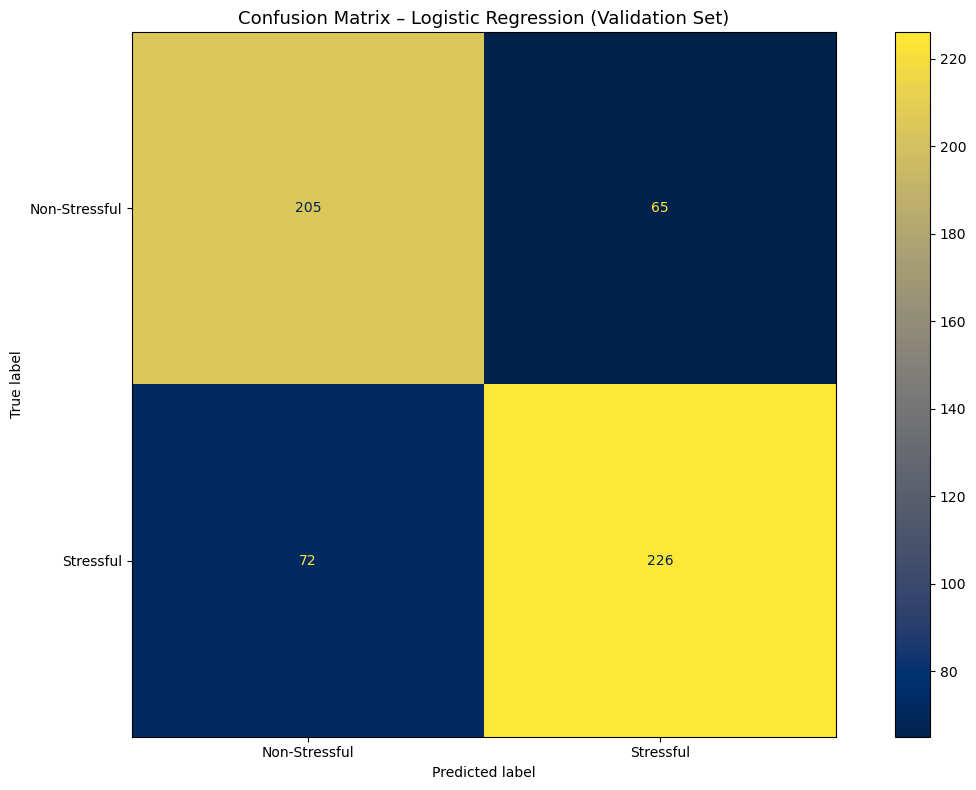

In [626]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Plot confusion matrix with color-blind friendly colormap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Stressful", "Stressful"])

fig, ax = plt.subplots(figsize=(12, 8))
disp.plot(ax=ax, cmap="cividis", values_format="d")

ax.set_title("Confusion Matrix – Logistic Regression (Validation Set)", fontsize=13)
plt.tight_layout()
plt.show()

**Key Observations:**

**1) Overall Accuracy Looks Reasonable but Not Exceptional**

- Correct predictions: 205 + 226 = 431
- Total samples: 205 + 65 + 72 + 226 = 568
- Accuracy ≈ 75.9%

This suggests the model is doing better than random guessing, but there's still meaningful room for improvement.

**2) Overall Model Performance**

True Positive Rate (Sensitivity / Recall for Stressful):
- 226 / (226 + 72) = **75.8%**

True Negative Rate (Specificity / Recall for Non-Stressful):
- 205 / (205 + 65) = **75.9%**

The recall values are almost identical, but the absolute number of correct Stressful predictions is higher. This suggests the model is slightly more confident or consistent with the Stressful class.

**3) False Positives and False Negatives Are Balanced**

- False Positives (Non-Stressful -> Stressful): 65
- False Negatives (Stressful -> Non-Stressful): 72

The model is not heavily biased toward over-predicting or under-predicting stress. This balance is good if both types of errors have similar cost.

**4) Misclassification Rate Is Significant**

About 24% of predictions are wrong. Depending on the application, this may or may not be acceptable. If this model is used for identifying stressful cases (well-being monitoring) which requires a high degree of accuracy, the cost of each error type is painful.

With a significant proportion of incorrectly classified cases, **Logistic Regression might not be the optimal method** and we need to explore other more advanced methods along the way to further improve accuracy/F1-Score. We will now proceed to try out the next Classical Machine Learning Model method, **Random Forest**.

------------------------------------------------------------------------------------------------------------------------------------


##### **Method 1 Model 2: Random Forest + Ensemble Methods**

Random Forest (RF) and Gradient Boosting Machines (GBM) such as XGBoost and LightGBM are ensemble learning methods that construct multiple decision trees and aggregate their predictions to improve accuracy and robustness. Random Forest builds an ensemble of independently trained trees using bagging, which reduces overfitting by averaging across trees. Gradient Boosting, in contrast, builds trees sequentially where each tree attempts to correct the errors of the previous one, resulting in a highly optimized model that can capture subtle patterns in the data.

These methods are particularly suitable for the dreaddit dataset because they can capture non-linear relationships and interactions between psycholinguistic, emotional and social features, which are often missed by linear models like logistic regression. Random Forest and boosting are also robust to noisy or correlated features, and they provide feature importance rankings, giving interpretability similar to logistic regression but in a non-linear setting.

The columns that we will be using for the random forest model is all columns except for text. As text is raw text, we cannot use this column to perform random forest (needs NLP transformation, will be used later). For Sentence Range and Subcategory columns, we will need to perform encoding on these features before fitting the model.

##### **Random Forest Pipeline Process:**

##### **Step 1: Feature Selection**

The feature selection process is exactly the same as the Logistic Regression Model. Similarly, we will perform One-Hot Encoding to the Subcategory column and Ordinal Encoding to the Text Length column. The code is shown below:

In [629]:
# Step 1: Feature Selection & Preprocessing

target_col = 'Label'
numeric_features = ['Negative Emotional Language', 'Anxiety', 'Sadness', 'Anger',
                    'Cognitive Processing', 'Introspective Language', 'Casual Reasoning Language',
                    'Tentative Language', 'Certainty', 'First Person Singular Pronouns',
                    'First Person Plural Pronouns', 'Second Person Pronouns',
                    'Third Person Singular Pronouns', 'Third Person Plural Pronouns',
                    'Social Interactions', 'Family', 'Friends', 'Work', 'Money',
                    'Achievement', 'Risk', 'Social Confidence', 'Authentic', 'Tone',
                    'Emotional Activation', 'Mental Imagery', 'Emotional Valence',
                    'Sentiment', 'Upvote Proportion', 'Number Of Comments']

categorical_features = ['Subcategory']
ordinal_features = ['Text Length']
sentence_range_order = [['Very Short Text', 'Short Text', 'Medium Text', 'Long Text', 'Very Long Text']]

X = dreaddit_train[numeric_features + categorical_features + ordinal_features]
y = dreaddit_train[target_col]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features),
        ('ord', OrdinalEncoder(categories=sentence_range_order), ordinal_features),
        ('num', 'passthrough', numeric_features)])

##### **Step 2: Train Validation Split + SMOTE**

For Random Forest and other tree-based ensemble models, the approach to splitting and handling class imbalance is similar in concept to logistic regression but differs in reasoning. Unlike logistic regression, tree-based models do not require feature scaling as splits are based on thresholds rather than magnitude of features. However, class imbalance still poses a major risk because the model may overly favor the majority class if left uncorrected.

Therefore, we **perform a train-validation split first** to avoid any data leakage and **then apply SMOTE** or oversampling only to the training set. This ensures the model learns minority-class patterns (stressful posts) without contaminating the validation set, which provides a reliable estimate of performance. Stratification during splitting preserves the original class distribution, ensuring both sets are representative.

In [631]:
# Step 2: Train-Validation Split

# Split the training data into train and validation sets (80-20), stratified by Label
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Fit & transform features
X_train_proc = preprocessor.fit_transform(X_train)
X_val_proc = preprocessor.transform(X_val)

# Handle Class Imbalance with SMOTE (training set only)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_proc, y_train)

##### **Step 3: Training Boosting Models**

Boosting methods, such as **XGBoost, LightGBM, and CatBoost**, are powerful ensemble techniques that sequentially build trees to correct the errors of previous trees. Unlike bagging-based models like Random Forest, boosting focuses on iteratively improving prediction accuracy, making it highly effective for imbalanced datasets and complex non-linear relationships. By combining weak learners (small decision trees) in a weighted manner, boosting models capture subtle interactions between psycholinguistic, social and emotional features that may be indicative of stress.

Applying SMOTE prior to training (previous step) ensures that the minority class is well-represented, allowing these models to learn stress patterns more effectively. Using multiple boosting techniques enables comparison of their predictive performance (F1-score), robustness to noisy features and computational efficiency, helping identify the most suitable approach for stress prediction in social media text posts.

**We will apply this strategy:**

1) SMOTE + XGBoost -> Train Model -> Evaluate Model -> F1-Score
2) SMOTE + CatBoost -> Train Model -> Evaluate Model -> F1-Score
3) SMOTE + LGBM -> Train Model -> Evaluate Model -> F1-Score

We will get 3 different F1-Scores, one for each boosting technique. This also helps us identify which boosting technique is the most effective in identifying stressful and non-stressful texts.

In [633]:
!pip install catboost
!pip install xgboost
!pip install lightgbm

In [634]:
import os
import sys
from contextlib import redirect_stdout, redirect_stderr

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Dictionary to store F1-scores
f1_scores = {}

# Silence all output inside this block
with open(os.devnull, 'w') as fnull, redirect_stdout(fnull), redirect_stderr(fnull):

    # 1) SMOTE + XGBoost
    xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss',
                              n_estimators=200, max_depth=5, learning_rate=0.1)
    xgb_model.fit(X_train_res, y_train_res)
    y_val_pred_xgb = xgb_model.predict(X_val_proc)
    f1_scores['XGBoost'] = f1_score(y_val, y_val_pred_xgb)

    # 2) SMOTE + CatBoost
    cat_model = CatBoostClassifier(random_state=42, iterations=200, depth=5,
                                   learning_rate=0.1, verbose=0)
    cat_model.fit(X_train_res, y_train_res)
    y_val_pred_cat = cat_model.predict(X_val_proc)
    f1_scores['CatBoost'] = f1_score(y_val, y_val_pred_cat)

    # 3) SMOTE + LightGBM
    lgb_model = LGBMClassifier(random_state=42, n_estimators=200, max_depth=5,
                               learning_rate=0.1)
    lgb_model.fit(X_train_res, y_train_res)
    y_val_pred_lgb = lgb_model.predict(X_val_proc)
    f1_scores['LightGBM'] = f1_score(y_val, y_val_pred_lgb)

print("Validation Performance (Random Forest + Boosting)")
print("-------------------------------------------------")
print("XGBoost F1-Score:", round(f1_score(y_val, y_val_pred_xgb), 4))
print("CatBoost F1-Score:", round(f1_score(y_val, y_val_pred_cat), 4))
print("LightGBM F1-Score:", round(f1_score(y_val, y_val_pred_lgb), 4))

Validation Performance (Random Forest + Boosting)
-------------------------------------------------
XGBoost F1-Score: 0.7729
CatBoost F1-Score: 0.7667
LightGBM F1-Score: 0.7538


The validation results show that **XGBoost** delivers the strongest performance among the three boosting models, achieving an F1-score of 0.7729. This suggests that XGBoost is capturing the underlying patterns in the data slightly more effectively, likely due to its robust regularization and fine-grained control over tree growth.

**CatBoost** follows closely with an F1-score of 0.7667, indicating that it performs almost on par with XGBoost. Its ordered boosting and strong handling of noisy or complex feature interactions may be contributing to this competitive performance, even if the dataset does not fully leverage CatBoost's advantages with categorical features.

**LightGBM**, while still performing well with an F1-score of 0.7538, trails the other two models. This gap may reflect LightGBM's sensitivity to hyperparameters such as `num_leaves` and `min_data_in_leaf` or the possibility that its leaf-wise growth strategy is not as well-suited to the structure of the dataset without further tuning. Fine-tuning is required to improve model accuracy (but we will not do this).

Now we will explore and proceed to plot the confusion matrix of all the three Random Forest Boosting Ensemble Models, identifying the true positives, true negatives, false positives and false negatives.

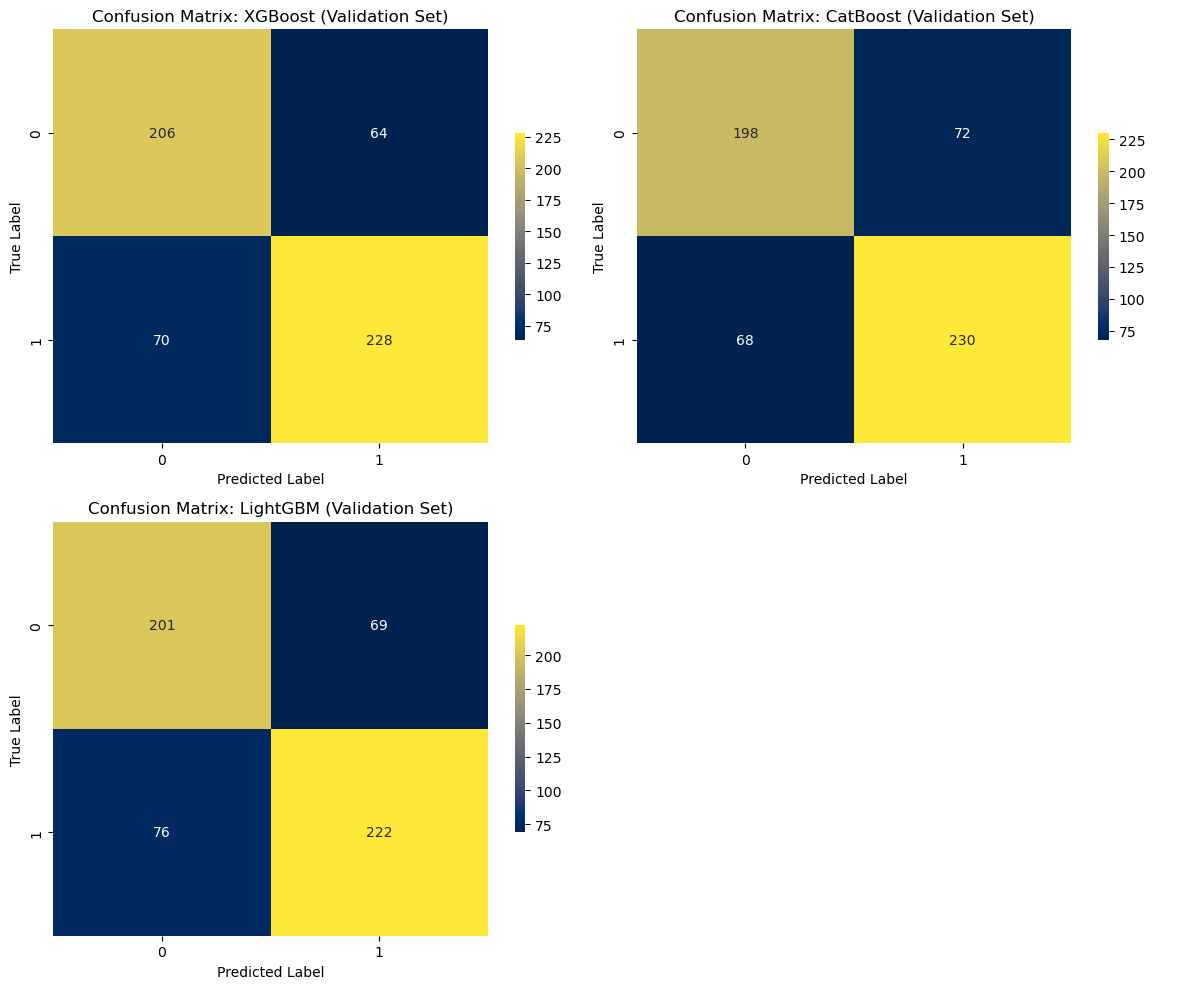

In [636]:
# Confusion matrices
cm_xgb = confusion_matrix(y_val, y_val_pred_xgb)
cm_cat = confusion_matrix(y_val, y_val_pred_cat)
cm_lgb = confusion_matrix(y_val, y_val_pred_lgb)

cms = [cm_xgb, cm_cat, cm_lgb]
titles = ['XGBoost', 'CatBoost', 'LightGBM']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten axes for easier iteration
axes = axes.flatten()

for i, (ax, cm, title) in enumerate(zip(axes, cms, titles)):
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='cividis', cbar=True, cbar_kws={'shrink':0.5})
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_title(f'Confusion Matrix: {title} (Validation Set)')

# Hide the 4th subplot (bottom-right)
axes[3].axis('off')
plt.tight_layout()
plt.show()

The three confusion matrices paint a clear picture of how each boosting model behaves on the validation set and the differences while subtle, offer meaningful insights. **XGBoost** shows the strongest overall balance, with the highest number of true positives and true negatives among the three models. Its relatively lower false-positive and false-negative counts suggest that it is capturing the underlying decision boundaries more effectively, which aligns with its slightly higher F1-score. This indicates that XGBoost is handling both classes with good consistency and is less prone to misclassifying borderline cases.

**CatBoost**, on the other hand, performs very similarly but with a slightly different error profile. It produces the highest number of true positives, meaning it is particularly good at identifying the “Stressful” class. However, this comes at the cost of more false positives—misclassifying some “Non-Stressful” cases as “Stressful”. This pattern suggests that CatBoost leans toward being more sensitive, prioritizing recall for the positive class. In scenarios where missing a stressful instance is more costly than raising a false alarm, this behavior could actually be advantageous.

**LightGBM** shows the weakest performance of the three, with slightly fewer true positives and true negatives and the highest number of false negatives. This means it is more likely to miss stressful cases compared to the other models. While still performing reasonably well, LightGBM appears more conservative in its predictions, which may indicate underfitting or a need for more careful hyperparameter tuning.

However, for all 3 models, there is still a significant proportion of incorrectly classified cases. Random Forest, similar to logistic regression, might not be the most optimal method and we need to explore other more advanced methods along the way to further improve accuracy/F1-Score. We will now proceed to try out the next Classical Machine Learning Model method, **Support Vector Machines**.

------------------------------------------------------------------------------------------------------------------------------------

##### **Method 1 Model 3: Support Vector Machines**

**Support Vector Machines (SVMs)** are a robust and widely used supervised learning method, particularly effective for binary classification tasks. SVMs aim to find the hyperplane in a high-dimensional feature space that maximally separates the two classes, which in this case are stressful vs non-stressful posts. By focusing on the points closest to the decision boundary (support vectors), SVMs are highly effective in handling datasets with overlapping features and can capture non-linear relationships when combined with **kernel functions such as the Radial Basis Function (RBF)**.

In applying SVM to the Dreaddit dataset, we can leverage the same numeric psycholinguistic, affective and social features used for logistic regression and random forest, along with the one-hot encoded Subcategory and ordinally encoded Sentence Range. Raw text columns must be excluded because standard SVMs cannot handle raw string input. Unlike ensemble methods like random forest, SVMs are sensitive to feature scaling and require all inputs to be on similar scales. This makes z-score standardization essential for this model.

SVMs are particularly useful here because they are effective on high-dimensional feature spaces (our dataset has 40+ encoded features) and can create complex decision boundaries without overfitting excessively, making them a strong alternative to both linear models and tree-based ensembles.

##### **Support Vector Machine Pipeline Process:**

##### **Step 1: Feature Selection**

The feature selection process for SVM is very similar to logistic regression and random forest, as the goal is to use features that are numeric, ordinal, or categorical in a transformed numeric form.

In [639]:
# Step 1: Feature Selection
target_col = 'Label'

numeric_features = ['Negative Emotional Language', 'Anxiety', 'Sadness', 'Anger',
                    'Cognitive Processing', 'Introspective Language', 'Casual Reasoning Language',
                    'Tentative Language', 'Certainty', 'First Person Singular Pronouns', 'First Person Plural Pronouns',
                    'Second Person Pronouns', 'Third Person Singular Pronouns', 'Third Person Plural Pronouns',
                    'Social Interactions', 'Family', 'Friends', 'Work', 'Money', 'Achievement', 'Risk',
                    'Social Confidence', 'Authentic', 'Tone', 'Emotional Activation', 'Mental Imagery', 'Emotional Valence',
                    'Sentiment', 'Upvote Proportion', 'Number Of Comments']

categorical_features = ['Subcategory']
ordinal_features = ['Text Length']
sentence_range_order = [['Very Short Text', 'Short Text', 'Medium Text', 'Long Text', 'Very Long Text']]

X = dreaddit_train[numeric_features + categorical_features + ordinal_features]
y = dreaddit_train[target_col]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features),
        ('ord', OrdinalEncoder(categories=sentence_range_order), ordinal_features),
        ('num', 'passthrough', numeric_features)])

##### **Step 2: Feature Scaling**

Feature scaling is a critical preprocessing step for SVM, more so than for tree-based models like Random Forest. This is because SVM relies on distance-based computations to find the optimal separating hyperplane. Features with larger numeric ranges (number of comments) can otherwise dominate smaller-scale features (LIWC proportions). Unlike Random Forest, which is scale-invariant and logistic regression, which is moderately sensitive, SVM performance and convergence are highly sensitive to feature magnitudes. Therefore, after encoding categorical and ordinal variables, all numeric features are standardized to have zero mean and unit variance, ensuring that each feature contributes equally to the decision boundary and improving both model stability and generalization.

In [641]:
# Column Transformer with Scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features),
        ('ord', OrdinalEncoder(categories=sentence_range_order), ordinal_features),
        ('num', StandardScaler(), numeric_features)])

##### **Step 3: Train Validation Split + SMOTE**

Before model training, the cleaned dataset is split into a training set (80%) and a validation set (20%), stratified by the target Label. Stratification ensures that the severe class imbalance where stressful posts form a minority is preserved in both subsets, allowing evaluation metrics such as the F1-score to remain meaningful. This split is performed prior to any resampling to prevent information leakage, ensuring that the validation set reflects real-world class distributions. After the split, SMOTE is applied only to the training data to synthetically generate new minority-class samples in feature space. This helps the model learn stress-specific patterns rather than defaulting to majority-class predictions.

In [643]:
# Train-Validation 80–20 stratified split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Fit preprocessor on training data only
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)

# Apply SMOTE ONLY on training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)

##### **Step 4: Training SVM Model**

Support Vector Machines are trained to find an optimal decision boundary (hyperplane) that maximally separates stressful and non-stressful posts in a high-dimensional feature space. In this study, SVM serves as a strong non-linear classifier capable of modeling complex interactions between psycholinguistic, emotional, social and structural features after encoding and scaling. Since SVMs are particularly sensitive to feature scale, all inputs are standardized before training. 

**Note:** To keep this method comparable with earlier models and avoid overfitting or excessive complexity, no hyperparameter tuning is performed. Instead, a standard configuration is used. This allows SVM to function as a fair benchmark model, enabling a clear comparison of its baseline performance against Logistic Regression and ensemble-based approaches under identical data preprocessing and imbalance-handling conditions. We will explore hyperparameter tuning subsequently. 

In [645]:
from sklearn.svm import SVC

# Initialize SVM model
# Using RBF kernel (default) and class_weight to further help imbalance
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)

# Train SVM on SMOTE-resampled training data
svm_model.fit(X_train_smote, y_train_smote)

# Predict on validation set
y_val_pred = svm_model.predict(X_val_processed)

# Evaluate performance
f1 = f1_score(y_val, y_val_pred)

print("Validation Performance (SVM)")
print("----------------------------")
print(f"SVM Validation F1-Score: {f1:.4f}")

Validation Performance (SVM)
----------------------------
SVM Validation F1-Score: 0.7739


An **F1-score of 0.7739 for the SVM model** represents a solid and slightly improved performance compared to the logistic regression baseline (≈0.76). This indicates that SVM is better able to capture non-linear decision boundaries in the psycholinguistic and social feature space, which is expected given the complexity of stress-related language patterns. The improvement is meaningful, especially in an imbalanced classification setting where gains in F1-score are harder to achieve and more informative than raw accuracy.

From an interpretability standpoint, this result suggests that stress signals are not purely linear with respect to features such as emotional intensity, self-focus, tone and engagement metrics. SVM's kernel-based learning allows it to model interactions (combinations of negative affect and sentence length or social context) that logistic regression cannot represent directly. 

However, the improvement is still modest, implying that the feature set, while informative, may have reached a ceiling for traditional feature-based models. None of the models above managed to reach an accuracy of over 80%. Further gains will likely require richer semantic representations, such as contextual embeddings from transformer-based models (BERT) or advanced feature engineering.

Now we will explore and proceed to plot the confusion matrix of the SVM Model, identifying the true positives, true negatives, false positives and false negatives.

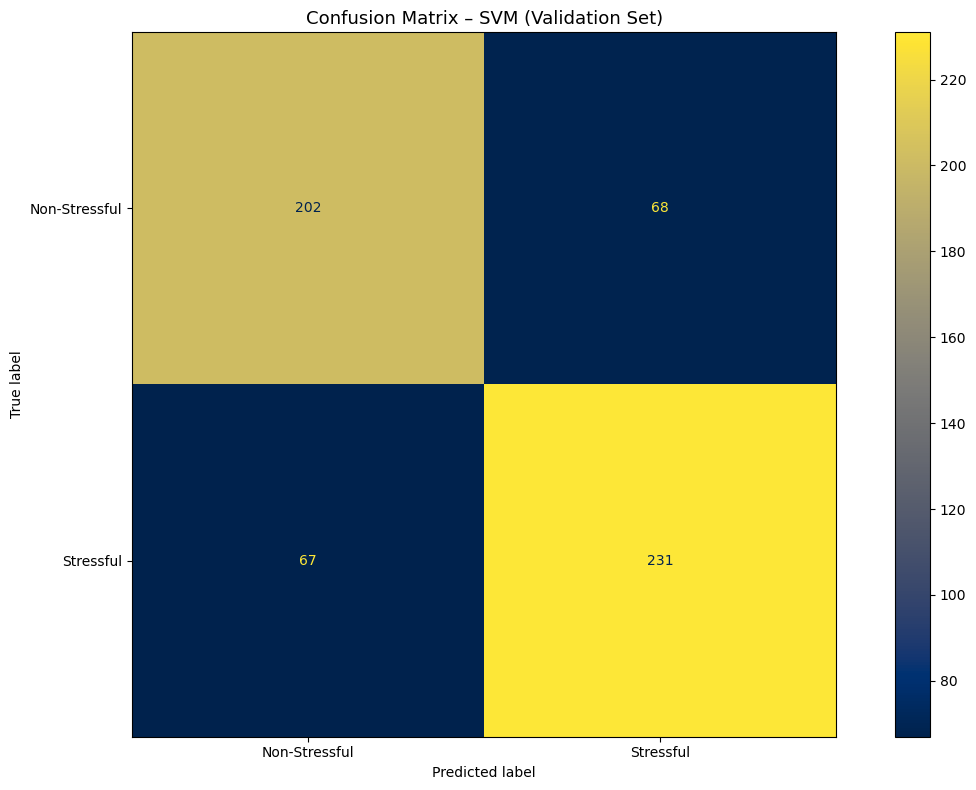

In [647]:
# Compute confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Plot confusion matrix with color-blind friendly colormap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Stressful", "Stressful"])

fig, ax = plt.subplots(figsize=(12, 8))
disp.plot(ax=ax, cmap="cividis", values_format="d")

ax.set_title("Confusion Matrix – SVM (Validation Set)", fontsize=13)
plt.tight_layout()
plt.show()

The SVM model correctly identifies 202 non-stressful cases and 231 stressful cases, which indicates that it is reasonably effective at distinguishing between the two categories. However, the errors are not insignificant: 68 non-stressful cases are misclassified as stressful, and 67 stressful cases are misclassified as non-stressful. This means the model is making mistakes at a similar rate in both directions, suggesting that it does not have a strong bias toward one class but still struggles with borderline or ambiguous instances.

One key observation is that the SVM achieves slightly higher true positives for the stressful class compared to true negatives for the non-stressful class. This implies that the model is somewhat better at detecting stressful cases, which could be valuable if the application prioritizes catching stress over avoiding false alarms.

------------------------------------------------------------------------------------------------------------------------------------

##### **Hyperparameter Tuning For The 3 Classical ML Models:**

The initial implementations of Logistic Regression, Random Forest and Support Vector Machines were intentionally kept simple and consistent, using default or minimally adjusted hyperparameters. While this approach is useful for establishing a fair baseline comparison across models, it does not guarantee optimal performance. Default settings are designed to work reasonably well across many datasets, but they may not align with the specific characteristics of stress-related language data, class imbalance or feature distributions in this project. As a result, these baseline models may underestimate the true potential performance, particularly in terms of F1-score, which is sensitive to both precision and recall.

To address this, the next phase introduces hyperparameter tuning, which systematically searches for parameter configurations that improve model performance on validation data. All three models used in this project support hyperparameter tuning. 

* For **Logistic Regression**, we tune the regularization strength (C), the type of regularization (L1 vs. L2) and the solver as these directly control model complexity and overfitting. 

* For **Random Forest**, tuning focuses on tree-related parameters such as the number of trees (n_estimators), tree depth (max_depth), minimum samples required to split a node (min_samples_split) and the number of features considered at each split (max_features). 

* For **Support Vector Machines**, we tune the regularization parameter (C), kernel type (linear vs RBF) and kernel-specific parameters such as gamma, which influence the flexibility of the decision boundary.

To conduct this tuning in a structured way, we apply both **Grid Search Cross-Validation** and **Random Search Cross-Validation**. Grid Search CV exhaustively evaluates all possible combinations of a predefined set of hyperparameter values using cross-validation, ensuring that the best-performing configuration within the specified grid is identified. While thorough, this method can be computationally expensive, especially for models like Random Forest and SVM with multiple interacting hyperparameters. 

In contrast, Random Search CV samples a fixed number of hyperparameter combinations from specified distributions, allowing it to explore a wider search space more efficiently. Random Search is often more practical for complex models and can achieve near-optimal results with significantly lower computational cost. By using both approaches, this project balances completeness and efficiency, providing a robust comparison of tuned model performance against the baseline implementations.

##### **Grid Search CV On Logistic Regression:**

Grid Search Cross-Validation (Grid Search CV) systematically evaluates all combinations of predefined hyperparameters to identify the configuration that yields the best performance under cross-validation. For Logistic Regression, this typically involves tuning the regularization strength (C), the type of regularization (L1 vs. L2), and the solver, since these directly control model complexity, sparsity, and convergence behavior.

In [650]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, class_weight=None, random_state=42)

# Define hyperparameter grid
param_grid = {'C': [0.01, 0.1, 1, 10],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear']}

# Stratified Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search CV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid,
                           scoring='f1', cv=cv, n_jobs=-1, verbose=0)

# Fit Grid Search on SMOTE-resampled training data
grid_search.fit(X_train_smote, y_train_smote)

# Best model and parameters
best_log_reg = grid_search.best_estimator_

print("Best Hyperparameters (Grid Search):")
print(grid_search.best_params_)

# Validation Performance
y_val_pred = best_log_reg.predict(X_val_processed)
f1 = f1_score(y_val, y_val_pred)

print()
print("Validation Performance (Logistic Regression + GridSearchCV)")
print("-----------------------------------------------------------")
print(f"F1-Score: {f1:.4f}")

Best Hyperparameters (Grid Search):
{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

Validation Performance (Logistic Regression + GridSearchCV)
-----------------------------------------------------------
F1-Score: 0.7774


##### **Randomized Search CV On Logistic Regression:**

While Grid Search CV exhaustively tests all combinations of specified hyperparameters, Randomized Search CV takes a different approach: it samples a fixed number of hyperparameter combinations at random from a defined distribution. This is particularly useful when the hyperparameter space is large as it allows us to explore more possibilities in less time.

Randomized Search is faster than Grid Search, can explore a wider hyperparameter space and may find better hyperparameters than Grid Search if the grid is too coarse. It is especially useful when moving to more complex models like Random Forests, XGBoost, or SVMs, where the hyperparameter space is much larger (to be explored later).

In [652]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, class_weight=None, random_state=42)

# Hyperparameter distributions
param_dist = {'C': uniform(0.01, 10),
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear']}

# Stratified Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Randomized Search CV
random_search = RandomizedSearchCV(estimator=log_reg, param_distributions=param_dist,
                                   n_iter=20, scoring='f1', cv=cv, n_jobs=-1,
                                   random_state=42, verbose=0)

# Fit Randomized Search on SMOTE-resampled training data
random_search.fit(X_train_smote, y_train_smote)

# Best model and parameters
best_log_reg_random = random_search.best_estimator_

print("Best Hyperparameters (Randomized Search):")
print(random_search.best_params_)

# Validation Performance
y_val_pred = best_log_reg_random.predict(X_val_processed)
f1 = f1_score(y_val, y_val_pred)

print()
print("Validation Performance (Logistic Regression + RandomizedSearchCV)")
print("-----------------------------------------------------------------")
print(f"F1-Score: {f1:.4f}")

Best Hyperparameters (Randomized Search):
{'C': 0.017787658410143285, 'penalty': 'l2', 'solver': 'liblinear'}

Validation Performance (Logistic Regression + RandomizedSearchCV)
-----------------------------------------------------------------
F1-Score: 0.7740


**Summary Of Results (Logistic Regression):**

<table border="1" cellpadding="8" cellspacing="0" style="border-collapse: collapse; width: 100%; text-align: left;">
  <thead style="background-color: #f2f2f2;">
    <tr>
      <th>Method Used</th>
      <th>F1-Score</th>
    </tr>
  </thead>
  <tbody>
      <tr>
        <td>Logistic Regression (No Tuning)</td>
        <td>0.7674</td>
      </tr>
      <tr>
        <td>Logistic Regression (Grid Search CV)</td>
        <td>0.7774</td>
      </tr>
      <tr>
        <td>Logistic Regression (Randomized Search CV)</td>
        <td>0.7740</td>
      </tr>
  </tbody>
</table>

The F1-scores obtained for the logistic regression models highlight the impact of hyperparameter tuning on performance. The baseline logistic regression without tuning achieved an F1-score of 0.7674, which is already a solid result, showing that the model can capture the main patterns in the data. However, when tuning was introduced, both Grid Search CV and Randomized Search CV improved the performance. Grid Search CV produced the highest F1-score at 0.7774, while Randomized Search CV followed closely at 0.7740.

These improvements, though modest, demonstrate that carefully selecting hyperparameters can enhance the balance between precision and recall, leading to better classification outcomes.

The reasons behind these results are tied to how each tuning method explores the hyperparameter space. Grid Search CV systematically evaluates all possible combinations within the defined parameter grid, which increases the likelihood of finding the optimal set of parameters, albeit at a higher computational cost. This thoroughness explains why it achieved the best score. Randomized Search CV, on the other hand, samples a subset of parameter combinations, which makes it more efficient but slightly less exhaustive. Its performance being close to Grid Search CV suggests that the parameter space may not be highly complex and good solutions can be found without exhaustive search. 

The baseline model's lower score reflects the limitations of default parameters, which may not align well with the dataset's characteristics. Overall, these results emphasize the importance of tuning in improving model performance and show that even small gains in F1-score can translate into more reliable predictions in practice.

##### **Grid Search CV On Random Forest:**

Grid Search CV is an exhaustive search over a specified hyperparameter grid, evaluating all possible combinations using cross-validation. For ensemble models like Random Forest, XGBoost, CatBoost and LightGBM, hyperparameter tuning is crucial because these models have many parameters that affect performance such as tree depth, number of estimators, learning rate (for boosting) and minimum samples per leaf.

By systematically evaluating each combination using stratified k-fold cross-validation and optimizing for F1-score, we can select the hyperparameters that maximize model performance on imbalanced data. This process ensures that the model learns meaningful patterns from the oversampled SMOTE training data while minimizing overfitting.

##### **Grid Search CV: XGBoost Model**

In [762]:
# XGBoost (Grid Search CV)
xgb = XGBClassifier(random_state=42, eval_metric='logloss')

param_grid_xgb = {'n_estimators': [100, 500],
                  'max_depth': [3, 5],
                  'learning_rate': [0.01, 0.1],
                  'subsample': [0.85, 1.0],
                  'colsample_bytree': [0.85, 1.0]}

grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, scoring='f1',
                               cv=3, n_jobs=-1, verbose=0)

grid_search_xgb.fit(X_train_smote, y_train_smote)

best_xgb = grid_search_xgb.best_estimator_
print("Best Hyperparameters (XGBoost Grid Search):")
print(grid_search_xgb.best_params_)

y_val_pred_xgb = best_xgb.predict(X_val_processed)
f1_xgb = f1_score(y_val, y_val_pred_xgb)

print()
print("Validation Performance (XGBoost + GridSearchCV)")
print("-----------------------------------------------")
print(f"XGBoost Validation F1-Score: {f1_xgb:.4f}")

Best Hyperparameters (XGBoost Grid Search):
{'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1.0}

Validation Performance (XGBoost + GridSearchCV)
-----------------------------------------------
XGBoost Validation F1-Score: 0.7608


##### **Grid Search CV: CatBoost Model**

In [656]:
# CatBoost (Grid Search CV)
cat = CatBoostClassifier(random_state=42, verbose=0)

param_grid_cat = {'iterations': [100, 500],
                  'depth': [3, 5],
                  'learning_rate': [0.01, 0.1],
                  'l2_leaf_reg': [1, 3, 5]}

grid_search_cat = GridSearchCV(estimator=cat, param_grid=param_grid_cat, scoring='f1',
                               cv=3, n_jobs=-1, verbose=0)

grid_search_cat.fit(X_train_smote, y_train_smote)

best_cat = grid_search_cat.best_estimator_
print("Best Hyperparameters (CatBoost Grid Search):")
print(grid_search_cat.best_params_)

y_val_pred_cat = best_cat.predict(X_val_processed)
f1_cat = f1_score(y_val, y_val_pred_cat)

print()
print("Validation Performance (CatBoost + GridSearchCV)")
print("------------------------------------------------")
print(f"CatBoost Validation F1-Score: {f1_cat:.4f}")

Best Hyperparameters (CatBoost Grid Search):
{'depth': 5, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.1}

Validation Performance (CatBoost + GridSearchCV)
------------------------------------------------
CatBoost Validation F1-Score: 0.7534


#### **Grid Search CV: LGBM Model**

In [658]:
# Light GBM (Grid Search CV)
lgbm = LGBMClassifier(random_state=42, verbose = -1)

param_grid_lgbm = {'n_estimators': [100, 500],
                   'max_depth': [3, 5],
                   'learning_rate': [0.01, 0.1],
                   'num_leaves': [50, 100],
                   'min_data_in_leaf': [50, 100]}

grid_search_lgbm = GridSearchCV(estimator=lgbm, param_grid=param_grid_lgbm, scoring='f1',
                                cv=3, n_jobs=-1, verbose=0)

grid_search_lgbm.fit(X_train_smote, y_train_smote)

best_lgbm = grid_search_lgbm.best_estimator_
print("Best Hyperparameters (LightGBM Grid Search):")
print(grid_search_lgbm.best_params_)

y_val_pred_lgbm = best_lgbm.predict(X_val_processed)
f1_lgbm = f1_score(y_val, y_val_pred_lgbm)

print()
print("Validation Performance (LightGBM + GridSearchCV)")
print("------------------------------------------------")
print(f"LightGBM Validation F1-Score: {f1_lgbm:.4f}")

Best Hyperparameters (LightGBM Grid Search):
{'learning_rate': 0.01, 'max_depth': 3, 'min_data_in_leaf': 100, 'n_estimators': 500, 'num_leaves': 50}

Validation Performance (LightGBM + GridSearchCV)
------------------------------------------------
LightGBM Validation F1-Score: 0.7629


##### **Randomized Search CV On Random Forest:**

Randomized Search CV is a hyperparameter tuning method that randomly samples a fixed number of parameter combinations from a defined parameter grid, instead of testing all possible combinations like Grid Search. This is extremely useful for large grids or computationally expensive models like XGBoost, CatBoost and LightGBM.

For each model, we will define a reasonable hyperparameter space with 2 to 3 options per parameter to keep computation manageable. We then perform RandomizedSearchCV with a fixed number of iterations (`n_iter`) and cross-validation folds (`cv=3`). The evaluation metric will be F1-score, which balances precision and recall, particularly important for our imbalanced stress classification problem.

In [660]:
from sklearn.metrics import f1_score, make_scorer
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Define F1 scorer
f1_scorer = make_scorer(f1_score)

##### **Randomized Search CV: XGBoost Model**

In [662]:
# XGBoost (Randomized Search CV)
param_dist_xgb = {'n_estimators': [100, 200],
                  'max_depth': [3, 5, 7],
                  'learning_rate': np.linspace(0.01, 0.2, 10),
                  'subsample': np.linspace(0.7, 1.0, 4),
                  'colsample_bytree': np.linspace(0.7, 1.0, 4),
                  'reg_lambda': np.linspace(0.1, 5, 5)}

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

rand_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist_xgb,
                                     n_iter=20, scoring=f1_scorer, cv=3, verbose=0,
                                     n_jobs=-1, random_state=42)

rand_search_xgb.fit(X_train_res, y_train_res)
print("Best XGBoost Params:", rand_search_xgb.best_params_)

print()
print("Validation Performance (XGBoost + RandomizedSearchCV)")
print("-----------------------------------------------------")
print("XGBoost Validation F1-Score:", round(rand_search_xgb.best_score_ , 4))

Best XGBoost Params: {'subsample': 0.7, 'reg_lambda': 3.7750000000000004, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.03111111111111111, 'colsample_bytree': 1.0}

Validation Performance (XGBoost + RandomizedSearchCV)
-----------------------------------------------------
XGBoost Validation F1-Score: 0.7472


##### **Randomized Search CV: CatBoost Model**

In [664]:
# CatBoost (Randomized Seacrh CV)
param_dist_cb = {'iterations': [100, 200],
                 'depth': [3, 5, 7],
                 'learning_rate': np.linspace(0.01, 0.2, 10),
                 'l2_leaf_reg': np.linspace(1, 10, 5),
                 'border_count': [32, 64, 128]}

cb_model = CatBoostClassifier(verbose=0, random_state=42)

rand_search_cb = RandomizedSearchCV(estimator=cb_model, param_distributions=param_dist_cb,
                                    n_iter=20, scoring=f1_scorer, cv=3, verbose=0, n_jobs=-1,
                                    random_state=42)

rand_search_cb.fit(X_train_res, y_train_res)
print("Best CatBoost Params:", rand_search_cb.best_params_)

print()
print("Validation Performance (CatBoost + RandomizedSearchCV)")
print("------------------------------------------------------")
print("CatBoost Validation F1-Score:", round(rand_search_cb.best_score_ , 4))

Best CatBoost Params: {'learning_rate': 0.03111111111111111, 'l2_leaf_reg': 3.25, 'iterations': 100, 'depth': 5, 'border_count': 128}

Validation Performance (CatBoost + RandomizedSearchCV)
------------------------------------------------------
CatBoost Validation F1-Score: 0.7511


##### **Randomized Search CV: Light GBM Model**

In [666]:
# LightGBM (Randomized Seacrh CV)
param_dist_lgb = {'n_estimators': [100, 200],
                  'max_depth': [3, 5, 7],
                  'learning_rate': np.linspace(0.01, 0.2, 10),
                  'num_leaves': [31, 50, 70],
                  'subsample': np.linspace(0.7, 1.0, 4),
                  'colsample_bytree': np.linspace(0.7, 1.0, 4),
                  'reg_alpha': np.linspace(0, 1, 5),
                  'reg_lambda': np.linspace(0, 1, 5)}

lgb_model = LGBMClassifier(random_state=42, verbose=-1)

rand_search_lgb = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_dist_lgb,
                                     n_iter=20, scoring=f1_scorer, cv=3, verbose=0,
                                     n_jobs=-1, random_state=42)

rand_search_lgb.fit(X_train_res, y_train_res)
print("Best LightGBM Params:", rand_search_lgb.best_params_)

print()
print("Validation Performance (LightGBM + RandomizedSearchCV)")
print("------------------------------------------------------")
print("LightGBM Validation F1-Score:", round(rand_search_lgb.best_score_ , 4))

Best LightGBM Params: {'subsample': 0.7, 'reg_lambda': 0.0, 'reg_alpha': 0.25, 'num_leaves': 31, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1366666666666667, 'colsample_bytree': 1.0}

Validation Performance (LightGBM + RandomizedSearchCV)
------------------------------------------------------
LightGBM Validation F1-Score: 0.7483


**Summary Of Results (Random Forest):**

<table border="1" cellpadding="8" cellspacing="0" style="border-collapse: collapse; width: 100%; text-align: left;">
  <thead style="background-color: #f2f2f2;">
    <tr>
      <th>Method Used</th>
      <th>F1-Score</th>
    </tr>
  </thead>
  <tbody>
      <tr>
        <td>XGBoost (No Tuning)</td>
        <td>0.7729</td>
      </tr>
      <tr>
        <td>XGBoost (Grid Search CV)</td>
        <td>0.7608</td>
      </tr>
      <tr>
        <td>XGBoost (Randomized Search CV)</td>
        <td>0.7472</td>
      </tr>
      <tr>
        <td>CatBoost (No Tuning)</td>
        <td>0.7667</td>
      </tr>
      <tr>
        <td>CatBoost (Grid Search CV)</td>
        <td>0.7534</td>
      </tr>
      <tr>
        <td>CatBoost (Randomized Search CV)</td>
        <td>0.7511</td>
      </tr>
      <tr>
        <td>LightGBM (No Tuning)</td>
        <td>0.7538</td>
      </tr>
      <tr>
        <td>LightGBM (Grid Search CV)</td>
        <td>0.7629</td>
      </tr>
      <tr>
        <td>LightGBM (Randomized Search CV)</td>
        <td>0.7483</td>
      </tr>
  </tbody>
</table>

The F1-scores obtained across the three boosting models reveal some interesting patterns about the impact of hyperparameter tuning. For **XGBoost**, the baseline model without tuning achieved the highest score at 0.7729, while Grid Search CV slightly reduced performance to 0.7608 and Randomized Search CV dropped further to 0.7472. This suggests that the default parameters were already well-aligned with the dataset, and the tuning process may have over-constrained the model or led to suboptimal parameter combinations. It highlights that tuning does not always guarantee improvement, especially when the search space is limited or the dataset responds well to default configurations.

**CatBoost** shows a similar trend. The untuned model performed best at 0.7667, while Grid Search CV and Randomized Search CV reduced the F1-score to 0.7534 and 0.7511 respectively. This again indicates that the default CatBoost settings were already effective, and the tuning process may have inadvertently shifted the model away from its optimal balance between precision and recall.

**LightGBM** however presents a slightly different story. The baseline model scored 0.7538, but Grid Search CV improved performance to 0.7629, showing that tuning helped optimize its parameters. Randomized Search CV, on the other hand, reduced the score to 0.7483, reflecting the risk of sampling suboptimal parameter sets. This outcome suggests that LightGBM is more sensitive to hyperparameter choices compared to XGBoost and CatBoost. 

Overall, these results emphasize that hyperparameter tuning is not universally beneficial: it depends on the model and the dataset. **XGBoost** and **CatBoost** appear to have strong defaults that work well in this case, while **LightGBM** benefits more from structured tuning.

##### **Grid Search CV On Support Vector Machine:**

Support Vector Machines (SVMs) are sensitive to hyperparameters like the kernel type, regularization strength (C) and kernel-specific parameters such as gamma for the RBF kernel. Grid Search CV systematically evaluates all combinations of specified hyperparameters using cross-validation to identify the combination that gives the best performance (measured by F1-score). By performing grid search, we ensure that the SVM model is tuned optimally for the dataset rather than relying on default values, which may not yield the best predictive power.

In [668]:
# Define SVM model
svm_model = SVC(random_state=42)

# Define hyperparameter grid
param_grid_svm = {'C': [0.1, 1, 10],
                  'kernel': ['linear', 'rbf'],
                  'gamma': ['scale', 'auto']}

# Grid Search CV 
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm,
                               scoring='f1', cv=5, n_jobs=-1, verbose=0)

# Fit the model on SMOTE training set
grid_search_svm.fit(X_train_smote, y_train_smote)

best_svm = grid_search_svm.best_estimator_

y_val_pred_svm = best_svm.predict(X_val_processed)
f1_svm = f1_score(y_val, y_val_pred_svm)

print("Best Hyperparameters (SVM Grid Search):")
print(grid_search_svm.best_params_)

print()
print("Validation Performance (SVM + GridSearchCV)")
print("-------------------------------------------")
print(f"SVM Validation F1-Score: {f1_svm:.4f}")

Best Hyperparameters (SVM Grid Search):
{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

Validation Performance (SVM + GridSearchCV)
-------------------------------------------
SVM Validation F1-Score: 0.7763


##### **Randomized Search CV On Support Vector Machine:**

Randomized Search CV is an alternative to Grid Search CV that samples a fixed number of hyperparameter combinations from a specified distribution, rather than exhaustively evaluating every possible combination. This is particularly useful for computationally expensive models like SVMs with multiple hyperparameters. Randomized search can cover a larger hyperparameter space more efficiently and often finds good combinations faster.



In [670]:
# Define SVM model
svm_model = SVC(random_state=42)

# Define hyperparameter distribution using np.linspace / lists
param_dist_svm = {'C': np.logspace(-2, 1, 5),
                  'kernel': ['linear', 'rbf'],
                  'gamma': ['scale', 'auto']}

# Randomized Search CV (suppressing verbose output)
random_search_svm = RandomizedSearchCV(estimator=svm_model, param_distributions=param_dist_svm,
                                       n_iter=20, scoring='f1', cv=3, n_jobs=-1,
                                       random_state=42, verbose=0)

# Fit the model on SMOTE training set
random_search_svm.fit(X_train_smote, y_train_smote)

best_svm_random = random_search_svm.best_estimator_

y_val_pred_svm_random = best_svm_random.predict(X_val_processed)
f1_svm_random = f1_score(y_val, y_val_pred_svm_random)

print("Best Hyperparameters (SVM Randomized Search):")
print(random_search_svm.best_params_)

print()
print("Validation Performance (SVM + RandomizedSearchCV)")
print("-------------------------------------------------")
print(f"SVM Validation F1-Score: {f1_svm_random:.4f}")

Best Hyperparameters (SVM Randomized Search):
{'kernel': 'rbf', 'gamma': 'auto', 'C': 1.7782794100389228}

Validation Performance (SVM + RandomizedSearchCV)
-------------------------------------------------
SVM Validation F1-Score: 0.7862


**Summary Of Results (Support Vector Machine):**

<table border="1" cellpadding="8" cellspacing="0" style="border-collapse: collapse; width: 100%; text-align: left;">
  <thead style="background-color: #f2f2f2;">
    <tr>
      <th>Method Used</th>
      <th>F1-Score</th>
    </tr>
  </thead>
  <tbody>
      <tr>
        <td>Support Vector Machine (No Tuning)</td>
        <td>0.7739</td>
      </tr>
      <tr>
        <td>Support Vector Machine (Grid Search CV)</td>
        <td>0.7763</td>
      </tr>
      <tr>
        <td>Support Vector Machine (Randomized Search CV)</td>
        <td>0.7862</td>
      </tr>
  </tbody>
</table>

The F1-scores obtained for the Support Vector Machine models show a clear improvement when hyperparameter tuning is applied. The baseline SVM without tuning achieved an F1-score of 0.7739, which is already competitive compared to other models tested. When Grid Search CV was used, the score increased slightly to 0.7763, reflecting the benefit of systematically exploring parameter combinations to find a better fit. 

The most notable improvement came from Randomized Search CV, which achieved the highest F1-score of 0.7862. This suggests that the randomized approach was able to sample parameter sets that provided stronger generalization, even though it does not exhaustively search the space like Grid Search.

The reasons behind these results likely lie in the sensitivity of SVMs to hyperparameters such as the regularization parameter C, kernel type, and kernel parameters like gamma. The default settings provided a solid baseline but tuning allowed the model to refine its decision boundary, improving the balance between precision and recall. 

Grid Search CV offered a small gain because it systematically tested combinations within a predefined grid, but its improvement was limited possibly because the grid did not include the most optimal values. Randomized Search CV in contrast explored a broader range of possibilities and was able to identify a stronger configuration, which explains its superior performance. Overall, these results highlight that SVMs can benefit significantly from hyperparameter optimization and randomized search can sometimes outperform exhaustive search when the parameter space is large or complex.

##### **Visualizing All The F1-Scores For Clasical Machine Learning Methods**

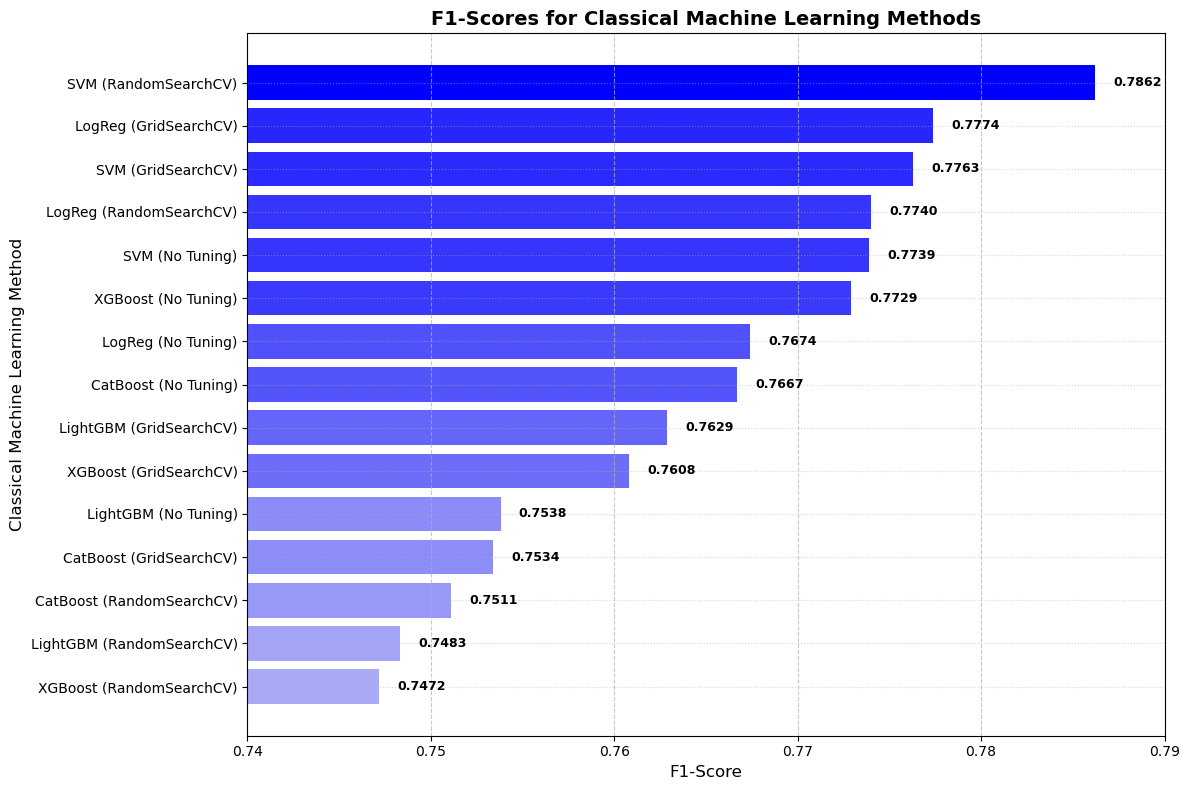

In [767]:
# Prepare the data
methods = ["LogReg (No Tuning)", "LogReg (GridSearchCV)", "LogReg (RandomSearchCV)",
           "XGBoost (No Tuning)", "XGBoost (GridSearchCV)", "XGBoost (RandomSearchCV)",
           "CatBoost (No Tuning)", "CatBoost (GridSearchCV)", "CatBoost (RandomSearchCV)",
           "LightGBM (No Tuning)", "LightGBM (GridSearchCV)", "LightGBM (RandomSearchCV)",
           "SVM (No Tuning)", "SVM (GridSearchCV)", "SVM (RandomSearchCV)"]

f1_scores = [0.7674, 0.7774, 0.7740, 0.7729, 0.7608, 0.7472, 0.7667, 0.7534, 0.7511,
             0.7538, 0.7629, 0.7483, 0.7739, 0.7763, 0.7862]

# Sort by F1-score descending
data_sorted = sorted(zip(methods, f1_scores), key=lambda x: x[1], reverse=True)
methods_sorted, f1_scores_sorted = zip(*data_sorted)

# Normalize F1-scores to 0-1 for color intensity
min_score = min(f1_scores_sorted)
max_score = max(f1_scores_sorted)
normalized_scores = [(score - min_score) / (max_score - min_score) for score in f1_scores_sorted]

# Create colors: higher F1 → darker blue
colors = [sns.light_palette("blue", as_cmap=True)(0.3 + 0.7*norm) for norm in normalized_scores]

# Plot
plt.figure(figsize=(12, 8))
bars = plt.barh(methods_sorted, f1_scores_sorted, color=colors)

# Add numbers to the right
for bar, score in zip(bars, f1_scores_sorted):
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
             f"{score:.4f}", va='center', ha='left', fontsize=9, fontweight='bold')

# Styling
plt.xlabel("F1-Score", fontsize=12)
plt.ylabel("Classical Machine Learning Method", fontsize=12)
plt.title("F1-Scores for Classical Machine Learning Methods", fontsize=14, fontweight='bold')
plt.xlim(0.74, 0.79)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Key Observations:**

1) **SVM Performs Best**

    Among all methods, SVM with Randomized Search CV achieved the highest F1-score of 0.7862, followed closely by SVM with Grid Search CV (0.7763) and Logistic Regression with Grid Search CV (0.7774). This suggests that SVM is relatively robust for this classification task, especially when hyperparameters are tuned.

2) **Impact of Hyperparameter Tuning** 

    For most models, applying Grid Search CV or Randomized Search CV slightly improved performance compared to models without tuning, though the effect varies. For instance, XGBoost and CatBoost had slightly lower F1-scores with hyperparameter tuning, possibly indicating that the selected search space was not optimal or the dataset size is limited for these models.

3) **Gradient Boosting Models** 

    LightGBM, XGBoost and CatBoost have F1-scores generally below 0.77, with Randomized Search CV performing the worst among them. This suggests that these gradient boosting models may require further tuning or that the dataset characteristics favor linear/non-tree-based models like SVM or Logistic Regression.

**Overall Performance Ceiling:** Notably, even the best-performing classical ML model (SVM Randomized Search CV) achieves an F1-score below 0.8. While this indicates reasonable predictive ability, it also shows that classical methods might not be capturing all the complexities in the data. This is true as all the classical methods did not factor one important column into consideration - **Text**. 

The overall moderate performance of these classical models implies there is room for improvement. To potentially achieve higher predictive accuracy, especially in capturing complex non-linear patterns in text data, it makes sense to explore deep learning methods next. These methods such as LSTMs, CNN and transformer-based models are often better suited for text classification tasks and might improve performance beyond the current ceiling observed with classical ML.

------------------------------------------------------------------------------------------------------------------------------------

#### **Deep Learning**